In [208]:
import numpy as np
import cv2
import os
from os import listdir
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [209]:
from tensorflow.keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


In [210]:
from tensorflow.keras.optimizers import Adam

In [211]:
import pandas as pd
data=pd.read_csv('Train (7).csv')

In [212]:
data

Image_ID            class   xmin   ymin  width  height
0     ID_007FAIEI  fruit_woodiness   87.0   87.5  228.0   311.0
1     ID_00G8K1V3  fruit_brownspot   97.5   17.5  245.0   354.5
2     ID_00WROUT9  fruit_brownspot  156.5  209.5  248.0   302.5
3     ID_00ZJEEK3    fruit_healthy  125.0  193.0  254.5   217.0
4     ID_018UIENR  fruit_brownspot   79.5  232.5  233.5   182.0
...           ...              ...    ...    ...    ...     ...
3901  ID_ZZAB1FH1    fruit_healthy   96.0  175.5  289.5   222.0
3902  ID_ZZAB1FH1    fruit_healthy  330.0  241.0  182.0   180.5
3903  ID_ZZJZ2CV6    fruit_healthy  358.0  234.0  134.5   107.0
3904  ID_ZZJZ2CV6    fruit_healthy   98.5  135.0  275.5   213.5
3905  ID_ZZO9KIH9  fruit_woodiness  123.5  218.5  197.5   153.5

[3906 rows x 6 columns]

In [6]:
s=data[data['Image_ID']=='ID_00G8K1V3']
ss=[s['xmin'].values[0], s['ymin'].values[0],s['width'].values[0], s['height'].values[0]]

In [7]:
int(ss[0])

97

In [219]:
DEFAULT_IMAGE_SIZE = tuple((128, 128))
def convert_image_to_array(image_dir, ss):
    image = cv2.imread(image_dir)
    print(image)
    if image is not None:
        #image = cv2.resize(image, DEFAULT_IMAGE_SIZE) 
        roi = image[int(ss[1]):int(ss[1]+ss[3]), int(ss[0]):int(ss[0]+ss[2])]
        image = cv2.resize(roi, DEFAULT_IMAGE_SIZE) 
        return img_to_array(image)

In [220]:
path='C:\\Users\\Shubham\\Desktop\\New folder\\ZINDI\\maker disease\\Train_Images\\Train_Images\\'

In [221]:
image_list=[]
label_list=[]
for i in data['Image_ID']:
    s=data[data['Image_ID']==i]
    #label_list.append(s['class'])
    ss=[s['xmin'].values[0], s['ymin'].values[0],s['width'].values[0], s['height'].values[0]]
    image_dir=path+i+'.jpg'
    arr=convert_image_to_array(image_dir, ss)
    image_list.append(arr)
    
    

[[[ 50 139  95]
  [ 50 139  95]
  [ 50 142  95]
  ...
  [125 189 160]
  [115 182 151]
  [113 181 150]]

 [[ 50 139  95]
  [ 49 138  94]
  [ 50 142  95]
  ...
  [123 186 160]
  [116 182 153]
  [115 182 153]]

 [[ 50 139  95]
  [ 49 138  94]
  [ 50 142  95]
  ...
  [125 184 163]
  [119 181 157]
  [119 184 159]]

 ...

 [[135 213 172]
  [136 209 169]
  [137 203 168]
  ...
  [139 211 188]
  [141 199 188]
  [134 185 181]]

 [[137 215 168]
  [130 202 159]
  [134 197 158]
  ...
  [142 214 194]
  [147 206 198]
  [143 196 193]]

 [[134 213 164]
  [125 198 152]
  [132 193 155]
  ...
  [109 183 165]
  [125 183 178]
  [153 205 205]]]
[[[ 71 130 126]
  [ 83 142 138]
  [132 186 186]
  ...
  [ 86 139  96]
  [ 85 138  98]
  [ 85 138  98]]

 [[ 66 127 123]
  [ 86 147 143]
  [124 181 178]
  ...
  [ 87 140  97]
  [ 87 140 100]
  [ 88 141 101]]

 [[ 56 124 117]
  [ 79 146 139]
  [123 185 179]
  ...
  [ 87 140  97]
  [ 87 141  98]
  [ 88 142  99]]

 ...

 [[ 78 127 107]
  [ 66 116  98]
  [ 39  89  77]
  ..

  [147 184 204]]]
[[[144 163 148]
  [148 167 152]
  [146 167 152]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[147 166 151]
  [151 170 155]
  [150 171 156]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[150 169 152]
  [153 172 155]
  [154 176 158]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 254]]

 ...

 [[  9  14  13]
  [ 17  22  21]
  [ 13  15  16]
  ...
  [198 232 238]
  [201 231 242]
  [189 219 230]]

 [[ 17  20  18]
  [ 18  21  19]
  [ 11  11  11]
  ...
  [163 197 210]
  [170 204 220]
  [164 198 214]]

 [[ 13  14  10]
  [ 17  18  16]
  [ 16  16  16]
  ...
  [156 189 204]
  [156 192 210]
  [147 184 204]]]
[[[144 163 148]
  [148 167 152]
  [146 167 152]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[147 166 151]
  [151 170 155]
  [150 171 156]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[150 169 152]
  [153 172 155]
  [154 176 158]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 254]]

 ...

 [[  9  14  13]
  [ 17  22  21]
  

  [ 55  64  74]]]
[[[ 93 125  66]
  [ 94 126  67]
  [ 97 129  72]
  ...
  [ 76 122  46]
  [ 83 125  48]
  [ 91 133  56]]

 [[ 92 124  65]
  [ 92 124  65]
  [ 95 127  70]
  ...
  [ 81 125  48]
  [ 83 125  48]
  [ 85 127  50]]

 [[ 91 123  66]
  [ 91 123  66]
  [ 95 127  70]
  ...
  [ 84 128  51]
  [ 87 129  52]
  [ 86 128  50]]

 ...

 [[ 55 116  52]
  [ 57 118  54]
  [ 57 118  54]
  ...
  [ 94 103 116]
  [ 87  96 110]
  [ 86  95 108]]

 [[ 59 119  55]
  [ 59 119  55]
  [ 58 118  54]
  ...
  [ 60  69  79]
  [ 48  56  69]
  [ 47  56  66]]

 [[ 58 118  54]
  [ 58 118  54]
  [ 56 116  52]
  ...
  [ 53  62  72]
  [ 58  67  77]
  [ 55  64  74]]]
[[[ 49 151  80]
  [ 51 155  84]
  [ 53 160  87]
  ...
  [ 69 144  82]
  [ 67 142  80]
  [ 68 143  81]]

 [[ 52 154  83]
  [ 50 154  83]
  [ 49 156  83]
  ...
  [ 74 149  87]
  [ 67 142  80]
  [ 64 139  77]]

 [[ 59 161  90]
  [ 54 158  87]
  [ 48 154  83]
  ...
  [ 66 144  80]
  [ 61 139  75]
  [ 61 139  75]]

 ...

 [[ 99 129  80]
  [ 88 118  69]
  

  [123 152 102]]]
[[[ 71 116  90]
  [ 71 116  90]
  [ 70 117  91]
  ...
  [ 26 163 112]
  [ 16 160 107]
  [ 17 163 108]]

 [[ 71 116  90]
  [ 72 117  91]
  [ 70 117  91]
  ...
  [ 22 160 112]
  [ 30 174 122]
  [ 17 163 109]]

 [[ 70 118  90]
  [ 70 118  90]
  [ 70 118  90]
  ...
  [ 31 171 124]
  [ 32 175 130]
  [ 24 170 122]]

 ...

 [[118 165 133]
  [120 166 137]
  [125 167 142]
  ...
  [165 215 191]
  [171 219 195]
  [173 221 197]]

 [[113 172 134]
  [118 174 139]
  [123 175 145]
  ...
  [151 199 173]
  [161 207 184]
  [164 210 187]]

 [[107 170 130]
  [112 173 135]
  [117 174 141]
  ...
  [127 175 149]
  [148 194 171]
  [150 196 173]]]
[[[184 190 167]
  [177 186 160]
  [150 165 133]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[205 207 185]
  [180 185 158]
  [146 157 125]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[232 226 203]
  [193 190 162]
  [146 151 119]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[117 131 137]
  [125 139 145]
  

  [164 177 155]]]
[[[252 253 251]
  [252 253 251]
  [252 253 251]
  ...
  [ 87 159 137]
  [ 85 157 134]
  [ 83 155 132]]

 [[253 254 252]
  [252 253 251]
  [252 253 251]
  ...
  [ 88 160 137]
  [ 88 160 137]
  [ 87 160 134]]

 [[253 254 252]
  [252 253 251]
  [252 253 251]
  ...
  [ 89 163 139]
  [ 89 163 137]
  [ 89 164 136]]

 ...

 [[154 191 243]
  [155 191 245]
  [152 189 247]
  ...
  [161 192 177]
  [162 193 178]
  [165 197 180]]

 [[157 187 244]
  [160 193 249]
  [159 193 252]
  ...
  [165 196 181]
  [167 196 181]
  [168 197 182]]

 [[159 187 247]
  [165 195 254]
  [164 198 255]
  ...
  [168 198 185]
  [169 198 183]
  [169 198 183]]]
[[[255 254 250]
  [255 255 252]
  [249 254 252]
  ...
  [ 78 106  87]
  [ 75 106  91]
  [ 73 106  91]]

 [[255 255 252]
  [255 255 252]
  [249 255 250]
  ...
  [ 78 106  87]
  [ 71 102  87]
  [ 66  99  84]]

 [[255 253 252]
  [255 255 252]
  [252 255 251]
  ...
  [ 73 103  84]
  [ 66  99  84]
  [ 62  98  82]]

 ...

 [[ 14  83  33]
  [ 16  86  39]
  

  [151 172 169]]]
[[[ 25 104  83]
  [ 31 106  85]
  [ 45 112  91]
  ...
  [ 77 104  78]
  [ 77 104  78]
  [ 77 104  78]]

 [[ 50 119  99]
  [ 46 113  92]
  [ 80 139 119]
  ...
  [ 76 103  77]
  [ 76 103  77]
  [ 77 104  78]]

 [[104 154 136]
  [108 156 138]
  [124 168 151]
  ...
  [ 76 102  78]
  [ 74 103  77]
  [ 75 104  78]]

 ...

 [[ 90 161 121]
  [ 99 170 130]
  [107 176 139]
  ...
  [118 162 131]
  [117 161 130]
  [112 156 125]]

 [[ 92 162 122]
  [103 173 133]
  [112 181 144]
  ...
  [109 157 128]
  [121 169 140]
  [120 168 139]]

 [[ 80 150 110]
  [ 96 166 126]
  [103 172 135]
  ...
  [104 152 123]
  [120 170 140]
  [123 173 143]]]
[[[ 25 104  83]
  [ 31 106  85]
  [ 45 112  91]
  ...
  [ 77 104  78]
  [ 77 104  78]
  [ 77 104  78]]

 [[ 50 119  99]
  [ 46 113  92]
  [ 80 139 119]
  ...
  [ 76 103  77]
  [ 76 103  77]
  [ 77 104  78]]

 [[104 154 136]
  [108 156 138]
  [124 168 151]
  ...
  [ 76 102  78]
  [ 74 103  77]
  [ 75 104  78]]

 ...

 [[ 90 161 121]
  [ 99 170 130]
  

  [ 90 142 102]]]
[[[ 39  80  75]
  [ 25  67  60]
  [ 38  79  71]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 41  81  76]
  [ 17  58  51]
  [ 23  65  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 38  76  70]
  [ 10  49  41]
  [ 10  50  39]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 22  64  29]
  [ 24  64  29]
  [ 25  65  30]
  ...
  [ 36  52  59]
  [ 30  44  50]
  [ 24  36  40]]

 [[ 24  65  28]
  [ 24  65  28]
  [ 27  65  29]
  ...
  [ 30  43  45]
  [ 27  39  39]
  [ 26  39  37]]

 [[ 29  70  32]
  [ 29  70  32]
  [ 33  69  33]
  ...
  [ 28  42  41]
  [ 37  48  45]
  [ 52  64  58]]]
[[[145 162  95]
  [148 166  99]
  [140 161  98]
  ...
  [101 166  97]
  [113 180 111]
  [121 189 118]]

 [[142 160  93]
  [144 165  97]
  [139 163  98]
  ...
  [104 171 102]
  [101 169  98]
  [ 95 163  92]]

 [[130 156  86]
  [130 155  87]
  [127 155  89]
  ...
  [ 99 166  97]
  [ 92 160  89]
  [ 86 157  84]]

 ...

 [[119 135  82]
  [117 134  77]
  

  [ 65  94 108]]]
[[[ 25  68  59]
  [ 25  67  56]
  [ 33  72  56]
  ...
  [ 31 101  88]
  [ 35 104  84]
  [ 34 103  82]]

 [[ 25  68  59]
  [ 26  68  57]
  [ 38  77  61]
  ...
  [ 29  98  83]
  [ 33 102  82]
  [ 31 100  79]]

 [[ 26  69  60]
  [ 25  67  56]
  [ 40  79  63]
  ...
  [ 27  97  80]
  [ 30  99  78]
  [ 29  99  76]]

 ...

 [[188 214 174]
  [186 212 172]
  [186 210 168]
  ...
  [ 59 112 102]
  [ 58 110 100]
  [ 59 109  99]]

 [[188 214 174]
  [187 213 173]
  [188 212 170]
  ...
  [ 66 119 109]
  [ 64 115 107]
  [ 67 116 108]]

 [[187 213 173]
  [187 213 173]
  [189 213 171]
  ...
  [ 67 120 110]
  [ 64 115 107]
  [ 67 116 108]]]
[[[ 21  71  37]
  [ 21  71  37]
  [ 22  72  38]
  ...
  [ 66 169 111]
  [ 69 176 114]
  [ 72 179 117]]

 [[ 26  76  42]
  [ 27  77  43]
  [ 27  77  43]
  ...
  [ 71 177 118]
  [ 75 182 120]
  [ 75 184 122]]

 [[ 26  77  43]
  [ 27  78  44]
  [ 28  79  45]
  ...
  [ 70 178 119]
  [ 72 182 123]
  [ 71 181 122]]

 ...

 [[  2 117 167]
  [  2 118 165]
  

  [204 239 242]]]
[[[ 60 179 148]
  [ 69 188 159]
  [ 68 189 161]
  ...
  [169 205 189]
  [148 193 174]
  [134 185 165]]

 [[ 63 180 149]
  [ 67 186 155]
  [ 66 187 159]
  ...
  [150 188 170]
  [142 189 167]
  [130 182 159]]

 [[ 58 173 140]
  [ 62 179 146]
  [ 59 178 149]
  ...
  [137 185 161]
  [140 191 164]
  [133 186 159]]

 ...

 [[ 67 132 147]
  [ 74 137 151]
  [ 77 140 148]
  ...
  [ 65 107  84]
  [ 72 112  87]
  [ 61 101  76]]

 [[ 88 140 156]
  [ 80 132 148]
  [ 77 132 145]
  ...
  [ 38  82  59]
  [ 73 115  90]
  [ 62 104  79]]

 [[ 92 138 155]
  [ 82 131 147]
  [ 77 129 142]
  ...
  [ 26  72  49]
  [ 36  80  57]
  [ 48  90  65]]]
[[[201 204 188]
  [199 202 186]
  [198 202 183]
  ...
  [ 31 104  64]
  [ 31 101  64]
  [ 31 101  64]]

 [[199 202 186]
  [198 201 185]
  [197 201 182]
  ...
  [ 31 104  64]
  [ 33 103  66]
  [ 34 104  67]]

 [[196 202 185]
  [195 201 184]
  [195 201 182]
  ...
  [ 29 102  62]
  [ 33 103  66]
  [ 34 104  67]]

 ...

 [[137 186 148]
  [144 194 154]
  

  [ 64  89  99]]]
[[[ 78 119  74]
  [ 73 119  73]
  [ 66 118  71]
  ...
  [  4 176  98]
  [  0 174  97]
  [  0 174  97]]

 [[ 85 129  82]
  [ 79 125  78]
  [ 72 124  76]
  ...
  [  6 170  93]
  [  4 169  94]
  [  0 168  92]]

 [[ 90 138  86]
  [ 88 137  85]
  [ 79 135  82]
  ...
  [ 12 160  84]
  [ 13 160  86]
  [  9 158  84]]

 ...

 [[ 52  76  46]
  [ 52  76  46]
  [ 52  76  46]
  ...
  [ 72  88 131]
  [ 78  94 137]
  [ 82  98 141]]

 [[ 45  70  42]
  [ 47  72  44]
  [ 52  75  47]
  ...
  [ 76  85 128]
  [ 80  91 135]
  [ 85  95 142]]

 [[ 47  72  44]
  [ 48  73  45]
  [ 55  77  52]
  ...
  [ 77  84 127]
  [ 82  91 135]
  [ 88  96 143]]]
[[[255 253 255]
  [255 254 255]
  [255 255 255]
  ...
  [139 156 142]
  [136 152 141]
  [130 147 136]]

 [[255 253 255]
  [255 254 255]
  [255 255 255]
  ...
  [124 141 128]
  [113 130 119]
  [106 123 112]]

 [[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [128 144 133]
  [118 135 124]
  [112 129 120]]

 ...

 [[ 60  85  51]
  [ 62  87  53]
  

  [ 41  78  28]]]
[[[ 71 155 131]
  [ 92 174 152]
  [104 183 164]
  ...
  [ 63 113  95]
  [ 66 113  97]
  [ 78 123 107]]

 [[ 62 144 121]
  [ 88 167 146]
  [ 96 172 154]
  ...
  [ 72 122 104]
  [ 74 119 103]
  [ 72 117 101]]

 [[ 61 138 117]
  [ 87 162 141]
  [ 91 161 144]
  ...
  [ 81 130 114]
  [ 76 120 107]
  [ 62 105  92]]

 ...

 [[ 18  84  42]
  [ 19  85  43]
  [ 25  91  50]
  ...
  [ 91 150 100]
  [ 78 140  92]
  [ 68 134  85]]

 [[ 18  86  45]
  [ 20  88  47]
  [ 30  96  55]
  ...
  [ 94 154 106]
  [ 83 149 100]
  [ 75 144  94]]

 [[ 12  82  41]
  [ 16  86  45]
  [ 30  96  55]
  ...
  [ 94 156 108]
  [ 87 153 104]
  [ 76 147  97]]]
[[[167 168 148]
  [167 168 148]
  [167 168 148]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[166 167 147]
  [167 168 148]
  [167 168 148]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[165 167 147]
  [165 167 147]
  [165 167 147]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[183 217 206]
  [181 215 204]
  

  [ 60 102 144]]]
[[[ 22  54  29]
  [ 34  65  38]
  [ 40  65  39]
  ...
  [ 33 121 127]
  [ 40 122 133]
  [ 43 125 136]]

 [[ 48  85  59]
  [ 64  99  72]
  [ 79 109  80]
  ...
  [ 38 128 135]
  [ 39 126 136]
  [ 37 124 134]]

 [[ 51  99  70]
  [ 66 112  83]
  [ 88 126  96]
  ...
  [ 38 136 142]
  [ 35 130 139]
  [ 31 124 133]]

 ...

 [[ 41 128  72]
  [ 31 117  63]
  [ 27 112  60]
  ...
  [ 60 102 137]
  [ 61 103 140]
  [ 56  98 135]]

 [[ 36 124  70]
  [ 38 126  73]
  [ 31 118  68]
  ...
  [ 51  93 130]
  [ 62 105 144]
  [ 53  96 135]]

 [[ 59 149  96]
  [ 58 148  95]
  [ 54 143  93]
  ...
  [ 47  88 127]
  [ 56  98 140]
  [ 60 102 144]]]
[[[ 17  64  38]
  [ 18  65  39]
  [ 19  64  38]
  ...
  [126 154 134]
  [159 178 159]
  [175 189 171]]

 [[ 21  66  40]
  [ 21  66  40]
  [ 21  63  38]
  ...
  [121 152 131]
  [153 173 154]
  [169 185 167]]

 [[ 24  62  40]
  [ 21  59  37]
  [ 17  55  33]
  ...
  [113 145 126]
  [135 162 142]
  [154 176 157]]

 ...

 [[ 27 107  70]
  [ 29 109  72]
  

[[[154 198 159]
  [147 194 155]
  [141 192 154]
  ...
  [231 230 202]
  [254 248 219]
  [255 247 218]]

 [[161 205 166]
  [158 203 164]
  [154 203 165]
  ...
  [229 228 200]
  [226 220 191]
  [218 210 181]]

 [[168 209 171]
  [165 209 170]
  [163 207 170]
  ...
  [240 239 211]
  [227 221 192]
  [209 201 172]]

 ...

 [[ 31  74  47]
  [ 16  59  32]
  [  8  47  21]
  ...
  [ 97 157 133]
  [ 99 155 134]
  [ 98 154 133]]

 [[ 18  58  33]
  [ 14  54  29]
  [ 14  50  28]
  ...
  [ 99 160 132]
  [101 159 131]
  [ 99 157 129]]

 [[  3  42  20]
  [ 10  48  26]
  [ 17  49  30]
  ...
  [ 99 161 131]
  [102 160 131]
  [101 159 130]]]
[[[ 65 164 144]
  [ 63 162 142]
  [ 62 161 141]
  ...
  [ 20  54  54]
  [ 27  58  67]
  [ 20  50  61]]

 [[ 63 162 142]
  [ 61 160 140]
  [ 60 159 139]
  ...
  [ 21  58  62]
  [ 19  52  61]
  [ 15  48  57]]

 [[ 61 161 139]
  [ 60 160 138]
  [ 61 158 138]
  ...
  [ 17  57  69]
  [ 16  55  63]
  [ 11  49  54]]

 ...

 [[ 33  82  68]
  [ 44  93  77]
  [ 33  82  66]
  ..

  [ 75  98 124]]]
[[[112 134 122]
  [119 142 128]
  [130 156 140]
  ...
  [ 72 116 110]
  [ 67 105 105]
  [ 91 126 129]]

 [[ 70 100  89]
  [ 67  97  84]
  [ 75 106  91]
  ...
  [ 88 129 124]
  [ 71 107 107]
  [ 78 113 116]]

 [[ 77 120 109]
  [ 60 103  92]
  [ 48  91  78]
  ...
  [ 96 137 130]
  [ 76 110 109]
  [ 73 107 107]]

 ...

 [[ 64  92 109]
  [ 59  87 104]
  [ 56  86 103]
  ...
  [ 66  93 119]
  [ 68  93 119]
  [ 69  94 120]]

 [[ 70  97 117]
  [ 63  90 110]
  [ 59  89 108]
  ...
  [ 68  93 119]
  [ 69  92 118]
  [ 69  92 118]]

 [[ 68  95 115]
  [ 63  90 110]
  [ 58  88 107]
  ...
  [ 68  93 119]
  [ 72  95 121]
  [ 75  98 124]]]
[[[ 59  61  49]
  [ 54  58  46]
  [ 48  55  40]
  ...
  [ 12  36  18]
  [ 12  36  18]
  [ 13  37  19]]

 [[ 60  62  50]
  [ 57  62  47]
  [ 53  60  45]
  ...
  [ 14  36  18]
  [ 14  35  20]
  [ 14  36  18]]

 [[ 59  64  49]
  [ 61  66  51]
  [ 59  66  51]
  ...
  [ 15  34  19]
  [ 13  31  18]
  [ 14  33  18]]

 ...

 [[132 156 132]
  [133 157 133]
  

  [ 32  61  36]]]
[[[  4   0   6]
  [  4   0   6]
  [  4   0   6]
  ...
  [ 72  68  50]
  [ 71  69  51]
  [ 78  76  58]]

 [[  5   1   7]
  [  5   1   7]
  [  5   1   7]
  ...
  [ 77  70  53]
  [ 75  71  53]
  [ 81  77  59]]

 [[  1   0   4]
  [  2   0   6]
  [  3   1   7]
  ...
  [ 84  74  56]
  [ 85  75  58]
  [ 93  83  66]]

 ...

 [[ 61 145 150]
  [ 59 146 150]
  [ 55 143 149]
  ...
  [ 54  89  55]
  [ 41  76  42]
  [ 35  70  36]]

 [[ 62 143 151]
  [ 61 144 152]
  [ 59 142 150]
  ...
  [ 51  87  51]
  [ 40  76  40]
  [ 34  70  34]]

 [[ 66 146 157]
  [ 64 144 155]
  [ 58 138 149]
  ...
  [ 40  76  40]
  [ 37  73  37]
  [ 39  75  39]]]
[[[156 204 168]
  [154 202 166]
  [156 201 168]
  ...
  [ 56 215 175]
  [ 58 216 175]
  [ 58 216 175]]

 [[152 200 164]
  [152 200 164]
  [156 201 168]
  ...
  [ 55 217 175]
  [ 57 217 175]
  [ 57 217 175]]

 [[146 197 160]
  [148 199 162]
  [153 200 167]
  ...
  [ 54 219 176]
  [ 56 218 176]
  [ 56 219 174]]

 ...

 [[ 33  74  42]
  [ 34  77  44]
  

  [120 138 185]]]
[[[255 253 253]
  [253 253 253]
  [250 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [251 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 253]
  [250 253 251]
  [248 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 47 116  89]
  [ 42 112  82]
  [ 42 112  81]
  ...
  [128 168 163]
  [135 170 166]
  [139 172 168]]

 [[ 43 114  87]
  [ 35 109  79]
  [ 36 112  78]
  ...
  [126 170 163]
  [135 176 169]
  [142 180 174]]

 [[ 48 122  94]
  [ 43 117  87]
  [ 45 122  88]
  ...
  [118 168 158]
  [131 173 166]
  [139 180 173]]]
[[[ 27 124  80]
  [ 25 122  78]
  [ 26 122  81]
  ...
  [ 50  87  67]
  [ 47  83  66]
  [ 28  64  47]]

 [[ 22 119  75]
  [ 23 120  76]
  [ 26 122  81]
  ...
  [ 23  60  40]
  [ 35  71  54]
  [ 33  69  52]]

 [[ 17 115  71]
  [ 20 118  74]
  [ 23 121  77]
  ...
  [  0  36  14]
  [  8  43  23]
  [ 10  45  25]]

 ...

 [[ 83 132  88]
  [ 81 130  86]
  

  [  1  36  10]]]
[[[135 197 197]
  [193 243 243]
  [230 252 255]
  ...
  [ 14  74  63]
  [ 13  73  63]
  [  8  68  58]]

 [[162 218 219]
  [208 252 253]
  [236 255 255]
  ...
  [ 15  75  64]
  [ 14  74  64]
  [ 11  71  61]]

 [[189 235 236]
  [220 255 255]
  [242 254 255]
  ...
  [ 16  76  65]
  [ 15  76  66]
  [ 15  76  66]]

 ...

 [[ 19 102  77]
  [ 17  96  69]
  [ 16  90  64]
  ...
  [  0  36  14]
  [  3  36  15]
  [  5  39  15]]

 [[ 37 117  94]
  [ 42 120  96]
  [ 45 117  94]
  ...
  [  3  36  15]
  [  1  35  11]
  [  3  38  12]]

 [[ 40 120  97]
  [ 55 133 110]
  [ 69 139 116]
  ...
  [  4  38  14]
  [  1  35  11]
  [  1  36  10]]]
[[[135 197 197]
  [193 243 243]
  [230 252 255]
  ...
  [ 14  74  63]
  [ 13  73  63]
  [  8  68  58]]

 [[162 218 219]
  [208 252 253]
  [236 255 255]
  ...
  [ 15  75  64]
  [ 14  74  64]
  [ 11  71  61]]

 [[189 235 236]
  [220 255 255]
  [242 254 255]
  ...
  [ 16  76  65]
  [ 15  76  66]
  [ 15  76  66]]

 ...

 [[ 19 102  77]
  [ 17  96  69]
  

  [ 31  48  69]]]
[[[ 23  39  32]
  [ 22  38  31]
  [ 19  35  28]
  ...
  [ 62  94  70]
  [ 60  92  67]
  [ 63  95  70]]

 [[ 21  37  30]
  [ 20  36  29]
  [ 16  32  25]
  ...
  [ 59  91  67]
  [ 63  95  70]
  [ 69 101  76]]

 [[ 20  37  28]
  [ 18  35  26]
  [ 13  30  21]
  ...
  [ 59  93  69]
  [ 66 100  76]
  [ 73 107  83]]

 ...

 [[ 30  82  72]
  [ 60 113 103]
  [ 70 128 117]
  ...
  [ 70 127 102]
  [ 73 130 105]
  [ 70 127 102]]

 [[ 66 125 111]
  [ 65 126 112]
  [ 61 124 108]
  ...
  [ 79 132 105]
  [ 81 136 109]
  [ 77 132 105]]

 [[ 75 137 121]
  [ 50 113  97]
  [ 41 107  88]
  ...
  [ 90 141 113]
  [ 74 127 100]
  [ 77 130 103]]]
[[[ 49  72  88]
  [ 64  90 104]
  [ 73  99 111]
  ...
  [ 18  65  87]
  [ 18  65  93]
  [ 16  62  93]]

 [[ 44  64  81]
  [ 51  74  89]
  [ 53  80  90]
  ...
  [ 16  63  85]
  [ 16  63  90]
  [ 15  62  90]]

 [[ 45  64  79]
  [ 50  69  82]
  [ 50  73  81]
  ...
  [ 12  59  80]
  [ 12  60  84]
  [ 11  58  85]]

 ...

 [[181 208 199]
  [180 205 201]
  

  [139 188 174]]]
[[[ 33  93  52]
  [ 38  94  53]
  [ 47  97  57]
  ...
  [ 85 112  78]
  [ 89 119  84]
  [ 82 113  76]]

 [[ 32  92  51]
  [ 37  93  52]
  [ 45  95  55]
  ...
  [ 76 103  69]
  [ 80 111  74]
  [ 75 106  69]]

 [[ 33  91  50]
  [ 36  92  51]
  [ 40  92  52]
  ...
  [ 68  95  61]
  [ 70 101  64]
  [ 67  98  59]]

 ...

 [[ 87 129  98]
  [ 83 125  94]
  [ 80 123  90]
  ...
  [ 76 103  60]
  [ 77 104  61]
  [ 73 101  58]]

 [[ 86 128  97]
  [ 84 126  95]
  [ 82 124  93]
  ...
  [ 76 103  60]
  [ 77 104  61]
  [ 72 100  57]]

 [[ 85 127  96]
  [ 84 126  95]
  [ 84 126  95]
  ...
  [ 75 102  59]
  [ 78 105  62]
  [ 76 104  61]]]
[[[102 129 103]
  [102 126 102]
  [ 97 115  98]
  ...
  [  1   0   2]
  [  1   0   2]
  [  1   0   2]]

 [[ 99 125 101]
  [ 98 121  99]
  [ 95 113  96]
  ...
  [  1   0   2]
  [  1   0   2]
  [  1   0   2]]

 [[ 96 123 103]
  [ 93 118  98]
  [ 92 111  96]
  ...
  [  1   0   2]
  [  1   0   2]
  [  1   0   2]]

 ...

 [[ 49 112  68]
  [ 43 106  62]
  

  [131 172 164]]]
[[[198 207 167]
  [197 205 168]
  [210 217 182]
  ...
  [  9  75  24]
  [  2  69  18]
  [  4  71  20]]

 [[197 205 168]
  [192 200 163]
  [196 203 168]
  ...
  [  5  72  21]
  [  1  68  17]
  [  2  69  18]]

 [[211 218 183]
  [207 214 179]
  [207 214 181]
  ...
  [  2  70  17]
  [  1  69  16]
  [  0  70  17]]

 ...

 [[ 13  56  13]
  [ 12  55  12]
  [ 19  57  15]
  ...
  [ 44 130  96]
  [ 37 122  90]
  [ 33 119  85]]

 [[ 17  60  15]
  [ 16  59  14]
  [ 21  60  15]
  ...
  [ 39 128  88]
  [ 34 123  84]
  [ 29 118  78]]

 [[ 23  67  20]
  [ 20  64  17]
  [ 25  64  19]
  ...
  [ 31 121  78]
  [ 29 119  76]
  [ 25 115  72]]]
[[[  0  48  61]
  [  4  55  75]
  [ 10  58  92]
  ...
  [ 59 130 127]
  [ 54 125 122]
  [ 50 121 118]]

 [[  0  47  60]
  [  2  53  73]
  [ 11  58  90]
  ...
  [ 46 116 109]
  [ 41 109 102]
  [ 37 105  98]]

 [[  1  50  64]
  [ 11  58  79]
  [ 21  64  97]
  ...
  [ 35 101  89]
  [ 42 104  90]
  [ 45 106  92]]

 ...

 [[109 205 181]
  [115 211 187]
  

  [ 72  71  67]]]
[[[ 18  36  35]
  [ 18  36  35]
  [ 16  34  33]
  ...
  [ 64 121  82]
  [ 68 120  80]
  [ 70 117  78]]

 [[ 20  38  37]
  [ 20  38  37]
  [ 18  36  35]
  ...
  [ 56 119  77]
  [ 62 118  77]
  [ 64 116  76]]

 [[ 21  42  40]
  [ 19  40  38]
  [ 17  38  36]
  ...
  [ 49 121  78]
  [ 55 119  77]
  [ 59 120  76]]

 ...

 [[ 35  99  64]
  [ 39 106  69]
  [ 47 115  74]
  ...
  [ 38 108  71]
  [ 33 109  68]
  [ 27 106  65]]

 [[ 35 101  66]
  [ 37 104  67]
  [ 44 112  71]
  ...
  [ 39 112  74]
  [ 26 108  66]
  [ 20 107  63]]

 [[ 37 103  68]
  [ 36 103  66]
  [ 40 110  69]
  ...
  [ 33 106  66]
  [ 27 111  69]
  [ 10  99  55]]]
[[[ 44 211 184]
  [ 46 213 186]
  [ 47 213 188]
  ...
  [ 43 115  85]
  [ 46 116  86]
  [ 48 118  88]]

 [[ 44 209 182]
  [ 47 214 187]
  [ 44 214 186]
  ...
  [ 41 113  83]
  [ 41 113  83]
  [ 42 114  84]]

 [[ 42 205 177]
  [ 45 213 184]
  [ 38 212 182]
  ...
  [ 42 116  86]
  [ 43 117  87]
  [ 41 115  85]]

 ...

 [[ 49  75  89]
  [ 56  82  96]
  

  [133 167 137]]]
[[[ 57  99 166]
  [ 56 101 168]
  [ 55 105 171]
  ...
  [ 48 183 113]
  [ 45 182 114]
  [ 41 180 112]]

 [[ 62 105 172]
  [ 60 105 172]
  [ 54 106 172]
  ...
  [ 45 183 112]
  [ 42 181 113]
  [ 38 180 111]]

 [[ 65 111 175]
  [ 60 110 176]
  [ 54 107 174]
  ...
  [ 43 183 112]
  [ 39 181 112]
  [ 36 179 110]]

 ...

 [[ 60  72  76]
  [ 65  77  81]
  [ 65  79  85]
  ...
  [186 206 164]
  [153 177 137]
  [147 171 131]]

 [[ 61  76  79]
  [ 64  81  84]
  [ 68  84  90]
  ...
  [229 243 209]
  [173 198 164]
  [135 166 133]]

 [[ 60  77  80]
  [ 65  82  85]
  [ 70  89  94]
  ...
  [249 255 227]
  [192 218 188]
  [133 167 137]]]
[[[ 12  23  37]
  [  7  18  32]
  [  4  16  28]
  ...
  [174 173 175]
  [176 173 175]
  [175 172 174]]

 [[  9  20  34]
  [  5  16  30]
  [  3  15  27]
  ...
  [178 177 179]
  [184 181 183]
  [186 183 185]]

 [[ 12  21  35]
  [  7  16  30]
  [  9  18  31]
  ...
  [179 181 182]
  [183 183 183]
  [183 183 183]]

 ...

 [[ 80 127 101]
  [ 78 126  98]
  

  [153 179 203]]]
[[[  0 135  79]
  [  1 136  80]
  [  2 137  81]
  ...
  [153 212 181]
  [151 205 175]
  [160 212 182]]

 [[  2 137  81]
  [  2 137  81]
  [  3 138  82]
  ...
  [155 205 171]
  [156 201 168]
  [200 243 210]]

 [[  1 138  82]
  [  1 138  82]
  [  1 138  82]
  ...
  [142 176 136]
  [145 174 135]
  [166 193 153]]

 ...

 [[ 73 120 147]
  [ 17  67  87]
  [ 25  80  87]
  ...
  [103 164 126]
  [105 164 126]
  [107 166 128]]

 [[ 66 115 131]
  [ 24  78  85]
  [ 35  95  87]
  ...
  [104 164 124]
  [108 165 126]
  [109 166 127]]

 [[ 34  84  96]
  [ 29  84  87]
  [ 38 100  84]
  ...
  [103 163 123]
  [110 165 126]
  [111 166 127]]]
[[[ 96 155 124]
  [ 61 121  90]
  [ 56 120  85]
  ...
  [  8  68  37]
  [  4  64  33]
  [  6  67  33]]

 [[ 96 156 125]
  [101 161 130]
  [ 75 139 104]
  ...
  [  6  66  35]
  [  6  67  33]
  [  5  66  32]]

 [[ 72 135 103]
  [ 99 162 130]
  [ 97 163 128]
  ...
  [  3  63  29]
  [  8  68  34]
  [  3  64  28]]

 ...

 [[  5  34  19]
  [  8  39  24]
  

  [ 45 134 108]]]
[[[ 29  61  50]
  [ 32  64  53]
  [ 35  62  53]
  ...
  [ 66 110  73]
  [ 66 110  73]
  [ 66 110  73]]

 [[ 35  69  58]
  [ 43  75  64]
  [ 52  82  71]
  ...
  [ 68 112  75]
  [ 69 113  76]
  [ 68 112  75]]

 [[ 43  79  65]
  [ 45  81  67]
  [ 50  85  71]
  ...
  [ 72 116  77]
  [ 72 116  77]
  [ 72 116  77]]

 ...

 [[  5   6   4]
  [  2   6   1]
  [  3   7   2]
  ...
  [ 90 167 146]
  [ 99 179 156]
  [ 49 132 107]]

 [[  6  10   5]
  [  4   8   3]
  [  4   8   3]
  ...
  [ 76 158 136]
  [ 55 139 115]
  [ 47 134 108]]

 [[  8  12   7]
  [  6  10   5]
  [  3  10   3]
  ...
  [ 78 161 139]
  [ 57 143 119]
  [ 45 134 108]]]
[[[171 197 211]
  [181 207 221]
  [186 212 226]
  ...
  [ 17  77  43]
  [ 28  82  53]
  [ 32  86  57]]

 [[180 206 220]
  [182 208 222]
  [183 209 223]
  ...
  [ 21  81  47]
  [ 28  85  54]
  [ 31  87  58]]

 [[180 206 220]
  [175 201 215]
  [176 202 216]
  ...
  [ 24  85  51]
  [ 29  88  57]
  [ 30  89  58]]

 ...

 [[ 94 137 156]
  [ 89 132 151]
  

  [ 83 152 149]]]
[[[ 90 116 100]
  [ 84 109  95]
  [ 67  92  82]
  ...
  [ 91 131 119]
  [ 99 134 124]
  [106 140 130]]

 [[ 79 105  89]
  [ 72  97  83]
  [ 58  83  73]
  ...
  [ 94 134 122]
  [102 138 126]
  [110 144 133]]

 [[ 67  92  78]
  [ 60  84  72]
  [ 49  74  64]
  ...
  [ 91 130 115]
  [ 95 131 117]
  [103 138 124]]

 ...

 [[ 72 138 126]
  [ 68 134 122]
  [ 73 136 126]
  ...
  [ 54 117  73]
  [ 53 118  72]
  [ 55 121  72]]

 [[ 74 139 124]
  [ 74 139 124]
  [ 70 134 122]
  ...
  [ 49 112  68]
  [ 50 115  69]
  [ 51 116  70]]

 [[ 74 139 124]
  [ 75 140 125]
  [ 66 130 118]
  ...
  [ 44 107  63]
  [ 46 109  65]
  [ 47 112  66]]]
[[[174 178 153]
  [173 177 152]
  [175 174 153]
  ...
  [ 46  67  95]
  [ 54  72 101]
  [ 55  73 102]]

 [[171 175 150]
  [172 176 151]
  [176 179 154]
  ...
  [ 56  77 105]
  [ 57  75 104]
  [ 51  70  97]]

 [[167 174 147]
  [172 177 150]
  [177 180 154]
  ...
  [ 59  80 107]
  [ 57  76 103]
  [ 52  72  97]]

 ...

 [[119 128 131]
  [118 127 130]
  

  [113 134 166]]]
[[[70 87 60]
  [61 83 55]
  [53 78 50]
  ...
  [ 0 63 21]
  [ 1 67 25]
  [ 4 70 28]]

 [[61 83 55]
  [56 79 51]
  [46 76 47]
  ...
  [ 5 71 29]
  [ 8 74 32]
  [ 6 72 30]]

 [[49 77 48]
  [44 74 45]
  [36 72 42]
  ...
  [ 2 71 26]
  [ 5 74 31]
  [ 0 69 26]]

 ...

 [[51 98 66]
  [44 91 59]
  [38 82 51]
  ...
  [42 73 58]
  [39 70 55]
  [40 71 56]]

 [[47 97 63]
  [45 95 61]
  [44 89 56]
  ...
  [38 68 55]
  [31 61 48]
  [30 60 47]]

 [[41 92 58]
  [39 89 55]
  [36 83 50]
  ...
  [35 65 54]
  [26 56 45]
  [26 56 45]]]
[[[ 20  91  48]
  [ 21  90  47]
  [ 31  91  50]
  ...
  [ 32  43  23]
  [ 31  42  22]
  [ 32  43  23]]

 [[ 27  96  53]
  [ 25  91  49]
  [ 29  92  50]
  ...
  [ 33  44  24]
  [ 32  43  23]
  [ 33  44  24]]

 [[ 27  92  47]
  [ 25  90  45]
  [ 27  90  46]
  ...
  [ 31  42  22]
  [ 30  41  21]
  [ 32  43  23]]

 ...

 [[166 179 193]
  [175 188 202]
  [178 191 205]
  ...
  [ 91 107 120]
  [ 90 107 116]
  [ 91 108 117]]

 [[159 172 188]
  [169 182 198]
  [171

  [110 164 181]]]
[[[  9  78  45]
  [ 10  81  48]
  [  6  79  47]
  ...
  [102 133 156]
  [ 99 129 154]
  [ 92 122 147]]

 [[  8  77  44]
  [  6  77  44]
  [  4  77  45]
  ...
  [ 95 127 150]
  [ 90 121 146]
  [ 84 115 140]]

 [[  5  76  43]
  [  3  74  41]
  [  4  77  45]
  ...
  [ 85 119 143]
  [ 78 112 136]
  [ 75 109 133]]

 ...

 [[ 73 113 148]
  [ 62 102 137]
  [ 65 106 139]
  ...
  [ 96 142 159]
  [ 95 145 163]
  [100 152 169]]

 [[ 69 107 142]
  [ 63 101 136]
  [ 70 108 142]
  ...
  [ 84 134 152]
  [ 93 145 162]
  [102 156 173]]

 [[ 67 105 140]
  [ 63 101 136]
  [ 72 110 144]
  ...
  [ 74 126 143]
  [ 94 146 163]
  [110 164 181]]]
[[[107 171 149]
  [ 98 160 138]
  [101 157 136]
  ...
  [ 56 135 132]
  [ 58 137 134]
  [ 58 137 134]]

 [[114 176 154]
  [104 163 142]
  [107 160 140]
  ...
  [ 55 134 131]
  [ 58 137 134]
  [ 57 136 133]]

 [[121 178 157]
  [107 163 142]
  [112 161 141]
  ...
  [ 54 133 130]
  [ 56 135 132]
  [ 57 136 133]]

 ...

 [[255 255 255]
  [255 255 255]
  

  [ 77 122 136]]]
[[[224 239 212]
  [226 239 213]
  [228 240 212]
  ...
  [ 99 174 142]
  [103 175 145]
  [103 175 145]]

 [[197 214 187]
  [209 226 199]
  [221 235 207]
  ...
  [ 85 159 125]
  [ 88 158 127]
  [ 88 158 127]]

 [[161 184 156]
  [173 196 168]
  [188 208 179]
  ...
  [ 76 149 109]
  [ 80 150 113]
  [ 81 151 114]]

 ...

 [[150 175 201]
  [148 173 199]
  [146 168 196]
  ...
  [101 123 158]
  [103 126 158]
  [103 126 158]]

 [[155 176 207]
  [154 175 206]
  [150 171 203]
  ...
  [103 127 157]
  [105 129 157]
  [105 129 157]]

 [[158 179 211]
  [158 179 211]
  [155 175 210]
  ...
  [106 130 158]
  [110 135 161]
  [111 136 162]]]
[[[176 191 194]
  [170 184 190]
  [182 195 203]
  ...
  [ 12  38  20]
  [ 30  62  45]
  [ 27  61  44]]

 [[201 213 217]
  [208 220 224]
  [208 220 226]
  ...
  [ 15  43  24]
  [ 43  75  58]
  [ 32  66  49]]

 [[235 244 247]
  [231 240 243]
  [214 225 229]
  ...
  [ 24  55  34]
  [ 33  68  48]
  [ 25  62  42]]

 ...

 [[ 10  25  11]
  [ 18  36  19]
  

  [ 52  79  99]]]
[[[ 19  88  68]
  [ 23  92  71]
  [ 25  96  70]
  ...
  [  8 174 143]
  [ 10 166 131]
  [ 13 166 127]]

 [[ 23 103  80]
  [ 26 107  82]
  [ 30 110  81]
  ...
  [  9 172 141]
  [ 12 166 131]
  [ 17 168 129]]

 [[ 22 123  91]
  [ 23 125  90]
  [ 25 125  89]
  ...
  [ 12 168 138]
  [ 16 165 132]
  [ 26 170 135]]

 ...

 [[ 71 108 146]
  [ 86 125 163]
  [ 99 141 176]
  ...
  [ 48  80  99]
  [ 45  75  92]
  [ 58  88 105]]

 [[ 64 103 141]
  [ 68 110 147]
  [ 79 124 158]
  ...
  [ 43  73  92]
  [ 46  73  93]
  [ 48  75  95]]

 [[ 58 100 137]
  [ 60 104 141]
  [ 60 105 139]
  ...
  [ 37  67  86]
  [ 45  72  92]
  [ 52  79  99]]]
[[[ 19  88  68]
  [ 23  92  71]
  [ 25  96  70]
  ...
  [  8 174 143]
  [ 10 166 131]
  [ 13 166 127]]

 [[ 23 103  80]
  [ 26 107  82]
  [ 30 110  81]
  ...
  [  9 172 141]
  [ 12 166 131]
  [ 17 168 129]]

 [[ 22 123  91]
  [ 23 125  90]
  [ 25 125  89]
  ...
  [ 12 168 138]
  [ 16 165 132]
  [ 26 170 135]]

 ...

 [[ 71 108 146]
  [ 86 125 163]
  

  [170 206 176]]]
[[[169 148 156]
  [151 130 138]
  [132 113 122]
  ...
  [150 199 149]
  [140 193 143]
  [132 189 138]]

 [[174 153 161]
  [158 140 147]
  [140 121 130]
  ...
  [146 193 144]
  [136 189 139]
  [126 183 132]]

 [[169 151 158]
  [160 142 149]
  [148 129 138]
  ...
  [138 185 136]
  [137 188 138]
  [135 191 140]]

 ...

 [[223 223 207]
  [216 216 202]
  [204 205 195]
  ...
  [ 72 117  90]
  [ 68 110  85]
  [ 60 105  79]]

 [[224 221 207]
  [219 218 204]
  [210 214 203]
  ...
  [ 75 123  95]
  [ 68 113  86]
  [ 67 115  87]]

 [[224 218 205]
  [217 215 204]
  [211 217 206]
  ...
  [ 96 144 116]
  [ 81 129 101]
  [ 72 120  92]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [185 185 185]
  [157 151 156]
  [137 131 136]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [176 174 174]
  [150 147 149]
  [134 129 131]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [169 167 167]
  [144 142 142]
  [128 126 126]]

 ...

 [[ 45  81  67]
  [ 56  92  78]
  

  [ 84 160 106]]]
[[[ 52  75 101]
  [ 55  78 104]
  [ 59  81 106]
  ...
  [ 75  91  97]
  [ 74  93  98]
  [ 74  93  98]]

 [[ 50  75 101]
  [ 51  76 102]
  [ 57  81 105]
  ...
  [ 81  97 103]
  [ 80  96 102]
  [ 77  96 101]]

 [[ 47  74 100]
  [ 44  71  97]
  [ 48  73  99]
  ...
  [ 83  97 103]
  [ 82  95 103]
  [ 78  94 101]]

 ...

 [[ 91 120  95]
  [ 91 120  95]
  [ 91 118  98]
  ...
  [ 73  88 120]
  [ 69  84 117]
  [ 67  82 115]]

 [[ 78 109  82]
  [ 76 106  81]
  [ 77 105  85]
  ...
  [ 73  88 121]
  [ 69  83 119]
  [ 66  80 116]]

 [[ 74 105  78]
  [ 75 105  80]
  [ 80 109  86]
  ...
  [ 75  90 123]
  [ 70  84 120]
  [ 67  81 117]]]
[[[136 140 128]
  [129 133 121]
  [124 128 116]
  ...
  [ 88 129  98]
  [ 90 128  98]
  [ 90 128  98]]

 [[156 160 148]
  [139 143 131]
  [130 134 122]
  ...
  [ 91 129  99]
  [ 92 130 100]
  [ 92 130 100]]

 [[172 176 164]
  [161 165 153]
  [145 149 137]
  ...
  [ 93 131 101]
  [ 95 131 101]
  [ 94 130 100]]

 ...

 [[142 171 180]
  [140 169 176]
  

[[[111 161 179]
  [102 154 171]
  [ 94 148 165]
  ...
  [ 14  96  84]
  [ 15 101  89]
  [ 23 113 100]]

 [[ 99 154 169]
  [ 87 144 159]
  [ 78 137 152]
  ...
  [ 15  94  83]
  [ 15 101  89]
  [ 21 109  96]]

 [[ 79 145 156]
  [ 69 135 146]
  [ 59 128 137]
  ...
  [ 17  93  82]
  [ 18 100  88]
  [ 16 102  90]]

 ...

 [[138 171 156]
  [150 179 163]
  [162 183 168]
  ...
  [ 87 181 150]
  [ 84 177 146]
  [ 79 169 139]]

 [[132 167 153]
  [144 175 160]
  [157 180 166]
  ...
  [ 88 182 151]
  [ 88 180 151]
  [ 84 176 147]]

 [[121 157 143]
  [134 167 153]
  [148 173 159]
  ...
  [ 87 181 150]
  [ 88 180 151]
  [ 85 177 148]]]
[[[184 195 169]
  [179 192 166]
  [180 195 167]
  ...
  [180 189 179]
  [177 186 176]
  [174 183 173]]

 [[177 193 162]
  [176 194 163]
  [173 194 162]
  ...
  [180 188 178]
  [176 184 174]
  [173 181 171]]

 [[163 190 151]
  [169 196 157]
  [166 195 156]
  ...
  [182 188 177]
  [178 184 173]
  [173 179 168]]

 ...

 [[121 172 114]
  [121 172 114]
  [122 173 115]
  ..

  [100 112 140]]]
[[[  8  78  72]
  [  8  80  74]
  [ 11  85  81]
  ...
  [  3 101  55]
  [  6 100  53]
  [  5  99  52]]

 [[ 13  76  67]
  [  3  67  61]
  [  8  75  70]
  ...
  [  3 102  56]
  [  2 100  54]
  [  1 100  52]]

 [[ 45  95  83]
  [ 16  69  59]
  [ 10  67  58]
  ...
  [  0 106  60]
  [  0 102  57]
  [  0 102  55]]

 ...

 [[ 55 129  93]
  [ 62 136 100]
  [ 66 136 100]
  ...
  [ 64 120  79]
  [ 62 119  80]
  [ 61 118  79]]

 [[ 53 129  95]
  [ 60 136 102]
  [ 63 134 101]
  ...
  [ 63 119  78]
  [ 59 116  77]
  [ 58 115  76]]

 [[ 51 128  94]
  [ 59 135 101]
  [ 60 134 100]
  ...
  [ 60 116  75]
  [ 56 113  74]
  [ 55 112  73]]]
[[[ 75 138  94]
  [ 74 137  93]
  [ 74 137  95]
  ...
  [243 253 241]
  [236 249 235]
  [232 245 231]]

 [[ 75 138  94]
  [ 74 137  93]
  [ 73 136  94]
  ...
  [225 240 226]
  [219 236 222]
  [215 233 216]]

 [[ 73 136  94]
  [ 73 136  94]
  [ 75 135  95]
  ...
  [213 237 219]
  [209 235 217]
  [206 234 214]]

 ...

 [[127 163 139]
  [127 166 141]
  

  [104 139 153]]]
[[[255 254 255]
  [255 255 255]
  [253 255 255]
  ...
  [ 99  89  72]
  [ 96  86  69]
  [ 96  86  69]]

 [[255 254 255]
  [255 255 255]
  [253 255 255]
  ...
  [102  92  75]
  [101  91  74]
  [ 97  87  70]]

 [[255 255 255]
  [255 255 255]
  [253 255 255]
  ...
  [107  94  80]
  [104  91  77]
  [ 99  86  72]]

 ...

 [[ 55  84  98]
  [ 59  86 100]
  [ 51  77  93]
  ...
  [ 17  25  38]
  [ 19  25  38]
  [ 21  27  40]]

 [[ 51  83  94]
  [ 54  86  97]
  [ 52  82  93]
  ...
  [ 16  18  29]
  [ 18  18  30]
  [ 20  20  32]]

 [[ 41  77  85]
  [ 44  80  88]
  [ 48  79  88]
  ...
  [ 15  16  26]
  [ 16  15  25]
  [ 17  16  26]]]
[[[110  93  96]
  [108  91  94]
  [107  90  93]
  ...
  [ 73 104 105]
  [ 70 104 104]
  [ 70 104 104]]

 [[111  94  97]
  [109  92  95]
  [109  92  95]
  ...
  [ 72 103 104]
  [ 70 104 104]
  [ 70 104 104]]

 [[114  95  98]
  [113  94  97]
  [111  94  98]
  ...
  [ 73 104 105]
  [ 74 105 106]
  [ 74 105 106]]

 ...

 [[ 28  81  84]
  [ 28  81  84]
  

  [ 42  64  52]]]
[[[ 42 127 183]
  [ 34 118 176]
  [  6  86 149]
  ...
  [ 15 117 100]
  [ 19 118 102]
  [ 22 121 105]]

 [[ 43 127 185]
  [ 32 115 176]
  [ 15  95 160]
  ...
  [ 17 119 102]
  [ 20 119 103]
  [ 23 122 106]]

 [[ 40 126 186]
  [ 33 118 180]
  [ 28 109 176]
  ...
  [ 18 120 103]
  [ 21 120 104]
  [ 24 122 106]]

 ...

 [[ 51 140 107]
  [ 46 136 101]
  [ 46 133  99]
  ...
  [124 169 142]
  [133 177 141]
  [137 181 142]]

 [[ 52 140 110]
  [ 49 138 105]
  [ 47 134 101]
  ...
  [120 168 139]
  [130 174 138]
  [133 177 138]]

 [[ 56 144 114]
  [ 54 142 112]
  [ 53 140 107]
  ...
  [118 166 137]
  [125 169 133]
  [127 171 132]]]
[[[ 63 182 173]
  [ 66 183 174]
  [ 70 185 176]
  ...
  [ 77 143 102]
  [ 67 129  93]
  [ 57 119  83]]

 [[ 63 180 171]
  [ 64 181 172]
  [ 70 182 174]
  ...
  [ 64 134  94]
  [ 57 124  87]
  [ 49 116  79]]

 [[ 62 177 167]
  [ 63 178 168]
  [ 68 181 171]
  ...
  [ 53 130  92]
  [ 50 125  87]
  [ 46 120  84]]

 ...

 [[ 14  89  45]
  [ 15  90  46]
  

  [110 152 165]]]
[[[  8 225 181]
  [  9 226 182]
  [ 11 226 181]
  ...
  [ 77 147 117]
  [ 69 140 113]
  [ 68 142 114]]

 [[ 12 226 183]
  [ 14 229 184]
  [ 16 229 184]
  ...
  [ 75 146 120]
  [ 70 140 117]
  [ 69 141 118]]

 [[ 12 225 180]
  [ 14 227 182]
  [ 15 226 182]
  ...
  [ 74 144 127]
  [ 70 139 124]
  [ 74 143 128]]

 ...

 [[ 16  33  46]
  [ 19  36  49]
  [ 21  38  51]
  ...
  [ 41  86  67]
  [ 43  95  71]
  [ 43  99  70]]

 [[ 13  33  44]
  [ 15  35  46]
  [ 23  41  52]
  ...
  [ 37  81  64]
  [ 42  94  71]
  [ 38  93  66]]

 [[  1  21  32]
  [  0  19  30]
  [  7  25  36]
  ...
  [ 31  74  59]
  [ 38  90  67]
  [ 37  92  67]]]
[[[ 88 154 135]
  [ 90 154 135]
  [ 90 153 133]
  ...
  [146 180 186]
  [149 181 187]
  [149 181 187]]

 [[ 88 153 137]
  [ 89 153 134]
  [ 89 151 133]
  ...
  [158 190 195]
  [161 191 196]
  [161 191 196]]

 [[ 84 149 134]
  [ 86 148 134]
  [ 88 147 133]
  ...
  [170 201 200]
  [173 201 201]
  [173 201 201]]

 ...

 [[ 63 158 143]
  [ 64 159 144]
  

  [ 55  89  72]]]
[[[247 244 240]
  [226 223 219]
  [217 209 209]
  ...
  [163 190 150]
  [145 173 130]
  [121 149 106]]

 [[255 255 250]
  [252 249 244]
  [226 222 217]
  ...
  [122 152 111]
  [ 97 127  86]
  [ 67  97  56]]

 [[255 255 249]
  [255 255 247]
  [242 241 231]
  ...
  [ 81 112  75]
  [ 55  88  51]
  [ 38  72  32]]

 ...

 [[ 58  71  87]
  [ 60  73  89]
  [ 67  78  92]
  ...
  [ 84 112  99]
  [ 80 107  97]
  [ 74 101  92]]

 [[ 69  79  96]
  [ 67  77  94]
  [ 66  77  91]
  ...
  [ 81 113  96]
  [ 71 102  87]
  [ 59  90  75]]

 [[ 71  81  98]
  [ 68  78  95]
  [ 65  76  90]
  ...
  [ 90 122 103]
  [ 73 107  90]
  [ 55  89  72]]]
[[[247 244 240]
  [226 223 219]
  [217 209 209]
  ...
  [163 190 150]
  [145 173 130]
  [121 149 106]]

 [[255 255 250]
  [252 249 244]
  [226 222 217]
  ...
  [122 152 111]
  [ 97 127  86]
  [ 67  97  56]]

 [[255 255 249]
  [255 255 247]
  [242 241 231]
  ...
  [ 81 112  75]
  [ 55  88  51]
  [ 38  72  32]]

 ...

 [[ 58  71  87]
  [ 60  73  89]
  

[[[ 79 161 112]
  [ 79 161 112]
  [ 79 160 111]
  ...
  [143 204 176]
  [142 204 174]
  [139 201 171]]

 [[ 80 162 113]
  [ 79 161 112]
  [ 79 160 111]
  ...
  [135 196 168]
  [139 200 172]
  [145 207 177]]

 [[ 81 163 114]
  [ 79 161 112]
  [ 78 159 110]
  ...
  [144 205 177]
  [144 203 175]
  [145 204 176]]

 ...

 [[ 96 175 126]
  [ 97 176 127]
  [ 99 175 127]
  ...
  [113 158 179]
  [111 156 177]
  [113 158 179]]

 [[ 93 172 123]
  [ 95 174 125]
  [100 176 128]
  ...
  [113 154 177]
  [116 156 181]
  [116 156 181]]

 [[ 94 173 124]
  [ 95 174 125]
  [ 97 173 125]
  ...
  [119 154 180]
  [120 157 185]
  [116 153 181]]]
[[[ 13  76  44]
  [ 11  74  42]
  [ 12  71  40]
  ...
  [165 242 251]
  [165 243 249]
  [165 244 247]]

 [[ 13  76  44]
  [ 12  75  43]
  [ 14  74  43]
  ...
  [170 244 255]
  [167 242 250]
  [171 247 253]]

 [[ 11  76  44]
  [ 13  76  44]
  [ 14  77  45]
  ...
  [159 230 244]
  [169 238 253]
  [171 241 254]]

 ...

 [[ 75 103 134]
  [ 44  72 103]
  [ 50  79 110]
  ..

  [  9  60  32]]]
[[[ 60 153 126]
  [ 71 158 132]
  [101 175 151]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 56 147 121]
  [ 67 154 128]
  [ 87 165 141]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 55 145 116]
  [ 57 147 118]
  [ 72 157 129]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 18  57  32]
  [ 18  62  39]
  [ 15  70  53]
  ...
  [ 11  53  30]
  [ 12  58  36]
  [ 18  65  43]]

 [[ 12  62  32]
  [ 14  70  41]
  [ 23  88  66]
  ...
  [  9  57  29]
  [ 10  58  32]
  [ 11  62  35]]

 [[  8  65  32]
  [ 11  74  42]
  [ 33 101  76]
  ...
  [  8  58  28]
  [  9  58  30]
  [  9  60  32]]]
[[[  3 103  91]
  [  2 102  90]
  [  4 102  88]
  ...
  [ 76 144 119]
  [ 73 141 116]
  [ 71 139 114]]

 [[  3 103  91]
  [  2 102  90]
  [  3 101  87]
  ...
  [ 75 143 118]
  [ 75 143 118]
  [ 75 143 118]]

 [[  3 104  89]
  [  2 103  88]
  [  2 100  86]
  ...
  [ 74 142 117]
  [ 77 145 120]
  [ 79 147 122]]

 ...

 [[  5   9  10]
  [  6  10  11]
  

  [110 129 126]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [225 230 245]
  [221 226 241]
  [218 223 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [229 238 251]
  [226 234 247]
  [223 231 244]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [225 246 254]
  [227 242 251]
  [228 238 248]]

 ...

 [[ 99  85  67]
  [ 92  78  60]
  [ 92  78  60]
  ...
  [122 148 118]
  [127 151 121]
  [130 152 123]]

 [[ 99  83  66]
  [ 94  80  62]
  [ 89  75  57]
  ...
  [120 142 113]
  [125 145 116]
  [128 146 117]]

 [[ 92  76  59]
  [ 93  77  60]
  [ 89  75  57]
  ...
  [120 140 111]
  [128 146 117]
  [130 145 117]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [225 230 245]
  [221 226 241]
  [218 223 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [229 238 251]
  [226 234 247]
  [223 231 244]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [225 246 254]
  [227 242 251]
  [228 238 248]]

 ...

 [[ 99  85  67]
  [ 92  78  60]
  

  [ 67 108  80]]]
[[[123 174 154]
  [117 170 150]
  [117 170 150]
  ...
  [ 63 177 123]
  [ 63 179 126]
  [ 64 180 127]]

 [[128 177 157]
  [123 174 154]
  [114 167 147]
  ...
  [ 64 178 124]
  [ 64 180 127]
  [ 65 181 128]]

 [[128 174 155]
  [126 175 155]
  [115 166 146]
  ...
  [ 63 180 123]
  [ 65 182 127]
  [ 65 182 127]]

 ...

 [[234 213 192]
  [233 209 189]
  [230 206 186]
  ...
  [181 226 207]
  [181 226 207]
  [180 226 207]]

 [[233 210 188]
  [230 207 185]
  [227 203 181]
  ...
  [182 227 208]
  [182 227 208]
  [182 227 208]]

 [[231 208 186]
  [228 205 183]
  [227 200 179]
  ...
  [185 227 209]
  [183 228 209]
  [183 228 209]]]
[[[ 11  68  43]
  [ 11  68  43]
  [ 11  68  43]
  ...
  [ 67  74  71]
  [ 64  71  68]
  [ 68  75  72]]

 [[ 13  70  45]
  [ 13  70  45]
  [ 13  70  45]
  ...
  [ 69  76  73]
  [ 65  72  69]
  [ 66  73  70]]

 [[ 12  70  42]
  [ 13  71  43]
  [ 13  70  45]
  ...
  [ 67  76  73]
  [ 69  76  73]
  [ 64  71  68]]

 ...

 [[ 37  86  70]
  [ 33  83  65]
  

[[[ 33  61  91]
  [ 33  61  91]
  [ 37  65  95]
  ...
  [ 10 227 200]
  [  9 227 197]
  [  9 227 197]]

 [[ 36  64  94]
  [ 35  63  93]
  [ 36  64  94]
  ...
  [  3 225 197]
  [  3 225 197]
  [  3 225 195]]

 [[ 40  70  99]
  [ 38  68  97]
  [ 37  67  96]
  ...
  [  0 226 197]
  [  0 226 197]
  [  0 226 197]]

 ...

 [[194 244 244]
  [192 244 244]
  [194 245 247]
  ...
  [111 250 217]
  [112 251 218]
  [113 252 219]]

 [[191 242 244]
  [192 243 245]
  [192 246 247]
  ...
  [107 249 214]
  [107 249 214]
  [108 250 215]]

 [[191 242 244]
  [190 244 245]
  [192 246 247]
  ...
  [104 246 211]
  [105 247 212]
  [106 248 213]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [185 185 185]
  [157 151 156]
  [137 131 136]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [176 174 174]
  [150 147 149]
  [134 129 131]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [169 167 167]
  [144 142 142]
  [128 126 126]]

 ...

 [[ 45  81  67]
  [ 56  92  78]
  [ 79 116 100]
  ..

[[[ 30 100  64]
  [ 30 100  64]
  [ 29 101  65]
  ...
  [ 57  69  75]
  [ 48  59  63]
  [ 57  66  69]]

 [[ 30 100  64]
  [ 30 100  64]
  [ 30 100  64]
  ...
  [ 50  62  68]
  [ 52  63  67]
  [ 53  62  65]]

 [[ 32 100  65]
  [ 31  99  64]
  [ 31  99  64]
  ...
  [ 50  62  68]
  [ 57  68  72]
  [ 52  61  64]]

 ...

 [[107 133 163]
  [ 86 114 145]
  [ 79 105 141]
  ...
  [ 78 133  88]
  [ 79 134  89]
  [ 82 137  90]]

 [[ 91 120 147]
  [ 83 113 142]
  [ 79 107 141]
  ...
  [ 80 139  95]
  [ 77 138  94]
  [ 75 137  91]]

 [[ 78 108 135]
  [ 76 106 135]
  [ 76 107 140]
  ...
  [ 71 132  88]
  [ 83 146 102]
  [ 71 136  91]]]
[[[ 30 100  64]
  [ 30 100  64]
  [ 29 101  65]
  ...
  [ 57  69  75]
  [ 48  59  63]
  [ 57  66  69]]

 [[ 30 100  64]
  [ 30 100  64]
  [ 30 100  64]
  ...
  [ 50  62  68]
  [ 52  63  67]
  [ 53  62  65]]

 [[ 32 100  65]
  [ 31  99  64]
  [ 31  99  64]
  ...
  [ 50  62  68]
  [ 57  68  72]
  [ 52  61  64]]

 ...

 [[107 133 163]
  [ 86 114 145]
  [ 79 105 141]
  ..

  [ 20  77  44]]]
[[[193 179 150]
  [193 179 150]
  [188 174 145]
  ...
  [ 88 137  85]
  [ 90 140  86]
  [ 92 142  88]]

 [[200 186 157]
  [192 178 149]
  [188 174 145]
  ...
  [ 87 139  86]
  [ 90 142  88]
  [ 91 143  89]]

 [[201 187 158]
  [192 178 149]
  [192 178 149]
  ...
  [ 85 139  86]
  [ 87 141  88]
  [ 86 140  87]]

 ...

 [[ 83 153 113]
  [ 85 155 115]
  [ 89 158 121]
  ...
  [201 229 246]
  [203 231 248]
  [201 231 248]]

 [[ 95 162 123]
  [ 95 162 123]
  [ 97 164 125]
  ...
  [200 231 246]
  [201 232 247]
  [198 231 246]]

 [[ 88 155 116]
  [ 88 155 116]
  [ 91 158 119]
  ...
  [201 232 247]
  [201 235 248]
  [201 235 248]]]
[[[ 42  84  43]
  [ 45  87  46]
  [ 41  82  44]
  ...
  [180 187 152]
  [176 185 152]
  [170 179 146]]

 [[ 36  78  37]
  [ 43  85  44]
  [ 40  81  43]
  ...
  [179 186 151]
  [177 186 153]
  [175 184 151]]

 [[ 32  76  35]
  [ 39  83  42]
  [ 35  79  40]
  ...
  [189 200 162]
  [187 197 161]
  [181 191 155]]

 ...

 [[185 199 187]
  [161 177 166]
  

  [ 62 122  68]]]
[[[173 193 174]
  [173 193 174]
  [175 194 175]
  ...
  [ 57 105  81]
  [ 57 105  81]
  [ 54 102  78]]

 [[173 193 174]
  [173 193 174]
  [173 192 173]
  ...
  [ 56 104  80]
  [ 56 104  80]
  [ 54 102  78]]

 [[173 193 174]
  [172 192 173]
  [173 192 173]
  ...
  [ 55 103  79]
  [ 56 104  80]
  [ 55 103  79]]

 ...

 [[ 22  46  44]
  [ 19  41  39]
  [ 11  32  30]
  ...
  [ 46 108  54]
  [ 50 113  57]
  [ 53 118  62]]

 [[ 18  38  43]
  [ 16  37  39]
  [ 12  31  34]
  ...
  [ 55 113  59]
  [ 55 115  61]
  [ 55 117  63]]

 [[ 14  33  40]
  [ 17  36  43]
  [ 20  36  42]
  ...
  [ 54 112  58]
  [ 59 117  63]
  [ 62 122  68]]]
[[[  7  60  63]
  [ 13  66  69]
  [ 10  66  67]
  ...
  [ 94 153 103]
  [ 94 155 105]
  [ 94 155 105]]

 [[  4  59  62]
  [  8  63  66]
  [ 10  66  67]
  ...
  [ 93 154 104]
  [ 95 156 106]
  [ 92 155 105]]

 [[  4  65  67]
  [  8  67  69]
  [ 10  70  70]
  ...
  [ 88 154 103]
  [ 88 153 104]
  [ 87 152 103]]

 ...

 [[120 165 102]
  [115 162  99]
  

  [ 94 145  87]]]
[[[ 74 206 153]
  [ 82 211 160]
  [ 84 206 158]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 72 208 156]
  [ 73 207 155]
  [ 82 210 161]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 70 214 162]
  [ 66 207 156]
  [ 72 210 162]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 38  59  86]
  [ 46  67  94]
  [ 71  89 118]
  ...
  [101 138 182]
  [105 142 186]
  [123 160 204]]

 [[ 56  80 102]
  [ 73  97 121]
  [ 70  91 118]
  ...
  [121 154 199]
  [112 144 187]
  [119 151 194]]

 [[ 73  98 118]
  [ 74  98 120]
  [ 60  82 107]
  ...
  [112 143 188]
  [120 147 191]
  [123 150 194]]]
[[[192 223 232]
  [195 226 235]
  [197 225 236]
  ...
  [  6 131  59]
  [  0 125  53]
  [  4 135  62]]

 [[191 222 231]
  [195 226 235]
  [199 227 238]
  ...
  [  3 128  56]
  [  0 127  55]
  [  3 134  61]]

 [[195 226 235]
  [197 228 237]
  [200 228 239]
  ...
  [  1 125  55]
  [  3 129  57]
  [  4 132  60]]

 ...

 [[141 171 218]
  [142 172 219]
  

  [ 36 107  51]]]
[[[ 86 166 129]
  [ 57 139 104]
  [ 20 104  75]
  ...
  [  3  30  10]
  [  3  30  10]
  [  2  29   9]]

 [[ 48 128  91]
  [ 24 106  71]
  [ 20 105  73]
  ...
  [  2  29   9]
  [  3  30  10]
  [  2  29   9]]

 [[ 26 109  70]
  [ 13  98  60]
  [ 19 105  71]
  ...
  [  1  29   9]
  [  3  30  10]
  [  3  30  10]]

 ...

 [[142 176 139]
  [132 166 129]
  [127 163 127]
  ...
  [110 161 134]
  [ 94 149 122]
  [ 81 139 111]]

 [[140 173 136]
  [133 167 130]
  [124 161 123]
  ...
  [120 168 144]
  [103 155 131]
  [ 90 145 120]]

 [[134 167 130]
  [129 163 126]
  [121 155 118]
  ...
  [126 173 151]
  [111 163 140]
  [ 97 151 128]]]
[[[ 86 166 129]
  [ 57 139 104]
  [ 20 104  75]
  ...
  [  3  30  10]
  [  3  30  10]
  [  2  29   9]]

 [[ 48 128  91]
  [ 24 106  71]
  [ 20 105  73]
  ...
  [  2  29   9]
  [  3  30  10]
  [  2  29   9]]

 [[ 26 109  70]
  [ 13  98  60]
  [ 19 105  71]
  ...
  [  1  29   9]
  [  3  30  10]
  [  3  30  10]]

 ...

 [[142 176 139]
  [132 166 129]
  

[[[  5 131 112]
  [  0 118 100]
  [  4 114  96]
  ...
  [ 28 115  77]
  [ 32 117  79]
  [ 34 119  81]]

 [[  5 130 111]
  [  0 120 100]
  [  2 112  94]
  ...
  [ 35 122  84]
  [ 34 119  81]
  [ 36 121  83]]

 [[  3 121 102]
  [  3 119 100]
  [  0 109  91]
  ...
  [ 45 130  92]
  [ 38 123  85]
  [ 37 122  84]]

 ...

 [[ 11 156 117]
  [ 18 157 119]
  [ 30 155 116]
  ...
  [165 184 159]
  [165 184 159]
  [164 183 158]]

 [[ 29 159 124]
  [ 38 162 126]
  [ 45 159 122]
  ...
  [166 185 160]
  [164 183 158]
  [162 181 156]]

 [[ 40 163 129]
  [ 50 168 133]
  [ 58 166 130]
  ...
  [168 187 162]
  [165 184 159]
  [163 182 157]]]
[[[ 13 106  61]
  [ 14 110  63]
  [ 16 116  68]
  ...
  [205 229 211]
  [201 225 207]
  [196 222 204]]

 [[ 15 113  69]
  [ 13 115  68]
  [ 13 120  71]
  ...
  [201 228 208]
  [198 226 206]
  [198 229 208]]

 [[ 30 140  98]
  [ 20 133  89]
  [ 13 130  81]
  ...
  [197 234 208]
  [193 232 206]
  [191 230 204]]

 ...

 [[180 240 216]
  [181 241 217]
  [182 242 218]
  ..

[[[103 164 126]
  [ 87 155 114]
  [ 85 161 119]
  ...
  [ 24  47  49]
  [ 24  47  49]
  [ 24  47  49]]

 [[112 171 133]
  [ 92 157 118]
  [ 84 160 118]
  ...
  [ 24  47  49]
  [ 24  47  49]
  [ 24  47  49]]

 [[120 177 139]
  [ 99 162 123]
  [ 90 162 120]
  ...
  [ 24  47  49]
  [ 25  48  50]
  [ 24  47  49]]

 ...

 [[ 40  63  85]
  [ 40  65  85]
  [ 26  57  72]
  ...
  [ 32  50  79]
  [ 30  51  79]
  [ 37  58  86]]

 [[ 42  68  92]
  [ 23  52  73]
  [ 51  85 101]
  ...
  [ 55  72  99]
  [ 60  77 104]
  [ 54  71  98]]

 [[ 36  63  89]
  [ 42  73  96]
  [106 142 158]
  ...
  [ 70  85 111]
  [ 68  83 109]
  [ 54  69  95]]]
[[[255 255 254]
  [255 255 254]
  [255 255 255]
  ...
  [245 255 254]
  [248 255 255]
  [247 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [243 254 252]
  [247 255 254]
  [245 253 252]]

 [[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [245 255 254]
  [247 255 253]
  [246 255 252]]

 ...

 [[167 205 209]
  [168 206 210]
  [171 208 212]
  ..

  [110 149 103]]]
[[[253 255 249]
  [253 255 249]
  [254 255 250]
  ...
  [116 163 191]
  [ 76 116 144]
  [113 150 178]]

 [[246 251 242]
  [245 253 243]
  [247 252 243]
  ...
  [112 160 184]
  [ 97 144 171]
  [ 72 116 145]]

 [[237 250 236]
  [236 251 237]
  [236 248 236]
  ...
  [103 155 172]
  [121 178 204]
  [ 67 129 159]]

 ...

 [[  2 117 130]
  [  3 121 133]
  [  2 122 134]
  ...
  [129 241 199]
  [127 243 196]
  [104 223 172]]

 [[  4 112 129]
  [  4 116 129]
  [  0 114 127]
  ...
  [137 247 205]
  [131 247 200]
  [111 229 180]]

 [[ 10 114 131]
  [  7 114 128]
  [  0 108 122]
  ...
  [136 245 206]
  [130 246 199]
  [116 234 185]]]
[[[  5  46   8]
  [  6  47   9]
  [  8  48   7]
  ...
  [166 168 162]
  [147 158 155]
  [113 127 125]]

 [[  5  46   8]
  [  6  47   9]
  [  7  49   8]
  ...
  [162 165 156]
  [143 155 149]
  [121 138 134]]

 [[  4  48   9]
  [  5  49  10]
  [  5  49   8]
  ...
  [160 166 155]
  [141 156 148]
  [108 129 121]]

 ...

 [[134 170 123]
  [137 174 124]
  

[[[ 27  46  53]
  [ 27  46  53]
  [ 25  46  54]
  ...
  [ 74 150 109]
  [ 79 152 112]
  [ 89 163 121]]

 [[ 28  47  54]
  [ 28  47  54]
  [ 26  47  55]
  ...
  [ 53 123  86]
  [ 56 126  86]
  [ 64 134  94]]

 [[ 22  41  49]
  [ 24  43  51]
  [ 24  44  55]
  ...
  [ 42 103  69]
  [ 53 110  77]
  [ 70 128  93]]

 ...

 [[  2  34  15]
  [  0  30  13]
  [  0  30  16]
  ...
  [ 83 164 125]
  [ 89 166 132]
  [ 84 160 128]]

 [[  6  35  19]
  [  0  31  16]
  [  0  29  18]
  ...
  [106 183 146]
  [112 188 156]
  [ 99 177 146]]

 [[  0  28  13]
  [  0  27  14]
  [  2  29  20]
  ...
  [135 209 175]
  [129 205 174]
  [118 195 167]]]
[[[ 27  46  53]
  [ 27  46  53]
  [ 25  46  54]
  ...
  [ 74 150 109]
  [ 79 152 112]
  [ 89 163 121]]

 [[ 28  47  54]
  [ 28  47  54]
  [ 26  47  55]
  ...
  [ 53 123  86]
  [ 56 126  86]
  [ 64 134  94]]

 [[ 22  41  49]
  [ 24  43  51]
  [ 24  44  55]
  ...
  [ 42 103  69]
  [ 53 110  77]
  [ 70 128  93]]

 ...

 [[  2  34  15]
  [  0  30  13]
  [  0  30  16]
  ..

[[[176 193 159]
  [175 192 158]
  [172 192 157]
  ...
  [216 238 213]
  [221 243 219]
  [219 242 220]]

 [[173 190 156]
  [173 190 156]
  [171 191 156]
  ...
  [214 239 211]
  [222 244 219]
  [221 243 218]]

 [[168 188 153]
  [170 190 155]
  [170 190 155]
  ...
  [207 240 206]
  [224 248 216]
  [228 251 219]]

 ...

 [[ 42 108  79]
  [ 32  95  69]
  [ 24  80  61]
  ...
  [144 184 182]
  [145 185 183]
  [149 189 187]]

 [[ 34  96  72]
  [ 28  87  66]
  [ 18  72  55]
  ...
  [158 194 194]
  [157 195 197]
  [160 198 200]]

 [[ 24  86  64]
  [ 14  73  53]
  [  1  52  38]
  ...
  [172 205 208]
  [168 203 207]
  [166 201 205]]]
[[[176 193 159]
  [175 192 158]
  [172 192 157]
  ...
  [216 238 213]
  [221 243 219]
  [219 242 220]]

 [[173 190 156]
  [173 190 156]
  [171 191 156]
  ...
  [214 239 211]
  [222 244 219]
  [221 243 218]]

 [[168 188 153]
  [170 190 155]
  [170 190 155]
  ...
  [207 240 206]
  [224 248 216]
  [228 251 219]]

 ...

 [[ 42 108  79]
  [ 32  95  69]
  [ 24  80  61]
  ..

  [ 43  66  98]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [121 132 112]
  [110 125 104]
  [101 118  97]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [107 118  98]
  [100 115  94]
  [101 118  97]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 94 104  87]
  [ 92 104  86]
  [101 115  97]]

 ...

 [[ 50  66  49]
  [ 69  85  68]
  [ 52  65  49]
  ...
  [ 10  24  30]
  [  7  21  27]
  [ 37  51  57]]

 [[ 46  65  46]
  [ 53  72  53]
  [ 38  54  36]
  ...
  [ 14  29  32]
  [  6  21  24]
  [ 21  38  41]]

 [[ 43  63  44]
  [ 34  53  34]
  [ 34  50  32]
  ...
  [ 16  31  34]
  [  5  22  25]
  [ 11  28  31]]]
[[[ 18 159 110]
  [ 15 158 109]
  [ 14 158 110]
  ...
  [ 98 173 122]
  [ 99 171 119]
  [ 98 170 118]]

 [[ 11 160 110]
  [  5 154 104]
  [  3 151 103]
  ...
  [ 98 173 122]
  [ 99 173 121]
  [101 173 121]]

 [[  0 163 111]
  [  0 158 106]
  [  0 156 104]
  ...
  [ 96 171 119]
  [101 175 123]
  [105 179 127]]

 ...

 [[ 33  42  55]
  [ 46  55  68]
  

  [ 92 104 138]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 45  64  37]
  [ 48  66  37]
  [ 49  67  38]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 48  63  35]
  [ 48  63  35]
  [ 48  62  34]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 48  60  32]
  [ 51  58  31]
  [ 49  57  27]]

 ...

 [[ 47  69  97]
  [ 51  73 101]
  [ 48  70  98]
  ...
  [ 56  77  55]
  [ 59  81  57]
  [ 56  78  54]]

 [[ 54  78 108]
  [ 57  81 109]
  [ 57  81 109]
  ...
  [ 57  77  54]
  [ 61  81  58]
  [ 57  77  54]]

 [[ 53  77 107]
  [ 54  78 108]
  [ 57  81 109]
  ...
  [ 56  76  53]
  [ 63  81  58]
  [ 59  77  54]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 45  64  37]
  [ 48  66  37]
  [ 49  67  38]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 48  63  35]
  [ 48  63  35]
  [ 48  62  34]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 48  60  32]
  [ 51  58  31]
  [ 49  57  27]]

 ...

 [[ 47  69  97]
  [ 51  73 101]
  

[[[108 148 123]
  [ 94 136 113]
  [ 85 131 112]
  ...
  [ 21  96  68]
  [ 22  98  67]
  [ 21  97  66]]

 [[111 149 127]
  [108 149 128]
  [ 91 133 116]
  ...
  [ 20  95  67]
  [ 21  97  66]
  [ 22  98  67]]

 [[118 151 136]
  [107 143 127]
  [ 97 133 121]
  ...
  [ 20  95  67]
  [ 22  97  69]
  [ 25 100  72]]

 ...

 [[149 200 166]
  [148 199 165]
  [147 198 164]
  ...
  [172 191 199]
  [155 174 182]
  [170 189 197]]

 [[147 197 165]
  [146 196 164]
  [145 195 163]
  ...
  [155 172 181]
  [160 176 188]
  [153 169 181]]

 [[143 193 161]
  [142 192 160]
  [141 191 159]
  ...
  [123 138 147]
  [104 120 132]
  [142 158 170]]]
[[[ 17  43  20]
  [ 20  46  23]
  [ 21  47  24]
  ...
  [  6  51  25]
  [  8  59  32]
  [ 19  74  47]]

 [[ 18  44  21]
  [ 19  45  22]
  [ 19  45  22]
  ...
  [ 42  89  63]
  [ 39  94  67]
  [ 34  93  65]]

 [[ 18  44  21]
  [ 18  44  21]
  [ 17  43  20]
  ...
  [ 63 117  88]
  [ 67 129  99]
  [ 51 118  87]]

 ...

 [[255 235 238]
  [254 233 236]
  [252 230 235]
  ..

  [186 184 190]]]
[[[  8  39  10]
  [  8  39  10]
  [  7  38  11]
  ...
  [191 162 148]
  [184 156 145]
  [180 152 141]]

 [[  9  40  11]
  [  7  38   9]
  [  4  35   8]
  ...
  [191 162 148]
  [185 157 146]
  [181 153 142]]

 [[ 10  40  11]
  [  6  36   7]
  [  2  31   5]
  ...
  [188 162 146]
  [184 157 143]
  [181 154 140]]

 ...

 [[ 99 135 145]
  [102 138 148]
  [103 138 148]
  ...
  [213 212 221]
  [212 211 220]
  [212 211 220]]

 [[103 139 147]
  [107 143 151]
  [105 142 150]
  ...
  [208 208 214]
  [209 207 213]
  [208 206 212]]

 [[104 140 146]
  [108 144 150]
  [106 143 151]
  ...
  [188 188 194]
  [188 186 192]
  [186 184 190]]]
[[[ 21  66  57]
  [ 21  66  57]
  [ 25  67  56]
  ...
  [255 255 254]
  [251 255 254]
  [250 255 252]]

 [[ 20  65  56]
  [ 23  66  55]
  [ 24  67  56]
  ...
  [255 255 255]
  [251 255 254]
  [250 255 252]]

 [[ 22  65  54]
  [ 23  66  55]
  [ 25  68  57]
  ...
  [255 255 255]
  [251 255 254]
  [251 255 254]]

 ...

 [[132 168 204]
  [138 176 211]
  

  [ 47  89  58]]]
[[[193 212 215]
  [195 214 217]
  [198 217 220]
  ...
  [207 203 184]
  [209 204 183]
  [210 205 184]]

 [[194 213 216]
  [197 216 219]
  [199 218 221]
  ...
  [210 206 187]
  [209 205 186]
  [209 205 186]]

 [[196 217 219]
  [198 219 221]
  [201 222 224]
  ...
  [212 210 192]
  [211 209 191]
  [211 209 191]]

 ...

 [[152 178 185]
  [154 180 187]
  [155 181 188]
  ...
  [ 88 162 144]
  [ 89 160 143]
  [ 90 162 142]]

 [[145 176 185]
  [148 179 188]
  [150 182 188]
  ...
  [ 86 160 148]
  [ 87 159 146]
  [ 86 158 145]]

 [[144 177 186]
  [147 180 189]
  [146 182 188]
  ...
  [ 90 163 153]
  [ 88 159 149]
  [ 87 159 147]]]
[[[ 53 140 104]
  [ 49 137 101]
  [ 40 132  97]
  ...
  [ 62 123  85]
  [ 68 129  85]
  [ 67 126  81]]

 [[ 46 134  98]
  [ 39 129  93]
  [ 31 125  90]
  ...
  [ 68 132  97]
  [ 75 136  98]
  [ 63 125  85]]

 [[ 38 129  90]
  [ 28 121  84]
  [ 23 119  83]
  ...
  [ 74 142 119]
  [ 73 138 112]
  [ 57 121  92]]

 ...

 [[ 82 140 105]
  [ 93 151 116]
  

  [173 193 148]]]
[[[102 117  66]
  [ 99 114  63]
  [103 117  69]
  ...
  [ 54 142  89]
  [ 51 141  88]
  [ 51 141  88]]

 [[117 128  78]
  [114 125  75]
  [113 125  77]
  ...
  [ 53 141  88]
  [ 51 141  88]
  [ 52 142  89]]

 [[133 136  90]
  [131 134  88]
  [127 133  86]
  ...
  [ 53 141  88]
  [ 51 141  88]
  [ 52 142  89]]

 ...

 [[ 88 146  98]
  [ 82 142  94]
  [ 73 135  89]
  ...
  [178 198 151]
  [176 197 152]
  [171 194 149]]

 [[ 73 138  89]
  [ 66 131  82]
  [ 60 125  79]
  ...
  [181 201 154]
  [182 202 157]
  [178 199 154]]

 [[ 62 128  79]
  [ 61 130  80]
  [ 61 129  82]
  ...
  [176 196 149]
  [176 196 151]
  [173 193 148]]]
[[[252 254 234]
  [250 252 232]
  [247 250 228]
  ...
  [103 167 131]
  [109 171 135]
  [108 170 134]]

 [[251 253 234]
  [249 251 231]
  [246 248 228]
  ...
  [104 168 132]
  [106 170 134]
  [105 167 131]]

 [[252 253 237]
  [250 252 233]
  [247 249 229]
  ...
  [102 169 132]
  [105 169 133]
  [103 167 131]]

 ...

 [[172 181 208]
  [191 202 224]
  

  [ 92 128  84]]]
[[[139 129 111]
  [151 140 120]
  [137 122 103]
  ...
  [ 96 127  88]
  [112 136 101]
  [112 134  99]]

 [[157 147 129]
  [150 139 119]
  [191 177 155]
  ...
  [ 95 126  87]
  [101 126  88]
  [109 132  94]]

 [[139 132 112]
  [179 170 150]
  [193 180 158]
  ...
  [ 83 113  72]
  [ 86 112  72]
  [104 128  88]]

 ...

 [[ 11  65  18]
  [ 12  66  19]
  [ 11  65  18]
  ...
  [ 64 136  76]
  [ 63 137  79]
  [ 62 136  78]]

 [[  9  63  16]
  [ 10  64  17]
  [ 10  64  17]
  ...
  [ 62 134  74]
  [ 62 136  78]
  [ 60 134  76]]

 [[ 10  64  17]
  [ 11  65  18]
  [ 10  64  17]
  ...
  [ 62 134  74]
  [ 61 135  77]
  [ 59 133  75]]]
[[[ 23  57  27]
  [ 23  57  27]
  [ 22  55  28]
  ...
  [ 19  62  41]
  [ 20  63  42]
  [ 20  63  42]]

 [[ 24  58  28]
  [ 24  58  28]
  [ 23  56  29]
  ...
  [ 19  62  41]
  [ 20  63  42]
  [ 20  63  42]]

 [[ 25  59  29]
  [ 24  58  28]
  [ 23  57  27]
  ...
  [ 15  60  41]
  [ 15  60  41]
  [ 16  61  42]]

 ...

 [[129 149 184]
  [133 154 186]
  

  [  5  42  10]]]
[[[  8  16   6]
  [  9  17   7]
  [  9  17   7]
  ...
  [ 50  91  64]
  [ 56  95  69]
  [ 64 103  77]]

 [[  7  15   5]
  [  7  15   5]
  [  8  16   6]
  ...
  [ 49  90  63]
  [ 54  93  67]
  [ 60  99  73]]

 [[  5  13   3]
  [  5  13   3]
  [  5  13   3]
  ...
  [ 48  89  62]
  [ 51  90  64]
  [ 56  95  69]]

 ...

 [[ 15  44  11]
  [ 16  45  12]
  [ 20  49  16]
  ...
  [ 22  67  28]
  [ 21  66  27]
  [ 18  63  24]]

 [[ 15  46  13]
  [ 16  47  14]
  [ 18  50  15]
  ...
  [ 22  67  28]
  [ 23  69  27]
  [ 21  67  25]]

 [[ 14  47  13]
  [ 15  48  14]
  [ 15  47  12]
  ...
  [ 20  65  26]
  [ 22  68  26]
  [ 21  67  25]]]
[[[  8  84  36]
  [ 15  93  46]
  [ 25 102  58]
  ...
  [  4   2   8]
  [  1   3   3]
  [  0   4   2]]

 [[  9  88  39]
  [  3  81  34]
  [ 10  87  43]
  ...
  [  0   2   3]
  [  0   5   0]
  [  1  12   4]]

 [[ 13  98  48]
  [  9  91  42]
  [ 10  88  41]
  ...
  [  0  10   2]
  [  6  23  10]
  [ 19  38  23]]

 ...

 [[  1  59  31]
  [  0  58  30]
  

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 20  37  16]
  [ 21  29  12]
  [ 30  36  19]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 25  40  19]
  [ 27  37  20]
  [ 28  36  19]]

 [[  0   0   1]
  [  0   0   1]
  [  0   0   1]
  ...
  [ 27  39  21]
  [ 29  39  22]
  [ 30  40  23]]

 ...

 [[ 93 169 191]
  [ 95 174 195]
  [ 96 177 198]
  ...
  [ 59  91  56]
  [ 49  82  47]
  [ 36  73  35]]

 [[ 83 161 184]
  [ 87 165 188]
  [ 87 167 190]
  ...
  [ 57  90  53]
  [ 48  82  45]
  [ 37  72  32]]

 [[ 80 158 181]
  [ 80 160 183]
  [ 82 162 187]
  ...
  [ 51  84  47]
  [ 49  83  43]
  [ 37  72  32]]]
[[[  0  46  28]
  [  0  45  28]
  [  4  43  27]
  ...
  [  8  56  30]
  [ 11  56  30]
  [  6  51  25]]

 [[  4  53  33]
  [  6  52  33]
  [  8  50  32]
  ...
  [  7  55  29]
  [  9  56  30]
  [ 11  56  30]]

 [[  9  57  33]
  [ 10  58  34]
  [ 11  57  35]
  ...
  [  2  53  25]
  [  8  56  28]
  [ 12  60  32]]

 ...

 [[ 52  83 108]
  [ 51  84 110]
  [ 47  78 109]
  ..

  [  0  66  14]]]
[[[145 191 179]
  [169 215 202]
  [200 245 229]
  ...
  [ 58 146 116]
  [ 61 145 117]
  [ 61 145 117]]

 [[123 163 151]
  [175 214 199]
  [218 254 238]
  ...
  [ 58 146 116]
  [ 60 145 117]
  [ 61 145 117]]

 [[123 152 137]
  [187 213 197]
  [246 255 245]
  ...
  [ 57 145 115]
  [ 60 145 117]
  [ 60 145 117]]

 ...

 [[143 180 130]
  [142 179 129]
  [139 176 126]
  ...
  [  0  59  14]
  [  0  58  13]
  [  0  62  17]]

 [[140 177 127]
  [139 176 126]
  [137 174 124]
  ...
  [  0  65  16]
  [  0  65  15]
  [  0  65  15]]

 [[138 175 125]
  [136 173 123]
  [134 171 121]
  ...
  [  0  61  10]
  [  0  64  13]
  [  0  66  14]]]
[[[ 91 134 107]
  [ 95 136 109]
  [ 92 131 106]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[ 94 133 107]
  [ 95 135 110]
  [ 92 131 110]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 96 128 103]
  [ 85 123 101]
  [ 86 129 116]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 ...

 [[ 48  77  98]
  [ 42  71  92]
  

  [  5  36  29]]]
[[[147 152 153]
  [132 137 138]
  [120 127 130]
  ...
  [145 155 143]
  [142 152 140]
  [137 147 135]]

 [[187 192 193]
  [143 148 149]
  [120 127 130]
  ...
  [137 147 135]
  [133 143 131]
  [128 138 126]]

 [[189 194 193]
  [193 199 198]
  [153 161 161]
  ...
  [128 141 127]
  [125 135 123]
  [122 132 120]]

 ...

 [[ 29  71  76]
  [ 26  66  71]
  [ 23  60  64]
  ...
  [ 32  56  74]
  [ 33  56  72]
  [ 35  55  72]]

 [[ 30  66  72]
  [ 27  61  67]
  [ 24  56  61]
  ...
  [ 30  56  70]
  [ 33  57  69]
  [ 34  59  69]]

 [[ 24  58  64]
  [ 21  53  59]
  [ 18  48  53]
  ...
  [ 28  55  65]
  [ 30  55  65]
  [ 33  59  66]]]
[[[ 42 121  94]
  [ 33 116  94]
  [ 27 115 102]
  ...
  [158 175 164]
  [129 155 141]
  [121 152 137]]

 [[ 40 120  97]
  [ 29 111  92]
  [ 35 122 112]
  ...
  [169 185 174]
  [141 166 152]
  [127 156 141]]

 [[ 42 122 105]
  [ 29 112  97]
  [ 36 121 113]
  ...
  [181 195 183]
  [161 181 168]
  [140 165 151]]

 ...

 [[ 36  76  48]
  [ 34  74  46]
  

[[[255 253 243]
  [253 250 236]
  [247 240 223]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 248]
  [255 255 245]
  [255 252 237]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 252]
  [255 254 249]
  [255 255 244]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 19 106  56]
  [ 21 108  58]
  [ 18 104  56]
  ...
  [ 21  84  88]
  [ 14  64  70]
  [  5  51  58]]

 [[ 18 105  55]
  [ 19 106  56]
  [ 22 106  58]
  ...
  [ 28  92  97]
  [ 23  70  78]
  [ 13  52  61]]

 [[ 20 107  57]
  [ 18 105  55]
  [ 42 126  78]
  ...
  [ 30  95 103]
  [ 30  75  86]
  [ 20  55  68]]]
[[[147 193 151]
  [148 196 154]
  [149 202 163]
  ...
  [201 247 241]
  [201 248 240]
  [195 244 236]]

 [[149 195 153]
  [148 198 156]
  [149 202 162]
  ...
  [200 247 239]
  [199 248 240]
  [193 244 236]]

 [[147 195 153]
  [148 198 156]
  [145 201 160]
  ...
  [198 245 236]
  [194 246 236]
  [189 242 232]]

 ...

 [[ 33 215 221]
  [ 33 215 221]
  [ 36 215 224]
  ..

  [ 78  95 108]]]
[[[ 90 126  80]
  [111 147 101]
  [139 172 128]
  ...
  [205 211 188]
  [200 206 181]
  [192 198 173]]

 [[ 95 132  86]
  [ 93 130  84]
  [103 136  92]
  ...
  [207 215 192]
  [202 211 185]
  [192 201 175]]

 [[ 87 132  83]
  [ 85 125  77]
  [ 86 122  76]
  ...
  [207 220 196]
  [202 213 187]
  [190 201 175]]

 ...

 [[134 153 186]
  [135 154 187]
  [136 155 188]
  ...
  [133 154 199]
  [127 146 191]
  [115 134 179]]

 [[136 154 185]
  [135 153 184]
  [135 153 184]
  ...
  [120 141 186]
  [114 133 178]
  [102 121 166]]

 [[139 157 186]
  [136 154 183]
  [132 150 179]
  ...
  [105 128 173]
  [101 120 165]
  [ 90 109 154]]]
[[[ 90 126  80]
  [111 147 101]
  [139 172 128]
  ...
  [205 211 188]
  [200 206 181]
  [192 198 173]]

 [[ 95 132  86]
  [ 93 130  84]
  [103 136  92]
  ...
  [207 215 192]
  [202 211 185]
  [192 201 175]]

 [[ 87 132  83]
  [ 85 125  77]
  [ 86 122  76]
  ...
  [207 220 196]
  [202 213 187]
  [190 201 175]]

 ...

 [[134 153 186]
  [135 154 187]
  

[[[101 160 132]
  [100 159 131]
  [ 99 160 132]
  ...
  [ 32 157 117]
  [ 27 154 115]
  [ 18 145 106]]

 [[ 94 152 127]
  [ 94 152 127]
  [ 94 155 129]
  ...
  [ 29 154 114]
  [ 28 153 113]
  [ 23 151 110]]

 [[ 88 148 124]
  [ 89 149 125]
  [ 90 150 126]
  ...
  [ 35 157 116]
  [ 29 155 113]
  [ 25 151 109]]

 ...

 [[ 34  59  91]
  [ 35  61  91]
  [ 33  57  85]
  ...
  [117 155 133]
  [116 152 130]
  [110 148 126]]

 [[ 34  55  86]
  [ 39  61  89]
  [ 37  59  84]
  ...
  [124 163 142]
  [120 157 137]
  [111 150 129]]

 [[ 39  59  90]
  [ 31  52  80]
  [ 32  53  75]
  ...
  [124 163 142]
  [122 161 140]
  [116 155 134]]]
[[[101 160 132]
  [100 159 131]
  [ 99 160 132]
  ...
  [ 32 157 117]
  [ 27 154 115]
  [ 18 145 106]]

 [[ 94 152 127]
  [ 94 152 127]
  [ 94 155 129]
  ...
  [ 29 154 114]
  [ 28 153 113]
  [ 23 151 110]]

 [[ 88 148 124]
  [ 89 149 125]
  [ 90 150 126]
  ...
  [ 35 157 116]
  [ 29 155 113]
  [ 25 151 109]]

 ...

 [[ 34  59  91]
  [ 35  61  91]
  [ 33  57  85]
  ..

  [240 245 236]]]
[[[ 24  95  78]
  [ 25  99  81]
  [ 26 106  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 24  95  78]
  [ 25  99  81]
  [ 26 106  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27  97  80]
  [ 26 100  82]
  [ 25 107  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 67 124 125]
  [ 64 124 123]
  [ 68 126 125]
  ...
  [ 17  64  48]
  [  9  50  35]
  [  0  36  22]]

 [[ 73 132 134]
  [ 72 134 134]
  [ 75 135 135]
  ...
  [ 14  59  42]
  [  4  43  27]
  [  1  37  21]]

 [[ 72 133 135]
  [ 75 136 138]
  [ 76 138 138]
  ...
  [ 10  55  38]
  [  0  38  20]
  [  0  34  17]]]
[[[ 24  95  78]
  [ 25  99  81]
  [ 26 106  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 24  95  78]
  [ 25  99  81]
  [ 26 106  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27  97  80]
  [ 26 100  82]
  [ 25 107  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 67 124 125]
  [ 64 124 123]
  

  [  4  43   5]]]
[[[248 239 219]
  [245 238 218]
  [239 233 210]
  ...
  [  2  55  76]
  [  9  65  82]
  [ 14  72  84]]

 [[251 242 222]
  [248 241 221]
  [243 239 215]
  ...
  [  1  54  75]
  [  7  64  79]
  [ 12  71  81]]

 [[252 245 225]
  [251 244 224]
  [246 242 218]
  ...
  [  6  59  79]
  [ 11  70  80]
  [ 14  76  82]]

 ...

 [[199 222 214]
  [155 181 168]
  [ 87 120  99]
  ...
  [ 12  53  15]
  [ 10  51  13]
  [ 11  52  14]]

 [[173 205 186]
  [ 85 121  97]
  [ 61 103  72]
  ...
  [  8  47   9]
  [  5  44   6]
  [  6  45   7]]

 [[123 162 136]
  [ 61 102  74]
  [ 52  98  62]
  ...
  [  6  45   7]
  [  3  42   4]
  [  4  43   5]]]
[[[153 187 103]
  [158 194 112]
  [133 169  92]
  ...
  [ 22 125  68]
  [ 22 121  65]
  [ 25 122  66]]

 [[160 196 114]
  [158 195 115]
  [130 168  92]
  ...
  [ 21 124  67]
  [ 22 121  65]
  [ 25 122  66]]

 [[153 192 112]
  [154 194 116]
  [129 170  95]
  ...
  [ 21 124  67]
  [ 22 122  64]
  [ 24 121  64]]

 ...

 [[ 61 134  66]
  [ 56 131  63]
  

  [ 66  73  93]]]
[[[ 97 195 165]
  [ 97 195 165]
  [ 97 195 165]
  ...
  [203 210 183]
  [188 200 172]
  [189 203 175]]

 [[ 94 190 160]
  [ 96 195 163]
  [100 198 168]
  ...
  [203 210 183]
  [190 202 174]
  [182 196 168]]

 [[ 97 191 160]
  [ 96 193 159]
  [ 96 193 161]
  ...
  [207 211 186]
  [196 205 179]
  [185 196 170]]

 ...

 [[178 203 199]
  [180 206 200]
  [183 209 203]
  ...
  [  5 156 106]
  [  2 154 101]
  [  0 148  94]]

 [[179 207 201]
  [180 208 202]
  [181 209 203]
  ...
  [  6 160 111]
  [  1 160 104]
  [  0 154  96]]

 [[180 208 202]
  [179 207 201]
  [175 206 197]
  ...
  [  7 164 114]
  [  2 165 109]
  [  0 161 102]]]
[[[  1  86  66]
  [  1  86  66]
  [  1  85  67]
  ...
  [  2 208 179]
  [  0 207 175]
  [  0 206 173]]

 [[  1  86  66]
  [  1  86  66]
  [  2  86  68]
  ...
  [  5 205 174]
  [  0 201 169]
  [  0 201 169]]

 [[  1  86  64]
  [  2  87  67]
  [  1  87  69]
  ...
  [ 10 199 170]
  [  2 196 166]
  [  2 199 167]]

 ...

 [[171 184 206]
  [176 189 211]
  

[[[ 74 130  81]
  [ 77 133  84]
  [ 74 129  84]
  ...
  [120 119  81]
  [121 119  79]
  [123 118  79]]

 [[ 73 128  79]
  [ 69 124  75]
  [ 75 129  82]
  ...
  [121 120  82]
  [124 119  80]
  [124 119  80]]

 [[ 72 120  72]
  [ 67 117  69]
  [ 64 116  69]
  ...
  [126 120  83]
  [125 119  82]
  [128 120  83]]

 ...

 [[ 71  96  68]
  [ 74 100  70]
  [ 68  95  62]
  ...
  [ 35 115  56]
  [ 36 116  57]
  [ 34 114  55]]

 [[ 77 101  67]
  [ 77 101  67]
  [ 81 104  66]
  ...
  [ 44 118  60]
  [ 46 123  62]
  [ 46 123  62]]

 [[ 77  99  64]
  [ 79 102  64]
  [ 80 101  62]
  ...
  [ 54 125  68]
  [ 49 123  63]
  [ 43 117  57]]]
[[[ 74 130  81]
  [ 77 133  84]
  [ 74 129  84]
  ...
  [120 119  81]
  [121 119  79]
  [123 118  79]]

 [[ 73 128  79]
  [ 69 124  75]
  [ 75 129  82]
  ...
  [121 120  82]
  [124 119  80]
  [124 119  80]]

 [[ 72 120  72]
  [ 67 117  69]
  [ 64 116  69]
  ...
  [126 120  83]
  [125 119  82]
  [128 120  83]]

 ...

 [[ 71  96  68]
  [ 74 100  70]
  [ 68  95  62]
  ..

[[[  9  79  42]
  [  8  78  41]
  [ 10  79  42]
  ...
  [248 236 224]
  [249 235 223]
  [249 235 223]]

 [[ 10  80  43]
  [ 11  80  43]
  [ 11  80  43]
  ...
  [249 237 225]
  [250 236 224]
  [249 235 223]]

 [[ 10  79  42]
  [ 10  79  42]
  [ 11  78  41]
  ...
  [248 236 224]
  [249 235 223]
  [248 234 222]]

 ...

 [[ 48  95  56]
  [ 47  94  55]
  [ 47  94  55]
  ...
  [117 148 163]
  [127 155 172]
  [134 162 179]]

 [[ 53 101  59]
  [ 50  98  56]
  [ 49  97  55]
  ...
  [111 145 161]
  [119 151 170]
  [128 158 177]]

 [[ 50  98  56]
  [ 48  96  54]
  [ 48  96  54]
  ...
  [103 139 155]
  [116 148 167]
  [126 158 177]]]
[[[  9  79  42]
  [  8  78  41]
  [ 10  79  42]
  ...
  [248 236 224]
  [249 235 223]
  [249 235 223]]

 [[ 10  80  43]
  [ 11  80  43]
  [ 11  80  43]
  ...
  [249 237 225]
  [250 236 224]
  [249 235 223]]

 [[ 10  79  42]
  [ 10  79  42]
  [ 11  78  41]
  ...
  [248 236 224]
  [249 235 223]
  [248 234 222]]

 ...

 [[ 48  95  56]
  [ 47  94  55]
  [ 47  94  55]
  ..

[[[ 21  50  41]
  [ 36  62  56]
  [ 32  51  54]
  ...
  [ 51  57  34]
  [ 47  55  32]
  [ 53  61  38]]

 [[ 23  53  42]
  [ 29  55  49]
  [ 20  40  41]
  ...
  [ 49  55  32]
  [ 49  55  32]
  [ 55  63  40]]

 [[ 25  53  40]
  [ 26  51  41]
  [ 13  32  29]
  ...
  [ 54  58  33]
  [ 60  64  39]
  [ 65  71  46]]

 ...

 [[ 47 111  75]
  [ 58 123  91]
  [ 76 142 117]
  ...
  [ 38  82  51]
  [ 44  82  52]
  [ 44  83  51]]

 [[ 56 117  83]
  [ 66 128  98]
  [ 77 141 119]
  ...
  [ 42  86  50]
  [ 48  85  51]
  [ 48  85  51]]

 [[ 58 119  85]
  [ 69 131 101]
  [ 77 140 120]
  ...
  [ 41  83  48]
  [ 48  86  50]
  [ 50  86  50]]]
[[[  0  73 151]
  [  0  75 153]
  [  2  77 156]
  ...
  [ 17 118 110]
  [ 17 120 112]
  [ 17 120 112]]

 [[  1  76 154]
  [  1  76 154]
  [  0  78 155]
  ...
  [ 17 118 110]
  [ 17 120 112]
  [ 16 119 111]]

 [[  3  81 157]
  [  0  80 155]
  [  0  80 155]
  ...
  [ 17 119 108]
  [ 17 119 108]
  [ 16 118 107]]

 ...

 [[ 51 131 100]
  [ 49 132 100]
  [ 49 132 100]
  ..

  [ 42  75  24]]]
[[[ 13  71  42]
  [  9  67  39]
  [ 13  67  44]
  ...
  [ 12 170 129]
  [ 10 162 126]
  [  7 159 123]]

 [[ 18  76  51]
  [ 16  74  50]
  [ 16  72  53]
  ...
  [  0 156 116]
  [  0 154 117]
  [  0 156 121]]

 [[ 16  75  60]
  [ 14  73  58]
  [  9  68  54]
  ...
  [  0 155 119]
  [  0 162 127]
  [  8 170 135]]

 ...

 [[ 27  64  38]
  [ 25  64  38]
  [ 26  66  41]
  ...
  [ 81 117  93]
  [ 81 115  91]
  [ 79 113  89]]

 [[ 24  58  34]
  [ 24  60  36]
  [ 24  62  40]
  ...
  [ 88 124 100]
  [ 90 125  99]
  [ 85 120  94]]

 [[ 18  52  28]
  [ 24  60  36]
  [ 25  63  41]
  ...
  [ 89 128 103]
  [ 93 128 102]
  [ 88 123  97]]]
[[[ 12  59  26]
  [ 11  61  27]
  [  7  56  24]
  ...
  [107 124 137]
  [ 52  67  83]
  [ 33  47  65]]

 [[ 14  61  28]
  [ 13  60  27]
  [  8  57  25]
  ...
  [ 96 118 129]
  [ 49  68  81]
  [ 43  62  77]]

 [[ 15  62  29]
  [ 13  60  27]
  [ 10  59  27]
  ...
  [ 74 104 109]
  [116 145 152]
  [ 92 121 130]]

 ...

 [[ 33  81  55]
  [ 30  81  54]
  

[[[102 150 144]
  [166 218 211]
  [149 211 205]
  ...
  [ 41 102  74]
  [ 43 104  78]
  [ 44 105  79]]

 [[134 185 177]
  [168 223 214]
  [165 231 220]
  ...
  [ 42 103  75]
  [ 43 104  78]
  [ 43 104  78]]

 [[134 190 179]
  [150 211 197]
  [154 224 207]
  ...
  [ 43 104  78]
  [ 43 104  78]
  [ 43 104  78]]

 ...

 [[ 85 146 110]
  [ 88 149 113]
  [ 92 153 117]
  ...
  [ 40  95  92]
  [ 40  95  92]
  [ 40  95  92]]

 [[ 86 146 112]
  [ 90 150 116]
  [ 95 155 121]
  ...
  [ 39  93  93]
  [ 39  93  93]
  [ 38  92  92]]

 [[ 83 143 109]
  [ 87 147 113]
  [ 93 153 119]
  ...
  [ 39  93  93]
  [ 38  92  93]
  [ 37  91  92]]]
[[[ 45  83  87]
  [ 42  80  84]
  [ 39  76  84]
  ...
  [ 48 100  76]
  [ 45 100  75]
  [ 45 100  75]]

 [[ 49  87  92]
  [ 46  86  91]
  [ 46  83  91]
  ...
  [ 44  96  72]
  [ 40  95  70]
  [ 39  94  69]]

 [[ 51  90  98]
  [ 49  91  98]
  [ 50  89  97]
  ...
  [ 42  94  70]
  [ 39  94  69]
  [ 38  93  68]]

 ...

 [[ 33 133  97]
  [ 33 133  97]
  [ 36 135  97]
  ..

  [ 26  51  67]]]
[[[ 66 108  83]
  [ 65 110  84]
  [ 67 111  88]
  ...
  [  6  27  49]
  [  4  24  55]
  [  2  21  56]]

 [[ 66 108  83]
  [ 65 110  84]
  [ 66 110  87]
  ...
  [  5  26  48]
  [  2  22  53]
  [  1  20  55]]

 [[ 66 109  82]
  [ 64 109  82]
  [ 64 109  83]
  ...
  [  4  25  47]
  [  2  22  53]
  [  0  19  54]]

 ...

 [[ 90 143 100]
  [ 55 105  63]
  [ 37  84  46]
  ...
  [ 80  78  54]
  [ 83  79  55]
  [ 83  79  55]]

 [[ 75 110  70]
  [ 44  79  39]
  [ 37  69  34]
  ...
  [ 80  76  51]
  [ 82  77  52]
  [ 82  77  52]]

 [[ 51  78  39]
  [ 34  61  22]
  [ 29  54  20]
  ...
  [ 81  78  50]
  [ 81  76  51]
  [ 78  73  48]]]
[[[ 66 108  83]
  [ 65 110  84]
  [ 67 111  88]
  ...
  [  6  27  49]
  [  4  24  55]
  [  2  21  56]]

 [[ 66 108  83]
  [ 65 110  84]
  [ 66 110  87]
  ...
  [  5  26  48]
  [  2  22  53]
  [  1  20  55]]

 [[ 66 109  82]
  [ 64 109  82]
  [ 64 109  83]
  ...
  [  4  25  47]
  [  2  22  53]
  [  0  19  54]]

 ...

 [[ 90 143 100]
  [ 55 105  63]
  

  [ 96 130 100]]]
[[[122 158 182]
  [109 145 169]
  [ 96 131 157]
  ...
  [ 58 138 107]
  [ 56 136 107]
  [ 49 129 100]]

 [[119 155 179]
  [110 146 170]
  [101 136 162]
  ...
  [ 57 137 106]
  [ 55 135 106]
  [ 49 129 100]]

 [[108 145 171]
  [105 140 166]
  [100 135 161]
  ...
  [ 56 134 103]
  [ 53 133 104]
  [ 47 126  99]]

 ...

 [[141 177 187]
  [140 179 188]
  [149 185 195]
  ...
  [167 205 209]
  [169 205 211]
  [164 200 206]]

 [[145 184 193]
  [144 185 194]
  [150 188 200]
  ...
  [171 211 216]
  [168 205 213]
  [158 195 203]]

 [[147 188 197]
  [143 184 193]
  [143 183 195]
  ...
  [165 205 210]
  [162 199 207]
  [156 193 201]]]
[[[122 158 182]
  [109 145 169]
  [ 96 131 157]
  ...
  [ 58 138 107]
  [ 56 136 107]
  [ 49 129 100]]

 [[119 155 179]
  [110 146 170]
  [101 136 162]
  ...
  [ 57 137 106]
  [ 55 135 106]
  [ 49 129 100]]

 [[108 145 171]
  [105 140 166]
  [100 135 161]
  ...
  [ 56 134 103]
  [ 53 133 104]
  [ 47 126  99]]

 ...

 [[141 177 187]
  [140 179 188]
  

[[[126 162 120]
  [110 151 106]
  [ 98 151 101]
  ...
  [ 66 132  81]
  [ 68 134  83]
  [ 70 136  85]]

 [[176 206 171]
  [131 165 128]
  [114 161 115]
  ...
  [ 72 138  87]
  [ 71 137  86]
  [ 67 133  82]]

 [[237 253 235]
  [202 224 200]
  [141 174 140]
  ...
  [ 73 141  88]
  [ 67 135  82]
  [ 61 129  76]]

 ...

 [[105 133 110]
  [104 132 109]
  [105 134 111]
  ...
  [ 11  49  21]
  [  8  43  17]
  [  6  41  15]]

 [[105 133 110]
  [105 133 110]
  [105 134 111]
  ...
  [ 10  50  22]
  [  6  43  17]
  [  3  40  14]]

 [[103 131 108]
  [105 133 110]
  [106 135 112]
  ...
  [  7  48  17]
  [  6  43  17]
  [  8  45  19]]]
[[[126 162 120]
  [110 151 106]
  [ 98 151 101]
  ...
  [ 66 132  81]
  [ 68 134  83]
  [ 70 136  85]]

 [[176 206 171]
  [131 165 128]
  [114 161 115]
  ...
  [ 72 138  87]
  [ 71 137  86]
  [ 67 133  82]]

 [[237 253 235]
  [202 224 200]
  [141 174 140]
  ...
  [ 73 141  88]
  [ 67 135  82]
  [ 61 129  76]]

 ...

 [[105 133 110]
  [104 132 109]
  [105 134 111]
  ..

[[[ 93 137 106]
  [ 94 135 107]
  [100 136 114]
  ...
  [149 187 139]
  [148 184 137]
  [147 183 136]]

 [[105 153 124]
  [ 95 141 112]
  [ 95 134 112]
  ...
  [147 185 137]
  [150 186 139]
  [152 188 141]]

 [[115 171 142]
  [109 163 134]
  [100 148 122]
  ...
  [145 185 137]
  [148 186 138]
  [150 188 140]]

 ...

 [[ 62 147 133]
  [ 64 148 136]
  [ 67 150 141]
  ...
  [ 73 123  81]
  [ 76 124  82]
  [ 70 118  76]]

 [[ 61 147 137]
  [ 63 148 140]
  [ 64 148 143]
  ...
  [ 70 121  77]
  [ 78 126  84]
  [ 72 120  78]]

 [[ 59 145 137]
  [ 60 146 140]
  [ 60 145 141]
  ...
  [ 66 117  73]
  [ 77 125  83]
  [ 73 121  79]]]
[[[ 93 137 106]
  [ 94 135 107]
  [100 136 114]
  ...
  [149 187 139]
  [148 184 137]
  [147 183 136]]

 [[105 153 124]
  [ 95 141 112]
  [ 95 134 112]
  ...
  [147 185 137]
  [150 186 139]
  [152 188 141]]

 [[115 171 142]
  [109 163 134]
  [100 148 122]
  ...
  [145 185 137]
  [148 186 138]
  [150 188 140]]

 ...

 [[ 62 147 133]
  [ 64 148 136]
  [ 67 150 141]
  ..

[[[  7  43  31]
  [  8  44  32]
  [  9  45  33]
  ...
  [  1  91  68]
  [  3  91  68]
  [  7  95  72]]

 [[  4  40  28]
  [  5  41  29]
  [  7  43  31]
  ...
  [  5  95  72]
  [  7  95  72]
  [ 11  99  76]]

 [[  2  36  26]
  [  4  38  28]
  [  6  40  30]
  ...
  [  2  93  68]
  [  2  90  66]
  [  5  93  69]]

 ...

 [[  0  25  24]
  [  0  28  24]
  [  0  29  25]
  ...
  [ 33  81 115]
  [ 27  74 106]
  [ 10  57  88]]

 [[  0  38  30]
  [  0  37  26]
  [  0  40  28]
  ...
  [ 43  96 129]
  [ 43  90 122]
  [ 28  73 106]]

 [[ 53  99  86]
  [ 44  93  79]
  [ 40  89  75]
  ...
  [ 43  97 130]
  [ 46  93 125]
  [ 36  81 114]]]
[[[  7  43  31]
  [  8  44  32]
  [  9  45  33]
  ...
  [  1  91  68]
  [  3  91  68]
  [  7  95  72]]

 [[  4  40  28]
  [  5  41  29]
  [  7  43  31]
  ...
  [  5  95  72]
  [  7  95  72]
  [ 11  99  76]]

 [[  2  36  26]
  [  4  38  28]
  [  6  40  30]
  ...
  [  2  93  68]
  [  2  90  66]
  [  5  93  69]]

 ...

 [[  0  25  24]
  [  0  28  24]
  [  0  29  25]
  ..

[[[ 94 209 165]
  [ 89 204 164]
  [ 86 203 172]
  ...
  [ 16 124  65]
  [ 14 119  62]
  [ 18 123  66]]

 [[ 99 210 172]
  [ 87 200 163]
  [ 86 199 171]
  ...
  [ 18 125  68]
  [ 14 121  65]
  [ 14 121  65]]

 [[ 99 204 177]
  [ 96 203 176]
  [ 91 201 177]
  ...
  [ 19 124  73]
  [ 14 122  69]
  [ 13 121  68]]

 ...

 [[ 54  87 106]
  [ 55  88 107]
  [ 56  89 108]
  ...
  [ 66 117 149]
  [ 70 121 153]
  [ 59 110 142]]

 [[ 56  89 109]
  [ 56  89 109]
  [ 56  89 109]
  ...
  [ 61 115 150]
  [ 62 114 150]
  [ 55 107 143]]

 [[ 58  91 111]
  [ 56  89 109]
  [ 53  86 106]
  ...
  [ 58 113 150]
  [ 57 109 146]
  [ 51 103 140]]]
[[[ 73 109 109]
  [ 65 102 100]
  [ 68 107 105]
  ...
  [240 255 223]
  [250 255 237]
  [253 255 244]]

 [[ 73 109 109]
  [ 67 103 103]
  [ 67 106 104]
  ...
  [228 245 211]
  [243 255 232]
  [251 255 242]]

 [[ 69 107 109]
  [ 66 104 104]
  [ 64 103 101]
  ...
  [215 236 198]
  [230 247 220]
  [241 255 234]]

 ...

 [[ 88 171 133]
  [ 94 177 139]
  [ 97 180 141]
  ..

[[[158 152 157]
  [164 158 163]
  [199 196 198]
  ...
  [ 26 124 130]
  [ 29 127 135]
  [ 32 130 138]]

 [[198 192 197]
  [202 196 201]
  [202 199 201]
  ...
  [ 25 119 124]
  [ 26 120 126]
  [ 27 121 127]]

 [[210 203 208]
  [230 224 229]
  [236 233 235]
  ...
  [ 22 108 108]
  [ 22 107 109]
  [ 22 107 109]]

 ...

 [[  5  15  22]
  [  4  14  21]
  [  8  16  23]
  ...
  [  5  29  17]
  [  9  33  23]
  [ 13  37  27]]

 [[ 12  24  30]
  [ 12  22  29]
  [ 16  22  29]
  ...
  [ 11  35  23]
  [ 13  38  28]
  [ 16  41  31]]

 [[ 11  23  29]
  [ 10  20  27]
  [ 13  19  26]
  ...
  [ 22  46  34]
  [ 23  48  38]
  [ 22  47  37]]]
[[[158 152 157]
  [164 158 163]
  [199 196 198]
  ...
  [ 26 124 130]
  [ 29 127 135]
  [ 32 130 138]]

 [[198 192 197]
  [202 196 201]
  [202 199 201]
  ...
  [ 25 119 124]
  [ 26 120 126]
  [ 27 121 127]]

 [[210 203 208]
  [230 224 229]
  [236 233 235]
  ...
  [ 22 108 108]
  [ 22 107 109]
  [ 22 107 109]]

 ...

 [[  5  15  22]
  [  4  14  21]
  [  8  16  23]
  ..

[[[205 205 199]
  [198 201 192]
  [188 196 186]
  ...
  [ 92 117  91]
  [ 69  99  74]
  [ 70 104  80]]

 [[207 209 203]
  [196 201 192]
  [185 195 183]
  ...
  [ 89 111  86]
  [ 74 103  78]
  [ 74 106  82]]

 [[195 203 193]
  [183 193 181]
  [172 184 172]
  ...
  [ 84 106  81]
  [ 87 111  87]
  [ 89 115  91]]

 ...

 [[ 38  82  43]
  [ 39  83  44]
  [ 42  86  47]
  ...
  [ 96 121  83]
  [106 130  95]
  [134 160 124]]

 [[ 38  82  43]
  [ 39  83  44]
  [ 40  84  45]
  ...
  [ 91 119  76]
  [ 97 124  84]
  [112 141 102]]

 [[ 37  81  42]
  [ 37  81  42]
  [ 38  82  43]
  ...
  [ 89 118  73]
  [ 79 109  66]
  [108 138  97]]]
[[[221 218 187]
  [221 218 187]
  [222 219 188]
  ...
  [ 91 129  99]
  [ 97 128  99]
  [106 137 106]]

 [[221 218 187]
  [222 219 188]
  [222 219 188]
  ...
  [ 94 134 106]
  [ 99 135 105]
  [108 142 111]]

 [[223 218 185]
  [224 219 186]
  [225 220 187]
  ...
  [ 96 140 111]
  [ 99 139 111]
  [104 145 114]]

 ...

 [[ 53 154 116]
  [ 53 154 116]
  [ 56 155 117]
  ..

  [116 156 181]]]
[[[  4 193 154]
  [  1 192 153]
  [  4 202 161]
  ...
  [ 56 105  73]
  [ 57 106  74]
  [ 55 104  72]]

 [[  2 193 154]
  [  3 196 156]
  [  4 204 163]
  ...
  [ 55 104  72]
  [ 55 104  72]
  [ 53 102  70]]

 [[  0 195 155]
  [  4 202 161]
  [  6 207 169]
  ...
  [ 54 103  71]
  [ 55 104  72]
  [ 52 101  69]]

 ...

 [[ 26  52  29]
  [ 24  50  26]
  [ 21  47  23]
  ...
  [ 99 140 165]
  [106 146 171]
  [106 143 169]]

 [[ 25  54  29]
  [ 24  53  28]
  [ 23  49  25]
  ...
  [107 147 175]
  [111 151 176]
  [110 150 175]]

 [[ 23  52  26]
  [ 23  52  26]
  [ 22  48  24]
  ...
  [106 146 174]
  [111 151 176]
  [116 156 181]]]
[[[ 97 162 123]
  [ 93 158 119]
  [ 92 155 116]
  ...
  [ 50 100  60]
  [ 47 103  62]
  [ 43 101  60]]

 [[ 95 160 121]
  [ 93 158 119]
  [ 93 156 117]
  ...
  [ 48 100  60]
  [ 46 102  61]
  [ 50 108  67]]

 [[ 91 155 119]
  [ 92 156 120]
  [ 94 156 120]
  ...
  [ 57 110  67]
  [ 48 104  61]
  [ 50 111  67]]

 ...

 [[115 179 114]
  [113 177 112]
  

[[[149 177 147]
  [152 180 150]
  [153 175 150]
  ...
  [134 175 143]
  [130 175 142]
  [131 182 145]]

 [[150 178 149]
  [152 180 151]
  [152 177 151]
  ...
  [133 174 143]
  [122 169 136]
  [122 172 138]]

 [[150 179 153]
  [153 180 154]
  [152 178 154]
  ...
  [126 166 138]
  [114 161 129]
  [111 161 129]]

 ...

 [[139 142 120]
  [158 166 143]
  [166 178 158]
  ...
  [ 95 139 110]
  [ 97 141 112]
  [ 98 144 115]]

 [[141 144 119]
  [157 163 140]
  [174 185 165]
  ...
  [ 97 138 111]
  [103 144 117]
  [105 148 121]]

 [[147 150 125]
  [161 167 144]
  [182 193 173]
  ...
  [ 98 139 112]
  [103 144 117]
  [104 145 118]]]
[[[ 51  89  61]
  [ 57  92  65]
  [ 66  99  72]
  ...
  [ 66 118 131]
  [ 74 123 145]
  [ 73 121 145]]

 [[ 51  89  61]
  [ 54  89  62]
  [ 61  94  67]
  ...
  [ 60 113 126]
  [ 66 117 137]
  [ 65 115 137]]

 [[ 52  87  61]
  [ 51  86  60]
  [ 53  85  60]
  ...
  [ 59 118 128]
  [ 62 119 134]
  [ 61 117 136]]

 ...

 [[ 56 128  85]
  [ 63 135  92]
  [ 71 144  98]
  ..

[[[233 228 189]
  [195 193 153]
  [148 152 111]
  ...
  [142 153 121]
  [147 157 127]
  [156 166 136]]

 [[184 182 142]
  [152 152 112]
  [122 128  87]
  ...
  [155 165 135]
  [160 169 142]
  [162 171 144]]

 [[150 152 110]
  [123 127  85]
  [109 118  75]
  ...
  [168 177 150]
  [164 173 147]
  [156 165 139]]

 ...

 [[  3  59  16]
  [  2  59  14]
  [  3  61  13]
  ...
  [ 24  49  21]
  [ 25  47  22]
  [ 23  45  20]]

 [[  1  60  16]
  [  0  59  14]
  [  3  61  13]
  ...
  [ 26  48  23]
  [ 26  48  23]
  [ 26  48  23]]

 [[  1  60  16]
  [  0  59  14]
  [  2  60  12]
  ...
  [ 25  47  22]
  [ 25  47  22]
  [ 24  46  21]]]
[[[233 228 189]
  [195 193 153]
  [148 152 111]
  ...
  [142 153 121]
  [147 157 127]
  [156 166 136]]

 [[184 182 142]
  [152 152 112]
  [122 128  87]
  ...
  [155 165 135]
  [160 169 142]
  [162 171 144]]

 [[150 152 110]
  [123 127  85]
  [109 118  75]
  ...
  [168 177 150]
  [164 173 147]
  [156 165 139]]

 ...

 [[  3  59  16]
  [  2  59  14]
  [  3  61  13]
  ..

  [ 91 189 123]]]
[[[126 147 169]
  [119 143 163]
  [107 134 154]
  ...
  [121 163 132]
  [126 167 135]
  [127 168 136]]

 [[133 152 173]
  [125 147 165]
  [112 138 155]
  ...
  [123 165 134]
  [129 170 138]
  [132 173 141]]

 [[141 160 175]
  [133 154 169]
  [120 145 161]
  ...
  [131 172 141]
  [138 176 146]
  [141 179 149]]

 ...

 [[ 79 113 137]
  [ 76 112 136]
  [ 77 111 135]
  ...
  [192 191 177]
  [202 199 184]
  [205 203 185]]

 [[ 85 116 141]
  [ 82 116 140]
  [ 83 115 138]
  ...
  [209 209 191]
  [219 218 197]
  [225 225 201]]

 [[ 89 120 145]
  [ 88 119 144]
  [ 87 119 142]
  ...
  [220 221 201]
  [229 230 204]
  [235 237 208]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 38  69  48]
  [ 33  68  48]
  [ 29  66  46]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 38  69  48]
  [ 31  66  46]
  [ 29  66  46]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 40  71  50]
  [ 34  67  46]
  [ 33  69  47]]

 ...

 [[ 53 101  73]
  [ 50  98  70]
  

[[[ 15 115  57]
  [ 12 109  53]
  [ 18 110  57]
  ...
  [  0 120  61]
  [  5 127  67]
  [  3 125  65]]

 [[ 17 114  57]
  [ 17 111  56]
  [ 20 112  59]
  ...
  [  0 116  58]
  [  0 121  63]
  [  6 127  69]]

 [[ 22 116  59]
  [ 21 114  59]
  [ 21 115  61]
  ...
  [  1 120  69]
  [  1 121  67]
  [  0 120  66]]

 ...

 [[ 69 172 145]
  [ 73 176 149]
  [ 81 179 155]
  ...
  [  9 106  62]
  [  6 104  60]
  [  5 104  58]]

 [[ 68 170 142]
  [ 71 172 146]
  [ 78 179 154]
  ...
  [  2 100  54]
  [ 14 116  69]
  [ 20 127  78]]

 [[ 81 183 155]
  [ 81 183 155]
  [ 77 178 153]
  ...
  [ 25 123  77]
  [ 36 141  92]
  [ 46 155 106]]]
[[[112 126 122]
  [111 125 121]
  [109 120 117]
  ...
  [146 170 138]
  [144 169 135]
  [141 168 134]]

 [[109 123 119]
  [114 128 124]
  [115 126 123]
  ...
  [152 176 144]
  [148 175 142]
  [145 172 138]]

 [[107 123 116]
  [114 130 123]
  [120 134 128]
  ...
  [156 185 152]
  [156 185 152]
  [155 184 151]]

 ...

 [[107 192 170]
  [107 195 171]
  [103 194 169]
  ..

  [ 59  74  23]]]
[[[ 70  99  74]
  [ 65  94  69]
  [ 63  91  71]
  ...
  [ 21  63  38]
  [ 21  60  38]
  [ 26  64  42]]

 [[ 70  99  74]
  [ 68  96  73]
  [ 66  94  74]
  ...
  [ 21  66  40]
  [ 19  61  38]
  [ 27  66  44]]

 [[ 69  97  74]
  [ 69  97  74]
  [ 66  94  74]
  ...
  [ 17  66  38]
  [ 26  73  47]
  [ 57 104  78]]

 ...

 [[  0   3   2]
  [  0   4   2]
  [  0   4   2]
  ...
  [  0  18  19]
  [  0  15  18]
  [  0  15  18]]

 [[  1   6   5]
  [  0   5   3]
  [  0   5   3]
  ...
  [  4  17  25]
  [  1  13  23]
  [  0  10  20]]

 [[  0   5   4]
  [  0   4   2]
  [  0   5   3]
  ...
  [ 12  24  34]
  [  8  20  32]
  [  2  14  26]]]
[[[ 40 103  61]
  [ 29  93  51]
  [ 29  94  49]
  ...
  [151 195 154]
  [127 180 136]
  [ 84 143  98]]

 [[ 59 112  73]
  [ 43  98  59]
  [ 38  98  57]
  ...
  [108 152 111]
  [ 85 138  95]
  [ 75 131  88]]

 [[118 152 121]
  [ 86 126  91]
  [ 60 109  71]
  ...
  [131 174 137]
  [115 162 124]
  [ 94 144 104]]

 ...

 [[ 83 123 141]
  [ 77 115 133]
  

[[[  4  87  55]
  [  1  84  52]
  [  1  81  50]
  ...
  [ 19 108  98]
  [ 18 106  93]
  [ 17 105  92]]

 [[  3  83  52]
  [  2  82  51]
  [  2  82  51]
  ...
  [ 23 112 102]
  [ 25 113 100]
  [ 25 113 100]]

 [[ 10  88  57]
  [  8  86  55]
  [  7  85  54]
  ...
  [ 22 111 101]
  [ 26 113 103]
  [ 27 114 104]]

 ...

 [[ 36  69  54]
  [ 35  68  54]
  [ 35  67  56]
  ...
  [ 51 107  88]
  [ 52 111  90]
  [ 56 116  92]]

 [[ 39  71  52]
  [ 38  70  53]
  [ 38  69  54]
  ...
  [ 45 101  90]
  [ 49 105  92]
  [ 51 110  95]]

 [[ 45  76  55]
  [ 45  75  56]
  [ 44  73  57]
  ...
  [ 42  96  89]
  [ 45 102  93]
  [ 49 107  96]]]
[[[ 27  76  62]
  [ 29  78  64]
  [ 22  69  53]
  ...
  [ 73 126  99]
  [ 65 116  89]
  [ 65 114  86]]

 [[ 35  81  69]
  [ 35  81  68]
  [ 28  74  61]
  ...
  [105 153 127]
  [ 92 140 112]
  [ 83 128 101]]

 [[ 35  78  69]
  [ 33  76  65]
  [ 30  73  62]
  ...
  [149 189 164]
  [138 177 151]
  [126 163 137]]

 ...

 [[ 85 130 114]
  [ 86 131 115]
  [ 86 130 113]
  ..

  [ 46 102 127]]]
[[[ 11  57  35]
  [  8  54  32]
  [  9  55  32]
  ...
  [252 254 248]
  [255 252 253]
  [255 250 255]]

 [[  0  54  31]
  [  1  55  32]
  [  5  60  35]
  ...
  [253 255 251]
  [255 254 255]
  [255 252 255]]

 [[  0  64  37]
  [  0  59  32]
  [  0  57  30]
  ...
  [251 255 251]
  [255 254 254]
  [255 252 254]]

 ...

 [[ 18  68  88]
  [ 17  67  87]
  [ 18  68  90]
  ...
  [ 38  93 120]
  [ 32  85 112]
  [ 25  78 105]]

 [[ 19  62  83]
  [ 15  60  81]
  [ 13  60  82]
  ...
  [ 45 101 126]
  [ 37  93 118]
  [ 34  90 115]]

 [[ 25  66  88]
  [ 21  64  85]
  [ 17  59  82]
  ...
  [ 57 114 139]
  [ 48 104 129]
  [ 46 102 127]]]
[[[ 11  57  35]
  [  8  54  32]
  [  9  55  32]
  ...
  [252 254 248]
  [255 252 253]
  [255 250 255]]

 [[  0  54  31]
  [  1  55  32]
  [  5  60  35]
  ...
  [253 255 251]
  [255 254 255]
  [255 252 255]]

 [[  0  64  37]
  [  0  59  32]
  [  0  57  30]
  ...
  [251 255 251]
  [255 254 254]
  [255 252 254]]

 ...

 [[ 18  68  88]
  [ 17  67  87]
  

  [ 18 166 160]]]
[[[ 33 101  78]
  [ 27  95  72]
  [ 27  96  76]
  ...
  [147 172 146]
  [152 174 149]
  [156 178 153]]

 [[ 28 100  78]
  [ 28 100  78]
  [ 22  93  76]
  ...
  [143 168 142]
  [148 173 147]
  [155 177 152]]

 [[ 24 100  82]
  [ 23 102  83]
  [ 14  93  79]
  ...
  [139 167 138]
  [145 170 142]
  [149 174 146]]

 ...

 [[ 19  74  41]
  [ 19  74  41]
  [ 19  74  41]
  ...
  [ 14  78  43]
  [ 16  82  47]
  [ 22  88  53]]

 [[ 19  74  41]
  [ 19  74  41]
  [ 19  74  41]
  ...
  [ 12  76  41]
  [ 12  78  43]
  [ 18  84  49]]

 [[ 19  74  41]
  [ 19  74  41]
  [ 20  75  42]
  ...
  [ 15  79  44]
  [ 15  81  46]
  [ 18  84  49]]]
[[[ 35  59  59]
  [ 31  54  56]
  [ 33  55  61]
  ...
  [ 52 245 225]
  [ 43 237 220]
  [ 29 225 207]]

 [[ 47  69  67]
  [ 37  61  61]
  [ 35  55  60]
  ...
  [ 48 244 222]
  [ 54 249 229]
  [ 41 237 217]]

 [[ 61  83  78]
  [ 52  75  71]
  [ 45  66  64]
  ...
  [ 30 231 204]
  [ 53 251 227]
  [ 39 235 212]]

 ...

 [[ 35 114 111]
  [ 46 127 124]
  

  [ 49  79  60]]]
[[[ 79 103  61]
  [ 74  98  56]
  [ 74 100  60]
  ...
  [ 37 100  60]
  [ 35  98  58]
  [ 32  95  55]]

 [[ 67  93  53]
  [ 60  86  46]
  [ 61  88  49]
  ...
  [ 36  99  59]
  [ 34  97  57]
  [ 32  95  55]]

 [[ 56  83  49]
  [ 52  79  45]
  [ 52  83  46]
  ...
  [ 34  97  57]
  [ 33  96  56]
  [ 32  95  55]]

 ...

 [[ 55  74  55]
  [ 61  82  60]
  [ 70  92  67]
  ...
  [ 37  80  65]
  [ 33  78  62]
  [ 34  81  65]]

 [[ 65  81  64]
  [ 70  89  68]
  [ 79 100  75]
  ...
  [ 36  81  62]
  [ 28  79  59]
  [ 22  76  53]]

 [[ 76  92  75]
  [ 83  99  81]
  [ 90 111  86]
  ...
  [ 23  70  48]
  [ 21  73  49]
  [ 16  73  48]]]
[[[ 82 126 103]
  [ 78 121 100]
  [ 88 127 112]
  ...
  [ 88 133  94]
  [ 91 135  96]
  [ 93 135  94]]

 [[ 91 132 111]
  [ 85 125 107]
  [ 92 128 114]
  ...
  [ 87 131  94]
  [ 90 134  95]
  [ 92 134  93]]

 [[100 138 120]
  [ 95 132 116]
  [ 98 132 121]
  ...
  [ 86 130  93]
  [ 89 130  92]
  [ 91 130  92]]

 ...

 [[ 34  96  72]
  [ 29  88  68]
  

[[[252 251 253]
  [253 252 254]
  [252 254 255]
  ...
  [ 28  81  54]
  [ 28  79  52]
  [ 35  86  59]]

 [[254 253 255]
  [252 254 255]
  [252 254 255]
  ...
  [ 29  82  55]
  [ 27  78  51]
  [ 30  81  54]]

 [[253 255 255]
  [250 255 254]
  [249 255 254]
  ...
  [ 28  81  54]
  [ 27  77  53]
  [ 26  76  52]]

 ...

 [[ 46  84  72]
  [ 49  87  75]
  [ 56  94  82]
  ...
  [118 138 173]
  [103 124 156]
  [103 124 155]]

 [[ 69 107  89]
  [ 72 110  92]
  [ 79 118  97]
  ...
  [123 142 177]
  [104 123 156]
  [108 128 159]]

 [[ 96 135 113]
  [ 96 135 113]
  [100 140 115]
  ...
  [126 145 178]
  [105 122 155]
  [111 129 160]]]
[[[252 251 253]
  [253 252 254]
  [252 254 255]
  ...
  [ 28  81  54]
  [ 28  79  52]
  [ 35  86  59]]

 [[254 253 255]
  [252 254 255]
  [252 254 255]
  ...
  [ 29  82  55]
  [ 27  78  51]
  [ 30  81  54]]

 [[253 255 255]
  [250 255 254]
  [249 255 254]
  ...
  [ 28  81  54]
  [ 27  77  53]
  [ 26  76  52]]

 ...

 [[ 46  84  72]
  [ 49  87  75]
  [ 56  94  82]
  ..

[[[ 55 141  79]
  [ 54 139  77]
  [ 52 127  71]
  ...
  [ 40 125  73]
  [ 39 124  72]
  [ 41 126  74]]

 [[ 55 146  83]
  [ 50 139  76]
  [ 45 126  69]
  ...
  [ 48 133  81]
  [ 45 130  78]
  [ 40 125  73]]

 [[ 39 139  74]
  [ 35 132  68]
  [ 33 127  68]
  ...
  [ 41 126  76]
  [ 37 122  72]
  [ 33 118  68]]

 ...

 [[ 10  41  40]
  [ 12  43  42]
  [ 17  51  45]
  ...
  [ 68 109 124]
  [ 66 108 121]
  [ 65 107 120]]

 [[  9  38  43]
  [ 12  41  45]
  [ 17  49  48]
  ...
  [ 65 107 119]
  [ 60 106 114]
  [ 60 106 114]]

 [[  1  29  36]
  [  4  33  38]
  [ 11  43  42]
  ...
  [ 59 102 111]
  [ 52  98 105]
  [ 50  96 103]]]
[[[ 11  24  22]
  [ 11  24  22]
  [  9  22  20]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  9  22  20]
  [  8  21  19]
  [  7  20  18]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  9  22  20]
  [  7  20  18]
  [  6  19  17]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[110 129 114]
  [110 129 114]
  [116 133 119]
  ..

  [129 143 171]]]
[[[ 39 122  70]
  [ 45 128  76]
  [ 54 133  82]
  ...
  [ 36 115  66]
  [ 41 117  69]
  [ 43 119  71]]

 [[ 40 127  71]
  [ 41 128  72]
  [ 40 124  69]
  ...
  [ 39 118  69]
  [ 44 120  72]
  [ 41 117  69]]

 [[ 29 125  61]
  [ 32 128  64]
  [ 31 127  63]
  ...
  [ 39 118  69]
  [ 43 119  71]
  [ 38 112  64]]

 ...

 [[123 139 185]
  [128 144 190]
  [130 146 192]
  ...
  [ 98 114 156]
  [ 95 111 153]
  [ 93 109 151]]

 [[126 142 189]
  [127 143 190]
  [128 144 190]
  ...
  [104 121 160]
  [100 117 156]
  [ 98 115 154]]

 [[129 145 192]
  [127 143 190]
  [127 143 189]
  ...
  [105 122 161]
  [100 117 156]
  [ 98 115 154]]]
[[[ 39 122  70]
  [ 45 128  76]
  [ 54 133  82]
  ...
  [ 36 115  66]
  [ 41 117  69]
  [ 43 119  71]]

 [[ 40 127  71]
  [ 41 128  72]
  [ 40 124  69]
  ...
  [ 39 118  69]
  [ 44 120  72]
  [ 41 117  69]]

 [[ 29 125  61]
  [ 32 128  64]
  [ 31 127  63]
  ...
  [ 39 118  69]
  [ 43 119  71]
  [ 38 112  64]]

 ...

 [[123 139 185]
  [128 144 190]
  

[[[ 96 154 119]
  [106 160 123]
  [121 170 132]
  ...
  [126 162 120]
  [126 159 115]
  [125 158 114]]

 [[ 93 155 119]
  [ 94 155 117]
  [115 170 131]
  ...
  [126 164 122]
  [127 163 121]
  [128 163 119]]

 [[ 80 153 113]
  [ 64 137  97]
  [ 69 139 102]
  ...
  [120 165 122]
  [125 165 123]
  [129 167 125]]

 ...

 [[ 40  73  39]
  [ 38  71  36]
  [ 36  69  34]
  ...
  [ 88 115  65]
  [ 89 113  65]
  [ 80 104  56]]

 [[ 43  79  43]
  [ 40  76  40]
  [ 37  73  37]
  ...
  [ 73 102  47]
  [ 86 112  58]
  [ 93 119  65]]

 [[ 39  75  39]
  [ 35  71  35]
  [ 33  70  32]
  ...
  [ 51  80  24]
  [ 61  88  32]
  [ 70  97  41]]]
[[[245 251 246]
  [251 255 254]
  [251 253 253]
  ...
  [  5 193 144]
  [  8 192 144]
  [  2 186 138]]

 [[237 247 241]
  [247 255 253]
  [250 255 254]
  ...
  [  7 195 146]
  [  7 194 145]
  [  3 187 139]]

 [[218 239 230]
  [237 253 246]
  [245 255 254]
  ...
  [  7 194 148]
  [  9 195 149]
  [  7 191 145]]

 ...

 [[ 98 128 163]
  [ 96 126 161]
  [ 98 128 163]
  ..

[[[182 198 221]
  [147 173 189]
  [113 160 164]
  ...
  [ 18 130  66]
  [ 32 139  76]
  [ 33 140  77]]

 [[198 214 237]
  [171 195 213]
  [134 174 179]
  ...
  [ 18 128  64]
  [ 32 139  76]
  [ 37 144  81]]

 [[199 213 235]
  [192 212 230]
  [169 197 208]
  ...
  [ 18 128  64]
  [ 32 139  77]
  [ 41 145  84]]

 ...

 [[166 208 237]
  [161 203 232]
  [157 199 228]
  ...
  [191 206 174]
  [201 213 177]
  [215 226 186]]

 [[168 211 238]
  [165 208 235]
  [164 207 234]
  ...
  [203 216 184]
  [207 219 183]
  [222 233 195]]

 [[171 215 239]
  [171 215 239]
  [172 215 242]
  ...
  [197 210 178]
  [221 230 197]
  [218 228 192]]]
[[[123 154 155]
  [110 141 138]
  [ 83 110 101]
  ...
  [ 70 123 114]
  [ 74 122 116]
  [ 76 123 120]]

 [[ 91 128 126]
  [ 84 119 115]
  [ 61  92  83]
  ...
  [ 74 127 117]
  [ 79 130 123]
  [ 89 140 133]]

 [[ 63 111 105]
  [ 59 106  98]
  [ 44  84  72]
  ...
  [ 78 134 123]
  [ 75 131 120]
  [ 77 132 123]]

 ...

 [[ 38  67  74]
  [ 31  63  69]
  [ 26  64  68]
  ..

  [ 34  53  68]]]
[[[116 158 117]
  [115 157 116]
  [115 155 114]
  ...
  [ 99 130  85]
  [102 131  86]
  [104 133  88]]

 [[114 156 115]
  [113 156 113]
  [112 154 113]
  ...
  [101 132  87]
  [103 132  87]
  [104 133  88]]

 [[109 154 111]
  [109 155 109]
  [108 153 110]
  ...
  [105 133  90]
  [105 133  90]
  [104 132  89]]

 ...

 [[ 24  34  58]
  [ 36  47  69]
  [ 42  52  76]
  ...
  [ 27  46  43]
  [ 45  63  62]
  [ 35  53  52]]

 [[ 18  26  49]
  [ 22  31  51]
  [ 15  23  46]
  ...
  [ 26  39  37]
  [ 32  45  43]
  [ 38  51  49]]

 [[ 22  29  49]
  [ 18  25  45]
  [ 14  23  43]
  ...
  [ 34  45  42]
  [ 41  52  50]
  [ 54  65  63]]]
[[[  6 123  84]
  [  6 121  82]
  [  8 122  82]
  ...
  [ 93 156 130]
  [ 97 158 132]
  [100 159 131]]

 [[  3 119  82]
  [  5 120  81]
  [  9 122  84]
  ...
  [ 85 137 114]
  [ 92 142 118]
  [ 98 146 122]]

 [[ 11 127  92]
  [ 10 124  87]
  [  9 122  85]
  ...
  [116 145 130]
  [117 144 128]
  [109 136 120]]

 ...

 [[ 80 151 111]
  [ 78 151 111]
  

  [  8  68  20]]]
[[[152 197 170]
  [173 213 188]
  [224 249 235]
  ...
  [ 58 143 111]
  [ 62 145 113]
  [ 66 146 115]]

 [[124 172 144]
  [170 210 185]
  [228 253 239]
  ...
  [ 59 146 113]
  [ 64 147 115]
  [ 65 148 116]]

 [[115 167 137]
  [179 221 196]
  [228 253 239]
  ...
  [ 57 146 113]
  [ 61 146 114]
  [ 61 146 114]]

 ...

 [[148 180 133]
  [145 177 130]
  [142 176 129]
  ...
  [  5  61  18]
  [  0  58  14]
  [  0  59  15]]

 [[145 177 130]
  [143 175 128]
  [141 173 126]
  ...
  [  4  61  16]
  [  5  64  19]
  [  6  65  20]]

 [[142 174 127]
  [139 171 124]
  [138 170 123]
  ...
  [  0  55  10]
  [  2  62  14]
  [  8  68  20]]]
[[[109 164 185]
  [106 159 180]
  [110 157 179]
  ...
  [124 194 194]
  [124 194 193]
  [121 191 190]]

 [[114 164 186]
  [104 153 175]
  [ 98 142 165]
  ...
  [119 192 190]
  [119 190 187]
  [115 189 185]]

 [[104 148 172]
  [101 142 167]
  [ 90 130 155]
  ...
  [114 191 183]
  [115 190 182]
  [112 189 181]]

 ...

 [[ 63 119  78]
  [ 62 118  77]
  

  [ 28  54  60]]]
[[[  4 253 244]
  [  2 251 242]
  [  2 251 242]
  ...
  [ 45 232 170]
  [ 45 230 166]
  [ 45 230 166]]

 [[  3 252 243]
  [  2 251 242]
  [  1 250 241]
  ...
  [ 67 235 176]
  [ 65 233 174]
  [ 65 234 172]]

 [[  3 252 243]
  [  2 251 242]
  [  2 251 242]
  ...
  [ 97 231 179]
  [ 95 229 177]
  [ 95 229 176]]

 ...

 [[138 172 208]
  [140 177 211]
  [137 174 208]
  ...
  [ 91 124 157]
  [ 92 122 157]
  [ 74 104 139]]

 [[141 177 213]
  [145 183 217]
  [148 186 220]
  ...
  [ 92 124 159]
  [ 92 121 158]
  [ 94 123 160]]

 [[142 180 215]
  [145 183 217]
  [141 179 213]
  ...
  [ 88 120 155]
  [ 91 120 157]
  [ 91 120 157]]]
[[[ 39  89  59]
  [ 38  88  58]
  [ 37  89  59]
  ...
  [210 236 200]
  [184 217 180]
  [169 203 166]]

 [[ 43  93  63]
  [ 44  94  64]
  [ 45  95  65]
  ...
  [188 216 180]
  [158 191 154]
  [142 176 139]]

 [[ 46  94  65]
  [ 44  94  64]
  [ 43  93  63]
  ...
  [170 200 165]
  [144 178 141]
  [138 175 137]]

 ...

 [[ 41  92  64]
  [ 42  91  63]
  

[[[187 185 174]
  [175 173 162]
  [162 160 150]
  ...
  [ 32  62  57]
  [ 30  58  58]
  [ 32  63  62]]

 [[158 156 145]
  [165 163 152]
  [175 173 163]
  ...
  [ 32  62  57]
  [ 27  58  55]
  [ 30  61  58]]

 [[183 181 170]
  [187 185 174]
  [192 190 180]
  ...
  [ 32  63  56]
  [ 25  57  52]
  [ 27  59  54]]

 ...

 [[ 20  48  79]
  [ 26  56  85]
  [ 36  70  94]
  ...
  [ 29  64  67]
  [ 32  70  70]
  [ 33  73  71]]

 [[ 26  47  78]
  [ 25  49  77]
  [ 28  59  82]
  ...
  [ 30  64  70]
  [ 29  67  69]
  [ 25  63  63]]

 [[ 28  46  75]
  [ 24  45  72]
  [ 24  52  76]
  ...
  [ 36  70  76]
  [ 37  72  76]
  [ 27  65  67]]]
[[[ 40 194 159]
  [ 35 184 150]
  [ 54 196 161]
  ...
  [140 242 230]
  [116 233 218]
  [ 94 218 202]]

 [[ 54 201 167]
  [ 64 208 173]
  [ 74 212 178]
  ...
  [154 252 238]
  [129 241 224]
  [112 230 212]]

 [[ 77 213 179]
  [ 87 221 185]
  [ 81 213 177]
  ...
  [163 255 238]
  [141 243 225]
  [123 229 212]]

 ...

 [[ 85 139 134]
  [ 88 142 137]
  [ 89 143 138]
  ..

[[[ 75 140 101]
  [ 78 145 108]
  [ 70 136 101]
  ...
  [228 223 190]
  [231 226 193]
  [233 228 195]]

 [[ 75 142 103]
  [ 74 143 106]
  [ 77 145 110]
  ...
  [190 197 164]
  [195 200 168]
  [196 201 169]]

 [[ 74 147 109]
  [ 75 148 110]
  [ 79 151 115]
  ...
  [140 170 135]
  [141 168 134]
  [138 165 131]]

 ...

 [[ 69 105 121]
  [ 74 110 126]
  [ 68 102 118]
  ...
  [ 51  95  66]
  [ 58 102  73]
  [ 72 118  89]]

 [[ 55  92 106]
  [ 64 101 115]
  [ 72 106 122]
  ...
  [ 38  86  57]
  [ 47  95  66]
  [ 62 112  82]]

 [[ 53  91 103]
  [ 47  85  97]
  [ 66 100 116]
  ...
  [ 19  69  39]
  [ 36  86  56]
  [ 50 102  72]]]
[[[184 198 174]
  [185 199 175]
  [189 204 177]
  ...
  [143 171 148]
  [141 169 146]
  [140 168 145]]

 [[173 187 163]
  [177 192 165]
  [181 196 169]
  ...
  [141 169 146]
  [139 167 144]
  [137 165 142]]

 [[170 187 160]
  [168 186 157]
  [166 184 155]
  ...
  [138 166 143]
  [136 165 140]
  [134 163 138]]

 ...

 [[ 20  24  35]
  [ 12  16  27]
  [  8  12  23]
  ..

  [146 187 189]]]
[[[ 87 166  87]
  [ 87 166  87]
  [ 89 167  90]
  ...
  [199 198 188]
  [238 247 244]
  [227 243 242]]

 [[ 92 170  93]
  [ 91 169  92]
  [ 90 168  91]
  ...
  [226 224 216]
  [239 250 248]
  [217 232 234]]

 [[ 94 171  97]
  [ 93 170  96]
  [ 92 169  95]
  ...
  [244 243 239]
  [233 243 243]
  [211 228 231]]

 ...

 [[ 73 122  90]
  [ 74 123  91]
  [ 75 123  94]
  ...
  [154 175 203]
  [147 164 197]
  [135 152 185]]

 [[ 72 122  90]
  [ 73 123  91]
  [ 76 125  93]
  ...
  [149 170 201]
  [142 161 196]
  [138 157 192]]

 [[ 72 122  90]
  [ 74 124  92]
  [ 76 125  93]
  ...
  [153 174 206]
  [153 172 207]
  [134 152 189]]]
[[[ 42  78  56]
  [ 42  81  59]
  [ 31  76  50]
  ...
  [ 22  64  46]
  [ 10  50  32]
  [  4  44  26]]

 [[ 49  85  63]
  [ 45  84  59]
  [ 36  81  55]
  ...
  [ 21  63  45]
  [ 10  50  32]
  [  0  38  20]]

 [[ 54  90  66]
  [ 44  83  58]
  [ 35  75  50]
  ...
  [ 20  65  46]
  [ 10  52  34]
  [  0  36  18]]

 ...

 [[ 56  87 112]
  [141 173 196]
  

  [106 121 123]]]
[[[100 120 108]
  [ 85 111  95]
  [ 69 109  81]
  ...
  [ 57 119  89]
  [ 58 121  89]
  [ 56 121  89]]

 [[115 131 120]
  [103 124 109]
  [ 88 118  93]
  ...
  [ 53 113  83]
  [ 54 116  86]
  [ 52 117  85]]

 [[159 167 160]
  [148 161 147]
  [128 146 123]
  ...
  [ 52 112  82]
  [ 55 117  87]
  [ 55 117  87]]

 ...

 [[ 59 119 101]
  [ 56 118 100]
  [ 58 118 100]
  ...
  [ 97 126 133]
  [ 98 121 129]
  [ 98 119 127]]

 [[ 57 119 101]
  [ 56 120 101]
  [ 58 120 102]
  ...
  [ 87 117 122]
  [ 89 115 121]
  [ 91 115 121]]

 [[ 57 121 102]
  [ 58 122 103]
  [ 60 124 105]
  ...
  [ 80 110 115]
  [ 83 109 115]
  [ 87 111 117]]]
[[[227 231 219]
  [215 219 207]
  [214 214 202]
  ...
  [ 34  47  45]
  [ 30  44  40]
  [ 30  44  40]]

 [[228 232 220]
  [215 219 207]
  [211 213 201]
  ...
  [ 48  62  58]
  [ 48  62  58]
  [ 50  64  60]]

 [[225 231 220]
  [219 225 214]
  [215 222 209]
  ...
  [ 49  63  57]
  [ 51  65  59]
  [ 56  70  64]]

 ...

 [[103 126 122]
  [121 144 139]
  

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [209 192 195]
  [213 197 198]
  [209 193 194]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [206 189 192]
  [207 189 190]
  [199 183 184]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [209 190 193]
  [210 189 191]
  [203 185 186]]

 ...

 [[109 114 113]
  [ 99 104 103]
  [ 99 103 104]
  ...
  [ 66  73  46]
  [ 74  81  54]
  [ 68  75  48]]

 [[102 109 106]
  [ 88  95  92]
  [ 87  93  92]
  ...
  [ 77  85  54]
  [ 79  87  56]
  [ 72  80  49]]

 [[100 109 106]
  [ 84  93  90]
  [ 83  89  88]
  ...
  [ 83  92  59]
  [ 76  85  52]
  [ 74  83  50]]]
[[[ 61 121  90]
  [ 61 121  90]
  [ 60 120  89]
  ...
  [ 21 163 120]
  [ 21 163 120]
  [ 20 162 119]]

 [[ 62 122  91]
  [ 62 122  91]
  [ 61 121  90]
  ...
  [ 19 164 120]
  [ 18 163 119]
  [ 17 162 118]]

 [[ 63 123  89]
  [ 62 122  88]
  [ 62 122  88]
  ...
  [ 15 164 120]
  [ 15 164 120]
  [ 14 163 119]]

 ...

 [[120 186 137]
  [142 207 158]
  [158 215 170]
  ..

  [  3   9   8]]]
[[[ 40 106  55]
  [ 42 108  57]
  [ 45 110  61]
  ...
  [ 90 120  85]
  [ 94 126  91]
  [101 133  98]]

 [[ 45 111  60]
  [ 45 111  60]
  [ 46 111  62]
  ...
  [ 82 112  77]
  [ 90 120  85]
  [ 95 127  92]]

 [[ 46 108  60]
  [ 46 108  60]
  [ 45 107  61]
  ...
  [ 68  97  64]
  [ 80 109  76]
  [ 91 120  87]]

 ...

 [[158 180 145]
  [151 172 140]
  [149 169 146]
  ...
  [110 123 155]
  [108 128 153]
  [114 138 158]]

 [[156 179 134]
  [147 169 127]
  [146 167 135]
  ...
  [115 125 159]
  [114 128 157]
  [111 128 155]]

 [[155 178 126]
  [144 167 122]
  [134 156 121]
  ...
  [127 137 171]
  [125 136 168]
  [128 141 173]]]
[[[  6  70  65]
  [  9  73  68]
  [  9  75  70]
  ...
  [ 44  85  88]
  [ 46  82  90]
  [ 49  84  94]]

 [[  4  68  63]
  [  5  71  66]
  [  6  72  67]
  ...
  [ 44  85  88]
  [ 45  82  90]
  [ 46  83  91]]

 [[  5  71  66]
  [  5  72  67]
  [  5  72  67]
  ...
  [ 39  83  84]
  [ 43  83  88]
  [ 44  84  89]]

 ...

 [[ 69 133 137]
  [ 73 138 139]
  

  [ 95 125 100]]]
[[[ 55 140 112]
  [ 55 140 112]
  [ 55 139 110]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[ 55 140 112]
  [ 54 139 111]
  [ 54 138 109]
  ...
  [253 255 255]
  [255 255 255]
  [253 255 255]]

 [[ 53 140 112]
  [ 52 139 111]
  [ 52 137 109]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[134 171 185]
  [143 182 191]
  [128 164 170]
  ...
  [ 84 122  92]
  [ 83 116  89]
  [ 90 123  96]]

 [[140 185 196]
  [143 187 194]
  [137 178 181]
  ...
  [ 90 127 101]
  [ 87 119  94]
  [ 98 128 103]]

 [[140 189 197]
  [140 188 194]
  [136 180 181]
  ...
  [ 84 120  96]
  [ 93 125 100]
  [ 95 125 100]]]
[[[ 75 143 102]
  [ 77 146 103]
  [ 80 151 108]
  ...
  [216 224 194]
  [186 191 162]
  [176 181 150]]

 [[ 67 135  94]
  [ 68 137  94]
  [ 75 144  99]
  ...
  [176 183 156]
  [183 188 159]
  [158 164 133]]

 [[ 64 133  90]
  [ 64 133  90]
  [ 73 140  95]
  ...
  [190 192 170]
  [155 162 135]
  [163 173 143]]

 ...

 [[ 30  68  38]
  [ 28  63  36]
  

  [ 28 111  59]]]
[[[ 51  89  59]
  [ 55  97  66]
  [ 58 110  80]
  ...
  [ 53 109  74]
  [ 49 106  73]
  [ 49 106  73]]

 [[ 38  80  49]
  [ 47  94  62]
  [ 45  97  67]
  ...
  [ 55 109  74]
  [ 51 106  73]
  [ 51 106  73]]

 [[ 33  83  51]
  [ 28  81  48]
  [ 35  89  59]
  ...
  [ 60 111  77]
  [ 58 109  75]
  [ 57 108  74]]

 ...

 [[ 50  66  55]
  [ 38  55  42]
  [ 35  54  39]
  ...
  [158 192 175]
  [157 189 172]
  [154 186 169]]

 [[ 39  57  44]
  [ 33  51  38]
  [ 33  52  37]
  ...
  [160 192 175]
  [164 193 177]
  [160 189 173]]

 [[ 36  54  41]
  [ 33  52  37]
  [ 32  51  36]
  ...
  [157 189 172]
  [164 193 177]
  [162 191 175]]]
[[[ 51  89  59]
  [ 55  97  66]
  [ 58 110  80]
  ...
  [ 53 109  74]
  [ 49 106  73]
  [ 49 106  73]]

 [[ 38  80  49]
  [ 47  94  62]
  [ 45  97  67]
  ...
  [ 55 109  74]
  [ 51 106  73]
  [ 51 106  73]]

 [[ 33  83  51]
  [ 28  81  48]
  [ 35  89  59]
  ...
  [ 60 111  77]
  [ 58 109  75]
  [ 57 108  74]]

 ...

 [[ 50  66  55]
  [ 38  55  42]
  

[[[147 191 208]
  [196 239 254]
  [210 245 255]
  ...
  [  4  76  34]
  [  2  71  38]
  [  4  72  41]]

 [[119 162 181]
  [145 188 205]
  [206 243 255]
  ...
  [  0  71  29]
  [  0  65  28]
  [  3  73  37]]

 [[ 67 110 131]
  [ 96 138 157]
  [134 173 188]
  ...
  [  6  76  35]
  [  8  78  37]
  [  5  75  34]]

 ...

 [[ 60  94 137]
  [ 77 111 154]
  [ 81 113 154]
  ...
  [ 80 125  99]
  [ 74 121  95]
  [ 80 127 101]]

 [[ 76 110 153]
  [ 86 120 163]
  [ 66  98 139]
  ...
  [ 91 136 109]
  [ 73 121  93]
  [ 78 126  98]]

 [[ 80 114 157]
  [ 90 124 167]
  [ 76 108 149]
  ...
  [ 91 137 108]
  [ 79 127  99]
  [ 74 122  94]]]
[[[147 191 208]
  [196 239 254]
  [210 245 255]
  ...
  [  4  76  34]
  [  2  71  38]
  [  4  72  41]]

 [[119 162 181]
  [145 188 205]
  [206 243 255]
  ...
  [  0  71  29]
  [  0  65  28]
  [  3  73  37]]

 [[ 67 110 131]
  [ 96 138 157]
  [134 173 188]
  ...
  [  6  76  35]
  [  8  78  37]
  [  5  75  34]]

 ...

 [[ 60  94 137]
  [ 77 111 154]
  [ 81 113 154]
  ..

[[[199 222 208]
  [201 224 209]
  [200 224 206]
  ...
  [148 214 195]
  [146 208 190]
  [143 206 186]]

 [[198 221 207]
  [202 225 210]
  [202 226 208]
  ...
  [151 215 196]
  [146 208 190]
  [143 206 186]]

 [[195 221 205]
  [202 228 212]
  [201 227 209]
  ...
  [150 214 195]
  [146 208 190]
  [145 206 186]]

 ...

 [[ 70 107  99]
  [ 68 108  97]
  [ 72 114 103]
  ...
  [ 21  54  40]
  [ 26  56  45]
  [ 28  57  48]]

 [[ 71 107  93]
  [ 75 114  98]
  [ 74 118 101]
  ...
  [ 22  56  39]
  [ 25  56  41]
  [ 26  57  42]]

 [[ 84 122 104]
  [ 91 131 113]
  [ 85 130 111]
  ...
  [ 24  59  39]
  [ 26  58  41]
  [ 25  57  40]]]
[[[253 255 255]
  [253 255 255]
  [255 255 255]
  ...
  [124 209 194]
  [103 215 198]
  [ 91 215 199]]

 [[253 255 255]
  [253 255 255]
  [254 254 254]
  ...
  [134 213 199]
  [117 220 205]
  [108 222 208]]

 [[255 254 255]
  [254 253 255]
  [251 253 253]
  ...
  [142 209 194]
  [140 228 214]
  [130 228 214]]

 ...

 [[  7  33  10]
  [  6  32   9]
  [  4  29   9]
  ..

[[[ 35  40  65]
  [ 38  43  68]
  [ 40  45  70]
  ...
  [ 39  69  50]
  [ 36  65  49]
  [ 42  71  55]]

 [[ 43  48  73]
  [ 47  52  77]
  [ 50  55  80]
  ...
  [ 41  71  52]
  [ 38  68  49]
  [ 44  74  55]]

 [[ 51  58  83]
  [ 54  61  86]
  [ 58  65  90]
  ...
  [ 37  68  47]
  [ 36  67  46]
  [ 44  75  54]]

 ...

 [[ 92 103 111]
  [ 74  86  92]
  [ 62  76  82]
  ...
  [ 88 127 129]
  [102 139 143]
  [111 148 152]]

 [[ 85  95 102]
  [ 69  81  87]
  [ 59  73  79]
  ...
  [ 86 123 121]
  [104 138 137]
  [117 149 148]]

 [[ 81  91  98]
  [ 66  78  84]
  [ 57  72  75]
  ...
  [ 89 124 120]
  [107 138 135]
  [117 148 145]]]
[[[159 189 170]
  [149 184 164]
  [148 189 168]
  ...
  [  9  14  17]
  [ 10  15  18]
  [  8  13  14]]

 [[169 195 179]
  [154 183 167]
  [144 182 164]
  ...
  [  8  12  17]
  [ 10  15  18]
  [  8  13  16]]

 [[181 199 186]
  [161 184 170]
  [146 177 162]
  ...
  [  5  11  18]
  [  7  13  18]
  [  7  13  18]]

 ...

 [[ 82  98 134]
  [ 81 100 135]
  [ 80  98 135]
  ..

  [ 81 128  95]]]
[[[ 86  88 118]
  [ 89  91 121]
  [ 90  94 122]
  ...
  [ 13 108  63]
  [  8 106  60]
  [  3 101  55]]

 [[ 98 100 130]
  [100 103 131]
  [101 105 133]
  ...
  [ 12 107  62]
  [ 11 106  61]
  [  9 104  59]]

 [[108 112 140]
  [109 113 141]
  [110 114 142]
  ...
  [ 12 103  58]
  [ 14 105  60]
  [ 14 107  62]]

 ...

 [[ 40  93  53]
  [ 41  94  54]
  [ 39  92  53]
  ...
  [ 29  59  24]
  [ 32  59  25]
  [ 35  60  26]]

 [[ 34  87  44]
  [ 33  85  45]
  [ 29  80  42]
  ...
  [ 30  60  25]
  [ 33  60  26]
  [ 34  61  27]]

 [[ 25  78  35]
  [ 22  74  34]
  [ 19  70  32]
  ...
  [ 31  61  26]
  [ 33  60  26]
  [ 33  60  26]]]
[[[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [ 37 121  66]
  [ 37 123  69]
  [ 38 124  70]]

 [[255 253 254]
  [255 253 254]
  [255 255 255]
  ...
  [ 34 118  63]
  [ 33 117  63]
  [ 32 116  62]]

 [[255 255 255]
  [255 255 255]
  [251 255 255]
  ...
  [ 31 115  60]
  [ 31 113  60]
  [ 30 112  59]]

 ...

 [[121 169 173]
  [120 169 171]
  

  [218 245 241]]]
[[[ 21  45  51]
  [ 15  39  45]
  [  7  31  37]
  ...
  [ 83 103 121]
  [ 62  87 103]
  [ 47  73  89]]

 [[ 25  49  55]
  [ 22  46  52]
  [ 16  40  46]
  ...
  [ 66  89 105]
  [ 54  80  96]
  [ 43  72  86]]

 [[ 27  50  58]
  [ 25  48  56]
  [ 20  43  51]
  ...
  [ 69  95 111]
  [ 53  87 100]
  [ 53  89  99]]

 ...

 [[118 130 136]
  [125 137 143]
  [136 148 154]
  ...
  [183 230 227]
  [178 225 222]
  [168 215 212]]

 [[136 149 157]
  [150 163 171]
  [157 170 178]
  ...
  [141 205 200]
  [132 195 193]
  [118 181 179]]

 [[158 173 182]
  [170 185 194]
  [167 183 190]
  ...
  [ 76 145 142]
  [ 66 136 135]
  [ 59 129 128]]]
[[[ 89 119 146]
  [ 85 118 144]
  [ 97 130 156]
  ...
  [132 177 191]
  [127 173 190]
  [111 159 177]]

 [[ 79 109 136]
  [ 73 106 132]
  [ 81 116 142]
  ...
  [134 179 190]
  [123 168 181]
  [116 163 177]]

 [[ 75 107 136]
  [ 69 103 132]
  [ 76 110 139]
  ...
  [148 189 191]
  [123 165 172]
  [111 154 163]]

 ...

 [[125 160 120]
  [128 163 123]
  

[[[ 30 103  57]
  [ 26  99  53]
  [ 25  98  52]
  ...
  [  2  17   9]
  [  2  15   7]
  [  3  16   8]]

 [[ 34 107  61]
  [ 31 104  58]
  [ 28 101  55]
  ...
  [  2  17   9]
  [  2  15   7]
  [  1  14   6]]

 [[ 33 108  62]
  [ 33 108  62]
  [ 32 105  59]
  ...
  [  2  18   7]
  [  1  15   4]
  [  0  13   2]]

 ...

 [[ 28  67  35]
  [ 35  72  40]
  [ 41  75  45]
  ...
  [ 11  28   7]
  [ 11  28   7]
  [ 10  28   5]]

 [[ 28  65  33]
  [ 33  70  38]
  [ 38  72  42]
  ...
  [ 13  29   6]
  [ 13  29   6]
  [ 13  29   5]]

 [[ 27  64  32]
  [ 30  67  35]
  [ 35  66  37]
  ...
  [ 16  32   9]
  [ 17  33   9]
  [ 17  33   9]]]
[[[175 178 162]
  [173 176 160]
  [177 179 160]
  ...
  [ 38  91  58]
  [ 38  91  58]
  [ 38  91  58]]

 [[178 181 165]
  [175 178 162]
  [174 176 157]
  ...
  [ 38  91  58]
  [ 37  90  57]
  [ 37  90  57]]

 [[183 187 168]
  [174 178 159]
  [171 173 154]
  ...
  [ 42  95  62]
  [ 40  93  60]
  [ 38  91  58]]

 ...

 [[122 157 147]
  [129 163 156]
  [129 162 158]
  ..

  [158 183 169]]]
[[[ 70 111  73]
  [ 72 113  75]
  [ 75 116  78]
  ...
  [221 227 192]
  [223 226 194]
  [232 232 202]]

 [[ 71 112  74]
  [ 74 115  77]
  [ 77 118  80]
  ...
  [227 235 198]
  [228 231 199]
  [230 230 200]]

 [[ 69 113  74]
  [ 72 116  77]
  [ 77 118  80]
  ...
  [225 236 198]
  [227 232 200]
  [227 230 198]]

 ...

 [[171 196 168]
  [158 183 155]
  [151 176 150]
  ...
  [160 190 161]
  [160 186 162]
  [157 183 160]]

 [[169 195 165]
  [157 183 153]
  [150 175 149]
  ...
  [158 187 164]
  [158 184 166]
  [156 182 166]]

 [[174 201 168]
  [163 189 159]
  [155 180 152]
  ...
  [156 186 167]
  [159 185 169]
  [158 183 169]]]
[[[ 62 124 108]
  [ 64 126 110]
  [ 62 124 106]
  ...
  [189 201 201]
  [177 196 193]
  [150 173 168]]

 [[ 61 123 107]
  [ 63 125 107]
  [ 60 122 104]
  ...
  [183 204 202]
  [170 195 191]
  [143 171 165]]

 [[ 60 124 105]
  [ 61 126 105]
  [ 58 123 102]
  ...
  [170 210 205]
  [159 197 191]
  [135 172 164]]

 ...

 [[  0  31   4]
  [  0  31   4]
  

  [  6  27  35]]]
[[[  3  32  39]
  [  2  31  36]
  [  6  29  31]
  ...
  [ 52 137 115]
  [ 53 141 118]
  [ 44 132 109]]

 [[  8  36  43]
  [ 11  37  43]
  [ 12  35  37]
  ...
  [ 85 170 148]
  [ 73 158 136]
  [ 50 138 115]]

 [[ 11  37  43]
  [ 15  40  44]
  [ 16  37  39]
  ...
  [ 91 176 156]
  [ 85 170 150]
  [ 74 159 139]]

 ...

 [[ 93 125  84]
  [101 133  92]
  [106 136  95]
  ...
  [ 18  68  50]
  [ 18  70  52]
  [ 23  75  57]]

 [[ 88 122  82]
  [ 95 129  88]
  [100 132  91]
  ...
  [ 21  75  58]
  [ 20  75  58]
  [ 26  81  64]]

 [[ 86 120  80]
  [ 92 126  86]
  [ 97 129  88]
  ...
  [ 27  82  65]
  [ 27  82  65]
  [ 31  89  71]]]
[[[ 30  41  73]
  [ 31  47  76]
  [ 36  58  83]
  ...
  [ 17  56  35]
  [ 18  54  37]
  [ 17  53  36]]

 [[ 38  52  80]
  [ 54  71  97]
  [ 45  68  90]
  ...
  [ 17  56  35]
  [ 18  54  37]
  [ 16  52  35]]

 [[ 33  53  71]
  [ 52  74  92]
  [ 66  87 108]
  ...
  [ 17  56  35]
  [ 18  55  35]
  [ 16  53  33]]

 ...

 [[ 37  65  99]
  [ 75 103 134]
  

  [ 62  99  49]]]
[[[ 81  95  53]
  [ 78  92  50]
  [ 77  91  49]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 83  97  55]
  [ 79  93  51]
  [ 77  91  49]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 78  92  51]
  [ 77  91  50]
  [ 77  91  49]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 66  97 100]
  [ 62  93  96]
  [ 59  88  92]
  ...
  [ 47  89  36]
  [ 47  86  34]
  [ 50  89  37]]

 [[ 65  99  99]
  [ 61  92  93]
  [ 58  88  89]
  ...
  [ 54  92  42]
  [ 55  92  42]
  [ 56  93  43]]

 [[ 67 101 100]
  [ 60  94  93]
  [ 58  88  89]
  ...
  [ 60  98  48]
  [ 62  99  49]
  [ 62  99  49]]]
[[[ 81  95  53]
  [ 78  92  50]
  [ 77  91  49]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 83  97  55]
  [ 79  93  51]
  [ 77  91  49]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 78  92  51]
  [ 77  91  50]
  [ 77  91  49]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 66  97 100]
  [ 62  93  96]
  

  [155 153 123]]]
[[[255 254 250]
  [255 255 250]
  [241 245 233]
  ...
  [ 21  63  82]
  [ 31  72  94]
  [ 34  75  97]]

 [[255 255 252]
  [252 254 248]
  [251 255 244]
  ...
  [ 36  76  95]
  [ 43  82 104]
  [ 43  82 104]]

 [[251 254 252]
  [251 255 249]
  [251 255 246]
  ...
  [ 40  74  97]
  [ 43  77 101]
  [ 39  73  97]]

 ...

 [[105 149 142]
  [115 160 151]
  [120 168 156]
  ...
  [124 128  99]
  [120 124  95]
  [123 127  98]]

 [[105 152 143]
  [116 164 152]
  [120 169 155]
  ...
  [129 131 101]
  [139 139 109]
  [143 143 113]]

 [[108 156 144]
  [117 166 152]
  [118 167 153]
  ...
  [135 136 104]
  [153 151 121]
  [155 153 123]]]
[[[137 173 107]
  [147 181 117]
  [162 190 130]
  ...
  [ 59 184 122]
  [ 61 187 122]
  [ 62 188 123]]

 [[151 185 121]
  [166 197 134]
  [182 207 149]
  ...
  [ 61 188 126]
  [ 60 188 123]
  [ 58 186 121]]

 [[171 199 139]
  [179 205 145]
  [186 209 154]
  ...
  [ 54 185 122]
  [ 58 188 125]
  [ 59 189 126]]

 ...

 [[ 67  74  59]
  [ 76  84  67]
  

  [ 38  67  44]]]
[[[ 69 100  97]
  [ 70 101  98]
  [ 75 105 100]
  ...
  [ 89 128 103]
  [ 61 102  70]
  [ 54  98  61]]

 [[ 70 101  98]
  [ 68  99  96]
  [ 70 100  95]
  ...
  [ 84 124  99]
  [ 54  99  66]
  [ 47  96  58]]

 [[ 72 101  98]
  [ 72 101  98]
  [ 72  99  95]
  ...
  [ 76 121  94]
  [ 46  97  63]
  [ 41  96  57]]

 ...

 [[ 34  65  44]
  [ 31  64  43]
  [ 30  66  44]
  ...
  [ 88 138 104]
  [ 83 134  97]
  [ 77 128  91]]

 [[ 39  65  47]
  [ 38  66  47]
  [ 33  65  46]
  ...
  [ 91 138 106]
  [ 87 134 102]
  [ 83 130  97]]

 [[ 43  67  49]
  [ 42  68  50]
  [ 38  70  51]
  ...
  [ 93 139 110]
  [ 92 139 107]
  [ 90 137 105]]]
[[[169 204 184]
  [172 207 187]
  [176 211 191]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[178 213 193]
  [177 212 192]
  [177 212 192]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[179 216 196]
  [178 215 195]
  [176 214 192]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 81 116 106]
  [ 33  68  58]
  

  [ 72 132 108]]]
[[[ 88 142 159]
  [ 65 119 136]
  [ 62 115 135]
  ...
  [ 17 147 112]
  [ 38 162 132]
  [ 55 177 147]]

 [[ 44 101 116]
  [ 32  89 104]
  [ 37  93 110]
  ...
  [ 69 193 157]
  [ 82 202 168]
  [ 80 197 164]]

 [[ 20  82  93]
  [ 18  80  91]
  [ 27  86 101]
  ...
  [ 84 199 160]
  [ 75 187 147]
  [ 66 175 136]]

 ...

 [[ 50 195 157]
  [ 44 186 149]
  [ 28 167 130]
  ...
  [ 11  55  14]
  [ 12  56  15]
  [ 15  59  18]]

 [[ 67 201 165]
  [ 56 188 152]
  [ 44 170 134]
  ...
  [ 14  56  15]
  [ 15  57  16]
  [ 18  60  19]]

 [[ 78 208 173]
  [ 63 191 156]
  [ 53 173 138]
  ...
  [ 15  57  16]
  [ 17  59  18]
  [ 19  61  20]]]
[[[ 40  65  55]
  [ 45  70  60]
  [ 48  72  64]
  ...
  [154 142 132]
  [154 143 135]
  [144 133 125]]

 [[ 38  63  53]
  [ 34  61  51]
  [ 35  59  51]
  ...
  [134 124 114]
  [136 125 117]
  [130 119 111]]

 [[ 39  66  57]
  [ 34  63  54]
  [ 34  61  52]
  ...
  [112 103  93]
  [113 104  95]
  [115 106  97]]

 ...

 [[ 15  80  65]
  [ 15  80  65]
  

  [ 92 115 141]]]
[[[ 49 105  86]
  [ 52 111  90]
  [ 55 114  93]
  ...
  [ 95 205 177]
  [ 90 198 169]
  [ 92 200 171]]

 [[ 51 107  88]
  [ 54 111  90]
  [ 55 114  93]
  ...
  [ 97 205 176]
  [ 91 200 168]
  [ 90 199 167]]

 [[ 53 108  89]
  [ 55 112  91]
  [ 55 114  93]
  ...
  [ 95 202 169]
  [ 92 200 164]
  [ 91 199 163]]

 ...

 [[ 38  58  46]
  [ 39  59  47]
  [ 41  61  49]
  ...
  [108 183 169]
  [106 182 171]
  [102 178 167]]

 [[ 37  57  45]
  [ 39  59  47]
  [ 43  60  49]
  ...
  [101 180 166]
  [ 99 178 167]
  [ 92 173 164]]

 [[ 36  56  44]
  [ 38  58  46]
  [ 43  60  49]
  ...
  [ 95 177 164]
  [ 94 176 164]
  [ 87 170 161]]]
[[[ 49  90  52]
  [ 44  85  47]
  [ 49  90  53]
  ...
  [ 20 147  95]
  [ 14 148  95]
  [  8 145  91]]

 [[ 57  96  58]
  [ 45  86  48]
  [ 45  86  49]
  ...
  [ 25 149  97]
  [ 21 148  96]
  [ 15 145  92]]

 [[ 61  98  60]
  [ 48  87  49]
  [ 46  85  47]
  ...
  [ 29 144  94]
  [ 28 143  93]
  [ 26 141  91]]

 ...

 [[182 199 208]
  [180 198 205]
  

[[[ 54 134 121]
  [106 188 166]
  [100 182 147]
  ...
  [ 25 124  76]
  [ 23 122  74]
  [ 22 121  71]]

 [[ 50 129 116]
  [107 186 165]
  [101 181 146]
  ...
  [ 23 122  74]
  [ 21 120  72]
  [ 20 119  69]]

 [[ 54 125 115]
  [113 187 169]
  [103 180 146]
  ...
  [ 22 121  73]
  [ 20 119  71]
  [ 19 118  68]]

 ...

 [[ 84 103 138]
  [121 141 176]
  [123 145 180]
  ...
  [ 85 136 109]
  [107 155 126]
  [127 171 140]]

 [[ 74  90 127]
  [124 142 179]
  [125 144 181]
  ...
  [ 75 124 104]
  [100 147 121]
  [118 163 136]]

 [[ 67  83 120]
  [105 123 160]
  [105 124 161]
  ...
  [ 64 112  94]
  [ 90 136 113]
  [110 155 129]]]
[[[ 54 134 121]
  [106 188 166]
  [100 182 147]
  ...
  [ 25 124  76]
  [ 23 122  74]
  [ 22 121  71]]

 [[ 50 129 116]
  [107 186 165]
  [101 181 146]
  ...
  [ 23 122  74]
  [ 21 120  72]
  [ 20 119  69]]

 [[ 54 125 115]
  [113 187 169]
  [103 180 146]
  ...
  [ 22 121  73]
  [ 20 119  71]
  [ 19 118  68]]

 ...

 [[ 84 103 138]
  [121 141 176]
  [123 145 180]
  ..

[[[242 254 254]
  [242 254 254]
  [241 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[241 255 254]
  [241 255 254]
  [241 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[238 255 255]
  [237 255 254]
  [237 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 19  83  11]
  [ 27  90  18]
  [ 44 101  33]
  ...
  [ 25 116  67]
  [ 25 114  65]
  [ 28 117  68]]

 [[ 25  86  12]
  [ 35  94  20]
  [ 49 104  35]
  ...
  [ 27 116  66]
  [ 26 112  64]
  [ 26 112  64]]

 [[ 30  89  14]
  [ 41 100  26]
  [ 54 108  38]
  ...
  [ 29 118  68]
  [ 28 114  66]
  [ 26 112  64]]]
[[[242 254 254]
  [242 254 254]
  [241 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[241 255 254]
  [241 255 254]
  [241 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[238 255 255]
  [237 255 254]
  [237 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 19  83  11]
  [ 27  90  18]
  [ 44 101  33]
  ..

[[[132 179 206]
  [137 184 211]
  [147 195 219]
  ...
  [128 174 208]
  [135 183 217]
  [137 185 219]]

 [[127 174 201]
  [136 183 210]
  [146 194 218]
  ...
  [122 168 202]
  [125 173 207]
  [133 184 217]]

 [[120 166 190]
  [136 182 206]
  [143 189 213]
  ...
  [115 163 197]
  [125 176 209]
  [125 178 211]]

 ...

 [[ 54  73  76]
  [ 58  77  80]
  [ 58  75  78]
  ...
  [160 209 223]
  [156 208 224]
  [150 202 218]]

 [[ 56  74  75]
  [ 56  74  75]
  [ 52  69  72]
  ...
  [150 202 218]
  [143 199 216]
  [139 198 214]]

 [[ 55  73  72]
  [ 50  68  67]
  [ 50  65  68]
  ...
  [130 185 200]
  [127 186 202]
  [123 183 199]]]
[[[132 179 206]
  [137 184 211]
  [147 195 219]
  ...
  [128 174 208]
  [135 183 217]
  [137 185 219]]

 [[127 174 201]
  [136 183 210]
  [146 194 218]
  ...
  [122 168 202]
  [125 173 207]
  [133 184 217]]

 [[120 166 190]
  [136 182 206]
  [143 189 213]
  ...
  [115 163 197]
  [125 176 209]
  [125 178 211]]

 ...

 [[ 54  73  76]
  [ 58  77  80]
  [ 58  75  78]
  ..

[[[ 96 149 146]
  [ 93 145 138]
  [ 90 135 126]
  ...
  [ 57 124  73]
  [ 62 128  76]
  [ 68 133  78]]

 [[104 154 154]
  [101 151 147]
  [ 98 142 135]
  ...
  [ 59 126  75]
  [ 67 131  79]
  [ 71 136  81]]

 [[107 154 158]
  [104 150 151]
  [ 98 141 138]
  ...
  [ 64 130  79]
  [ 74 136  84]
  [ 78 140  86]]

 ...

 [[ 56 103 100]
  [ 66 111 108]
  [ 74 112 112]
  ...
  [ 29  88  60]
  [ 34  92  64]
  [ 37  96  68]]

 [[ 57 103  97]
  [ 68 111 108]
  [ 77 114 112]
  ...
  [ 28  89  63]
  [ 34  92  67]
  [ 38  99  73]]

 [[ 57 103  97]
  [ 69 113 107]
  [ 77 114 112]
  ...
  [ 31  92  66]
  [ 34  95  69]
  [ 40 101  75]]]
[[[ 21  99  52]
  [ 17  92  46]
  [ 21  93  50]
  ...
  [ 82 139  70]
  [ 86 144  79]
  [ 94 151  88]]

 [[ 20  95  49]
  [ 22  97  51]
  [ 21  93  50]
  ...
  [ 83 143  73]
  [ 89 147  82]
  [ 98 155  92]]

 [[ 18  91  45]
  [ 24  97  51]
  [ 21  93  47]
  ...
  [ 83 143  73]
  [ 90 148  83]
  [ 97 157  93]]

 ...

 [[ 80  76  71]
  [ 83  79  74]
  [ 85  79  74]
  ..

  [ 28  54  70]]]
[[[ 46 159 126]
  [ 49 164 131]
  [ 48 164 135]
  ...
  [248 252 253]
  [250 255 254]
  [249 255 251]]

 [[ 48 161 128]
  [ 49 164 131]
  [ 48 164 135]
  ...
  [251 255 255]
  [250 255 253]
  [251 255 252]]

 [[ 48 163 130]
  [ 50 165 132]
  [ 49 165 136]
  ...
  [253 255 255]
  [253 254 252]
  [255 255 254]]

 ...

 [[ 49 100  92]
  [ 49 100  92]
  [ 56 106  96]
  ...
  [ 44  61  74]
  [ 38  57  70]
  [ 31  53  65]]

 [[ 58 104  92]
  [ 60 106  94]
  [ 65 111  99]
  ...
  [ 46  62  78]
  [ 35  58  73]
  [ 27  53  67]]

 [[ 74 118 105]
  [ 70 114 101]
  [ 64 108  95]
  ...
  [ 46  65  80]
  [ 38  61  77]
  [ 28  54  70]]]
[[[  0 203 171]
  [  0 202 170]
  [  0 203 170]
  ...
  [227 255 255]
  [181 241 223]
  [138 212 188]]

 [[  2 203 170]
  [  0 203 170]
  [  0 204 169]
  ...
  [197 241 234]
  [150 221 201]
  [118 202 177]]

 [[  8 204 168]
  [  5 203 167]
  [  5 203 167]
  ...
  [147 213 202]
  [107 198 177]
  [ 90 193 166]]

 ...

 [[119 147 117]
  [126 154 124]
  

  [ 80 120  62]]]
[[[  4 138  65]
  [  4 138  65]
  [  2 139  65]
  ...
  [108 128 115]
  [112 133 118]
  [117 139 121]]

 [[  3 137  64]
  [  2 139  65]
  [  3 140  66]
  ...
  [ 99 122 107]
  [104 126 108]
  [110 135 115]]

 [[  2 139  65]
  [  3 140  66]
  [  4 141  67]
  ...
  [ 98 124 106]
  [103 128 108]
  [109 137 114]]

 ...

 [[ 72  97 117]
  [ 77 102 122]
  [ 80 107 128]
  ...
  [101 147 111]
  [104 149 116]
  [101 148 115]]

 [[ 68  92 110]
  [ 69  95 112]
  [ 67  97 116]
  ...
  [ 98 145 112]
  [102 149 117]
  [100 149 117]]

 [[ 68  93 109]
  [ 68  94 110]
  [ 62  92 111]
  ...
  [100 147 115]
  [ 99 147 118]
  [103 151 122]]]
[[[ 48 139  94]
  [ 39 130  85]
  [ 33 124  79]
  ...
  [248 238 231]
  [243 235 228]
  [242 234 227]]

 [[ 39 128  84]
  [ 34 125  80]
  [ 34 123  79]
  ...
  [246 236 229]
  [244 236 229]
  [244 236 229]]

 [[ 37 125  79]
  [ 33 123  77]
  [ 35 123  77]
  ...
  [246 239 230]
  [247 240 231]
  [248 241 232]]

 ...

 [[133 109 119]
  [114  90 100]
  

[[[ 63  76  44]
  [ 64  77  45]
  [ 64  77  45]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 64  77  45]
  [ 63  76  44]
  [ 63  76  44]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 65  79  45]
  [ 62  76  42]
  [ 61  75  41]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 82 123  96]
  [ 79 119  94]
  [ 74 113  91]
  ...
  [  5  21   3]
  [  3  22   3]
  [  1  20   1]]

 [[ 80 122  91]
  [ 78 119  91]
  [ 75 116  89]
  ...
  [  7  24   3]
  [  5  24   3]
  [  5  24   3]]

 [[ 79 122  89]
  [ 77 119  88]
  [ 76 117  89]
  ...
  [ 11  28   7]
  [ 10  27   6]
  [  6  25   4]]]
[[[ 63  76  44]
  [ 64  77  45]
  [ 64  77  45]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 64  77  45]
  [ 63  76  44]
  [ 63  76  44]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 65  79  45]
  [ 62  76  42]
  [ 61  75  41]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 82 123  96]
  [ 79 119  94]
  [ 74 113  91]
  ..

[[[194 211 178]
  [190 207 174]
  [188 205 171]
  ...
  [ 61 195 143]
  [ 68 194 145]
  [ 73 198 149]]

 [[191 208 175]
  [187 204 171]
  [186 203 169]
  ...
  [ 62 196 144]
  [ 64 192 143]
  [ 68 194 145]]

 [[187 204 170]
  [185 202 168]
  [184 201 167]
  ...
  [ 60 196 144]
  [ 63 194 144]
  [ 67 195 148]]

 ...

 [[ 68 100  83]
  [ 65  97  78]
  [ 62  93  72]
  ...
  [125 181 192]
  [130 182 194]
  [131 181 193]]

 [[ 68 100  81]
  [ 66  98  79]
  [ 61  92  71]
  ...
  [126 180 191]
  [130 180 192]
  [131 179 191]]

 [[ 65  97  78]
  [ 63  95  76]
  [ 58  89  68]
  ...
  [121 175 186]
  [125 175 187]
  [125 173 185]]]
[[[172 216 209]
  [172 216 209]
  [173 220 212]
  ...
  [ 22 237 228]
  [ 21 240 230]
  [ 20 241 231]]

 [[177 221 214]
  [174 221 213]
  [176 223 215]
  ...
  [ 24 240 229]
  [ 22 242 230]
  [ 20 242 230]]

 [[177 224 216]
  [177 224 216]
  [179 226 218]
  ...
  [ 25 242 228]
  [ 23 242 228]
  [ 21 241 227]]

 ...

 [[143 205 199]
  [147 209 203]
  [145 207 201]
  ..

  [171 200 175]]]
[[[122 162 144]
  [124 164 146]
  [122 163 142]
  ...
  [ 23  36  22]
  [ 16  25  15]
  [ 12  21  11]]

 [[121 161 143]
  [122 162 144]
  [121 162 141]
  ...
  [ 13  26  12]
  [  3  13   1]
  [  8  18   6]]

 [[122 162 144]
  [121 161 143]
  [121 162 141]
  ...
  [  3  16   2]
  [ 11  21   8]
  [ 13  23  10]]

 ...

 [[ 25  59  28]
  [ 29  63  32]
  [ 31  62  33]
  ...
  [ 68 116 122]
  [ 71 108 116]
  [ 71 104 113]]

 [[ 31  63  32]
  [ 35  67  36]
  [ 36  66  37]
  ...
  [ 70 118 124]
  [ 72 109 117]
  [ 74 105 114]]

 [[ 31  63  32]
  [ 35  67  36]
  [ 33  63  34]
  ...
  [ 65 113 119]
  [ 71 107 115]
  [ 74 105 114]]]
[[[122 162 144]
  [124 164 146]
  [122 163 142]
  ...
  [ 23  36  22]
  [ 16  25  15]
  [ 12  21  11]]

 [[121 161 143]
  [122 162 144]
  [121 162 141]
  ...
  [ 13  26  12]
  [  3  13   1]
  [  8  18   6]]

 [[122 162 144]
  [121 161 143]
  [121 162 141]
  ...
  [  3  16   2]
  [ 11  21   8]
  [ 13  23  10]]

 ...

 [[ 25  59  28]
  [ 29  63  32]
  

  [142 176 136]]]
[[[ 39  91  67]
  [ 37  87  63]
  [ 39  86  60]
  ...
  [ 69 139 102]
  [ 66 138 102]
  [ 62 134  98]]

 [[ 41  90  68]
  [ 38  88  64]
  [ 39  87  63]
  ...
  [ 68 138 102]
  [ 65 136 103]
  [ 62 133 100]]

 [[ 43  89  70]
  [ 40  89  69]
  [ 37  89  66]
  ...
  [ 65 133 102]
  [ 62 132 102]
  [ 60 130 100]]

 ...

 [[114 174 156]
  [110 173 153]
  [107 178 152]
  ...
  [ 33  71  49]
  [ 32  72  47]
  [ 31  71  46]]

 [[114 173 158]
  [110 174 155]
  [107 180 154]
  ...
  [ 34  72  50]
  [ 33  73  48]
  [ 30  73  46]]

 [[112 171 156]
  [107 171 152]
  [102 176 150]
  ...
  [ 36  75  50]
  [ 35  75  50]
  [ 32  75  48]]]
[[[158 170 152]
  [159 171 153]
  [160 172 154]
  ...
  [223 203 172]
  [213 191 149]
  [206 183 135]]

 [[159 171 153]
  [159 171 153]
  [159 171 153]
  ...
  [226 210 174]
  [209 189 142]
  [203 182 130]]

 [[154 166 148]
  [156 168 150]
  [158 172 154]
  ...
  [215 202 158]
  [208 194 141]
  [188 172 113]]

 ...

 [[143 145 169]
  [136 138 162]
  

  [132 141 161]]]
[[[ 78 143 117]
  [ 77 142 116]
  [ 75 140 114]
  ...
  [ 80 109 116]
  [ 79 103 109]
  [ 84 106 112]]

 [[ 75 140 114]
  [ 73 138 112]
  [ 71 136 110]
  ...
  [ 71 100 107]
  [ 75  98 106]
  [ 79 102 110]]

 [[ 66 133 104]
  [ 64 131 102]
  [ 62 129 100]
  ...
  [ 70  97 107]
  [ 72  97 107]
  [ 75 100 110]]

 ...

 [[122 168 155]
  [125 171 158]
  [130 173 164]
  ...
  [ 62  88  74]
  [ 58  85  69]
  [ 58  87  71]]

 [[126 169 158]
  [127 170 161]
  [124 165 158]
  ...
  [ 47  70  56]
  [ 50  73  58]
  [ 51  77  59]]

 [[107 150 141]
  [135 176 168]
  [104 141 137]
  ...
  [ 29  49  36]
  [ 30  51  36]
  [ 31  55  37]]]
[[[ 90 113  61]
  [ 86 112  59]
  [ 84 109  59]
  ...
  [255 255 212]
  [249 249 213]
  [251 250 216]]

 [[ 82 105  53]
  [ 79 105  52]
  [ 76 103  53]
  ...
  [245 246 202]
  [255 255 219]
  [255 255 220]]

 [[ 75 101  48]
  [ 75 101  48]
  [ 73 100  50]
  ...
  [228 230 184]
  [255 254 213]
  [255 255 217]]

 ...

 [[ 82 143 105]
  [ 86 148 108]
  

[[[ 60  94  77]
  [ 53  86  71]
  [ 45  75  64]
  ...
  [251 255 255]
  [252 254 254]
  [252 254 254]]

 [[ 44  76  59]
  [ 43  74  59]
  [ 39  69  58]
  ...
  [251 253 253]
  [253 255 255]
  [252 255 253]]

 [[ 38  67  51]
  [ 33  62  47]
  [ 25  58  44]
  ...
  [254 255 253]
  [255 255 254]
  [255 255 252]]

 ...

 [[ 90 127 155]
  [ 91 128 156]
  [ 91 127 157]
  ...
  [ 72 109 101]
  [ 70 106 100]
  [ 70 105 101]]

 [[ 84 118 148]
  [ 89 123 153]
  [ 91 125 155]
  ...
  [ 80 114 107]
  [ 75 109 103]
  [ 74 107 103]]

 [[ 76 110 140]
  [ 85 119 149]
  [ 90 124 154]
  ...
  [ 88 121 114]
  [ 83 115 110]
  [ 81 112 109]]]
[[[ 60  94  77]
  [ 53  86  71]
  [ 45  75  64]
  ...
  [251 255 255]
  [252 254 254]
  [252 254 254]]

 [[ 44  76  59]
  [ 43  74  59]
  [ 39  69  58]
  ...
  [251 253 253]
  [253 255 255]
  [252 255 253]]

 [[ 38  67  51]
  [ 33  62  47]
  [ 25  58  44]
  ...
  [254 255 253]
  [255 255 254]
  [255 255 252]]

 ...

 [[ 90 127 155]
  [ 91 128 156]
  [ 91 127 157]
  ..

  [ 94 151 130]]]
[[[ 37  53  99]
  [ 35  51  97]
  [ 36  52  95]
  ...
  [169 151 152]
  [213 195 194]
  [232 214 213]]

 [[ 33  49  95]
  [ 35  51  97]
  [ 34  50  93]
  ...
  [188 169 172]
  [223 205 206]
  [230 212 213]]

 [[ 32  48  94]
  [ 31  47  93]
  [ 32  48  91]
  ...
  [205 188 192]
  [221 204 208]
  [224 207 211]]

 ...

 [[ 23  41  40]
  [ 51  72  70]
  [ 39  60  57]
  ...
  [  1  21   0]
  [ 26  45  20]
  [ 55  74  47]]

 [[ 71  90  93]
  [ 61  80  83]
  [ 39  60  61]
  ...
  [ 21  39  16]
  [ 59  75  51]
  [ 67  83  59]]

 [[ 70  89  94]
  [ 55  76  78]
  [ 43  64  66]
  ...
  [ 25  43  20]
  [ 63  76  54]
  [ 82  96  72]]]
[[[  8 108  78]
  [  8 110  82]
  [  5 108  87]
  ...
  [ 25  65  54]
  [ 27  66  58]
  [ 30  68  62]]

 [[  9 111  83]
  [ 10 113  86]
  [  6 112  89]
  ...
  [ 23  63  52]
  [ 25  64  56]
  [ 29  67  61]]

 [[  7 114  87]
  [  7 117  89]
  [  6 116  92]
  ...
  [ 20  61  53]
  [ 23  64  57]
  [ 29  70  63]]

 ...

 [[ 72 118 126]
  [ 85 129 136]
  

[[[146 179 165]
  [146 179 165]
  [144 179 165]
  ...
  [234 206 212]
  [239 212 216]
  [241 214 218]]

 [[147 180 166]
  [146 181 167]
  [145 180 166]
  ...
  [199 175 183]
  [223 199 207]
  [234 210 218]]

 [[147 182 168]
  [147 182 168]
  [146 181 167]
  ...
  [161 141 153]
  [186 168 181]
  [204 187 200]]

 ...

 [[190 219 194]
  [190 219 193]
  [189 216 190]
  ...
  [ 91  98  55]
  [ 87  97  51]
  [ 87  97  51]]

 [[193 221 191]
  [192 220 190]
  [192 218 188]
  ...
  [ 93 100  55]
  [ 89  99  53]
  [ 86  97  51]]

 [[193 220 187]
  [194 221 188]
  [195 220 186]
  ...
  [ 92 102  56]
  [ 87  97  51]
  [ 80  91  45]]]
[[[146 179 165]
  [146 179 165]
  [144 179 165]
  ...
  [234 206 212]
  [239 212 216]
  [241 214 218]]

 [[147 180 166]
  [146 181 167]
  [145 180 166]
  ...
  [199 175 183]
  [223 199 207]
  [234 210 218]]

 [[147 182 168]
  [147 182 168]
  [146 181 167]
  ...
  [161 141 153]
  [186 168 181]
  [204 187 200]]

 ...

 [[190 219 194]
  [190 219 193]
  [189 216 190]
  ..

[[[ 43 115  55]
  [ 42 114  54]
  [ 41 113  53]
  ...
  [ 91 152  78]
  [ 90 135  66]
  [ 91 129  63]]

 [[ 42 114  54]
  [ 41 113  53]
  [ 41 113  53]
  ...
  [ 91 152  78]
  [ 88 132  65]
  [ 89 127  61]]

 [[ 42 114  54]
  [ 41 113  53]
  [ 41 112  55]
  ...
  [ 91 152  78]
  [ 87 134  66]
  [ 89 129  64]]

 ...

 [[125 179 132]
  [120 175 128]
  [116 174 126]
  ...
  [ 36  50  69]
  [ 40  53  75]
  [ 42  54  78]]

 [[123 178 131]
  [120 175 128]
  [117 175 127]
  ...
  [ 37  51  70]
  [ 36  48  72]
  [ 36  49  75]]

 [[127 182 135]
  [120 178 130]
  [117 175 127]
  ...
  [ 36  50  69]
  [ 32  46  69]
  [ 32  45  71]]]
[[[ 44 100  89]
  [ 53 109  96]
  [ 73 129 116]
  ...
  [  3  99  62]
  [  2  97  60]
  [  1  96  59]]

 [[ 46  96  86]
  [ 48  98  86]
  [ 52 105  92]
  ...
  [  4  99  62]
  [  1  96  59]
  [  0  93  56]]

 [[ 34  71  63]
  [ 34  74  63]
  [ 29  75  63]
  ...
  [  5  98  59]
  [  2  95  56]
  [  0  91  52]]

 ...

 [[ 32 104  52]
  [ 41 110  59]
  [ 52 118  67]
  ..

[[[ 31 105  63]
  [ 34 108  66]
  [ 41 115  73]
  ...
  [182 232 228]
  [163 222 218]
  [151 215 210]]

 [[ 35 109  67]
  [ 34 108  66]
  [ 36 110  68]
  ...
  [146 198 191]
  [133 195 189]
  [124 192 185]]

 [[ 26 103  59]
  [ 24 101  57]
  [ 25 102  58]
  ...
  [163 223 213]
  [159 228 217]
  [160 236 224]]

 ...

 [[110 138 109]
  [126 154 125]
  [141 167 137]
  ...
  [ 58 124 113]
  [ 45  99  92]
  [ 51 102  95]]

 [[104 133 108]
  [121 150 125]
  [140 167 141]
  ...
  [ 65 128 112]
  [ 57 107  95]
  [ 66 112 100]]

 [[101 130 107]
  [117 146 123]
  [139 165 141]
  ...
  [ 56 119  99]
  [ 67 116 102]
  [ 74 117 104]]]
[[[ 73  79  62]
  [ 81  87  70]
  [ 78  81  65]
  ...
  [  1  75  39]
  [  0  76  42]
  [  2  78  44]]

 [[ 86  89  73]
  [ 91  94  78]
  [ 93  94  78]
  ...
  [  1  75  39]
  [  1  77  43]
  [  2  78  44]]

 [[109 108  94]
  [109 108  94]
  [111 110  96]
  ...
  [  2  76  40]
  [  3  77  43]
  [  4  78  44]]

 ...

 [[131 153 124]
  [133 155 126]
  [121 145 115]
  ..

  [  5  50  24]]]
[[[137 182 179]
  [140 185 182]
  [141 184 181]
  ...
  [ 77 117  82]
  [ 79 111  80]
  [ 92 123  92]]

 [[142 185 182]
  [146 189 186]
  [146 189 186]
  ...
  [ 79 114  80]
  [ 90 118  88]
  [107 131 101]]

 [[143 183 181]
  [148 188 186]
  [148 188 186]
  ...
  [ 86 110  78]
  [ 90 108  77]
  [116 131 100]]

 ...

 [[ 82 126  89]
  [ 72 119  81]
  [ 67 114  76]
  ...
  [109 152 131]
  [110 155 136]
  [111 156 139]]

 [[ 68 114  78]
  [ 64 110  74]
  [ 63 110  72]
  ...
  [104 152 126]
  [101 151 127]
  [ 97 151 128]]

 [[ 59 105  69]
  [ 60 106  70]
  [ 61 110  72]
  ...
  [104 153 125]
  [ 94 149 124]
  [ 88 145 120]]]
[[[ 55 181 115]
  [ 34 160  94]
  [ 37 160  98]
  ...
  [118 146 110]
  [118 142 107]
  [118 142 107]]

 [[ 49 175 109]
  [ 61 187 121]
  [ 38 164  99]
  ...
  [104 132  96]
  [106 132  96]
  [104 130  94]]

 [[ 35 160  91]
  [ 35 161  95]
  [ 60 186 120]
  ...
  [ 89 119  84]
  [ 91 118  84]
  [ 91 118  84]]

 ...

 [[112 132 163]
  [106 126 157]
  

  [166 180 198]]]
[[[100 137 135]
  [ 97 136 134]
  [112 155 152]
  ...
  [ 71 154 109]
  [ 75 149 107]
  [ 88 158 118]]

 [[ 96 133 131]
  [ 95 134 132]
  [116 159 156]
  ...
  [ 73 156 111]
  [ 76 150 108]
  [ 91 161 120]]

 [[ 89 126 124]
  [ 95 134 132]
  [112 152 150]
  ...
  [ 71 154 109]
  [ 72 146 104]
  [ 87 159 116]]

 ...

 [[181 225 184]
  [175 219 178]
  [169 214 175]
  ...
  [ 92 169 135]
  [100 182 139]
  [ 98 184 136]]

 [[182 227 184]
  [178 223 180]
  [172 218 176]
  ...
  [ 74 148 118]
  [ 84 162 125]
  [ 86 168 126]]

 [[181 226 183]
  [179 225 182]
  [175 221 179]
  ...
  [ 71 145 117]
  [ 71 147 113]
  [ 71 149 112]]]
[[[ 41 128  72]
  [ 37 124  68]
  [ 39 128  72]
  ...
  [154 186 127]
  [157 185 126]
  [158 184 124]]

 [[ 38 125  69]
  [ 36 123  67]
  [ 38 127  71]
  ...
  [150 183 126]
  [152 182 123]
  [149 180 119]]

 [[ 39 128  72]
  [ 39 128  72]
  [ 39 128  72]
  ...
  [141 179 121]
  [140 175 118]
  [136 172 112]]

 ...

 [[126 112 148]
  [127 113 149]
  

[[[ 12  76  47]
  [ 11  75  46]
  [ 11  75  46]
  ...
  [102 106 100]
  [108 111 102]
  [105 108  99]]

 [[ 12  76  47]
  [ 12  76  47]
  [ 13  77  48]
  ...
  [100 104  98]
  [101 103  97]
  [105 108  99]]

 [[ 16  80  51]
  [ 14  78  49]
  [ 13  77  48]
  ...
  [100 105 103]
  [101 105 100]
  [107 111 105]]

 ...

 [[ 37  90  70]
  [ 36  92  71]
  [ 36  92  71]
  ...
  [ 65 115 103]
  [ 64 116 106]
  [ 62 114 104]]

 [[ 37  93  70]
  [ 40  96  73]
  [ 41  99  75]
  ...
  [ 64 114 104]
  [ 63 114 106]
  [ 59 112 103]]

 [[ 39  96  71]
  [ 42 100  75]
  [ 45 103  78]
  ...
  [ 63 115 105]
  [ 62 113 105]
  [ 59 112 103]]]
[[[205 216 184]
  [199 210 178]
  [195 206 173]
  ...
  [  1  43   8]
  [  1  42  10]
  [  0  41   9]]

 [[242 250 227]
  [238 247 221]
  [227 236 209]
  ...
  [  1  43   8]
  [  1  42  10]
  [  0  41   9]]

 [[253 255 249]
  [255 255 249]
  [255 255 245]
  ...
  [  2  42   7]
  [  2  41   9]
  [  1  40   8]]

 ...

 [[136 156 157]
  [142 162 163]
  [143 163 164]
  ..

  [ 83  93 123]]]
[[[  6  70  28]
  [  4  68  26]
  [  4  67  25]
  ...
  [  6 111  78]
  [  5 110  77]
  [  3 108  75]]

 [[  7  71  29]
  [  6  70  28]
  [  6  69  27]
  ...
  [  7 112  79]
  [  6 111  78]
  [  4 109  76]]

 [[  7  71  29]
  [  6  70  28]
  [  6  68  28]
  ...
  [  6 111  78]
  [  6 111  78]
  [  5 110  77]]

 ...

 [[ 56 100 107]
  [ 58 103 107]
  [ 61 106 110]
  ...
  [ 64 129 114]
  [ 53 120 105]
  [ 52 122 105]]

 [[ 54  89 103]
  [ 55  90 104]
  [ 57  92 106]
  ...
  [ 59 125 106]
  [ 50 119  99]
  [ 51 120 100]]

 [[ 49  81 100]
  [ 49  81 100]
  [ 50  83  99]
  ...
  [ 60 126 107]
  [ 56 123 102]
  [ 54 123 102]]]
[[[ 92 115 111]
  [ 92 115 111]
  [ 91 115 113]
  ...
  [ 18  42  34]
  [ 15  42  33]
  [ 13  40  31]]

 [[ 83 106 101]
  [ 85 108 103]
  [ 85 110 106]
  ...
  [ 16  40  32]
  [ 20  44  36]
  [ 20  44  36]]

 [[ 74  98  90]
  [ 77 101  93]
  [ 80 103  98]
  ...
  [ 22  45  37]
  [ 27  49  44]
  [ 26  48  43]]

 ...

 [[ 47  66  45]
  [ 49  68  47]
  

  [ 85 127 102]]]
[[[ 45  98  65]
  [ 42  95  62]
  [ 38  90  60]
  ...
  [ 28 101  85]
  [ 30 101  85]
  [ 31 102  86]]

 [[ 46  99  66]
  [ 43  96  63]
  [ 40  92  62]
  ...
  [ 29 102  86]
  [ 30 101  85]
  [ 30 101  85]]

 [[ 44  97  64]
  [ 41  94  61]
  [ 38  91  58]
  ...
  [ 29 102  86]
  [ 29 100  84]
  [ 28  99  83]]

 ...

 [[190 221 244]
  [193 221 245]
  [196 222 246]
  ...
  [220 230 218]
  [219 230 220]
  [221 232 222]]

 [[192 221 242]
  [195 224 245]
  [198 224 248]
  ...
  [191 207 190]
  [196 213 199]
  [203 220 206]]

 [[191 221 240]
  [195 225 244]
  [200 226 250]
  ...
  [166 185 166]
  [168 187 170]
  [174 193 176]]]
[[[172 209 189]
  [171 208 188]
  [168 205 185]
  ...
  [  3  99  63]
  [  6 101  67]
  [  7 102  68]]

 [[170 207 187]
  [170 207 187]
  [169 206 186]
  ...
  [  6 102  66]
  [  8 103  69]
  [  6 101  67]]

 [[169 206 186]
  [170 207 187]
  [169 206 186]
  ...
  [ 16 110  76]
  [ 27 120  89]
  [ 30 123  92]]

 ...

 [[138 168 197]
  [141 174 200]
  

[[[ 97 126 110]
  [104 131 115]
  [103 126 111]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[ 91 120 104]
  [ 94 122 103]
  [102 125 110]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 93 121 102]
  [ 89 116  96]
  [100 124 106]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[106  94  70]
  [101  91  67]
  [ 96  88  65]
  ...
  [ 42  47  20]
  [ 36  39  14]
  [ 33  37  12]]

 [[ 88  74  51]
  [ 87  75  51]
  [ 80  73  48]
  ...
  [ 33  41  11]
  [ 29  34   7]
  [ 31  38  11]]

 [[ 79  65  42]
  [ 78  66  42]
  [ 72  62  38]
  ...
  [ 31  39   9]
  [ 27  34   7]
  [ 34  41  14]]]
[[[ 42  88  46]
  [ 40  86  44]
  [ 42  85  42]
  ...
  [ 18  58  40]
  [ 25  63  45]
  [ 31  69  51]]

 [[ 47  93  50]
  [ 44  90  47]
  [ 44  89  46]
  ...
  [ 27  67  49]
  [ 31  71  53]
  [ 34  74  56]]

 [[ 47  97  49]
  [ 45  93  45]
  [ 43  91  43]
  ...
  [ 34  77  56]
  [ 35  78  57]
  [ 32  75  54]]

 ...

 [[ 85  96  93]
  [ 80  94  90]
  [ 63  77  75]
  ..

  [196 234 246]]]
[[[146 227 200]
  [148 227 200]
  [155 229 203]
  ...
  [ 50 127  65]
  [ 47 121  61]
  [ 47 121  61]]

 [[147 228 201]
  [151 230 203]
  [158 232 206]
  ...
  [ 50 127  65]
  [ 52 126  66]
  [ 51 125  65]]

 [[146 227 200]
  [152 231 204]
  [158 235 208]
  ...
  [ 53 132  69]
  [ 57 134  73]
  [ 56 133  72]]

 ...

 [[ 98 211 207]
  [ 92 206 199]
  [ 86 199 189]
  ...
  [ 44  98  69]
  [ 38  98  68]
  [ 49 111  81]]

 [[ 92 212 207]
  [ 88 209 201]
  [ 84 203 194]
  ...
  [ 54  94  69]
  [ 44  91  65]
  [ 40  91  64]]

 [[ 88 210 204]
  [ 84 206 198]
  [ 80 202 192]
  ...
  [ 52  88  64]
  [ 49  89  64]
  [ 37  82  56]]]
[[[143 223 194]
  [144 228 199]
  [120 214 183]
  ...
  [104 105  61]
  [104 107  61]
  [110 116  69]]

 [[141 218 190]
  [138 222 193]
  [127 220 189]
  ...
  [131 128  84]
  [153 150 105]
  [171 168 123]]

 [[142 216 190]
  [137 218 191]
  [133 223 194]
  ...
  [192 179 135]
  [201 184 141]
  [195 178 135]]

 ...

 [[117 144 134]
  [129 157 144]
  

  [ 31  70  44]]]
[[[233 235 235]
  [233 235 235]
  [236 235 237]
  ...
  [ 64  97  60]
  [ 72 107  67]
  [ 74 109  69]]

 [[251 253 253]
  [250 252 252]
  [253 253 253]
  ...
  [ 57  91  54]
  [ 69 103  66]
  [ 74 109  69]]

 [[251 255 254]
  [249 254 252]
  [251 254 252]
  ...
  [ 50  83  48]
  [ 65  98  63]
  [ 72 109  71]]

 ...

 [[170 182 176]
  [173 185 179]
  [173 184 181]
  ...
  [132 164 170]
  [132 161 170]
  [133 162 171]]

 [[156 172 161]
  [160 176 165]
  [163 179 168]
  ...
  [130 162 167]
  [127 159 164]
  [127 159 164]]

 [[145 163 150]
  [150 168 155]
  [154 172 159]
  ...
  [129 162 165]
  [121 156 159]
  [120 155 158]]]
[[[163 177 173]
  [180 194 190]
  [172 180 180]
  ...
  [  0 103  66]
  [  0 102  65]
  [  0 103  66]]

 [[167 183 176]
  [177 193 186]
  [179 190 188]
  ...
  [  1 106  69]
  [  2 105  68]
  [  0 104  67]]

 [[169 191 179]
  [166 188 176]
  [186 202 195]
  ...
  [  2 108  71]
  [  2 107  70]
  [  0 106  69]]

 ...

 [[ 28  57  24]
  [ 32  61  28]
  

[[[132 145  99]
  [131 144 100]
  [132 144 102]
  ...
  [255 255 254]
  [255 254 255]
  [255 254 255]]

 [[134 147 103]
  [132 144 102]
  [132 143 103]
  ...
  [255 255 249]
  [255 255 251]
  [255 252 248]]

 [[129 138  98]
  [129 137 100]
  [132 139 104]
  ...
  [250 252 240]
  [247 247 233]
  [241 240 226]]

 ...

 [[131 146 185]
  [126 143 182]
  [121 136 175]
  ...
  [157 220 234]
  [159 221 232]
  [159 221 231]]

 [[135 148 186]
  [132 148 185]
  [132 145 183]
  ...
  [149 210 230]
  [149 211 229]
  [151 213 229]]

 [[130 143 181]
  [127 140 178]
  [127 140 178]
  ...
  [140 200 222]
  [139 200 220]
  [140 203 223]]]
[[[132 145  99]
  [131 144 100]
  [132 144 102]
  ...
  [255 255 254]
  [255 254 255]
  [255 254 255]]

 [[134 147 103]
  [132 144 102]
  [132 143 103]
  ...
  [255 255 249]
  [255 255 251]
  [255 252 248]]

 [[129 138  98]
  [129 137 100]
  [132 139 104]
  ...
  [250 252 240]
  [247 247 233]
  [241 240 226]]

 ...

 [[131 146 185]
  [126 143 182]
  [121 136 175]
  ..

[[[ 19  99  56]
  [ 21 101  58]
  [ 17  97  54]
  ...
  [ 66  60  55]
  [ 69  64  61]
  [ 65  60  57]]

 [[ 21 101  58]
  [ 25 105  62]
  [ 22 102  59]
  ...
  [ 68  62  57]
  [ 73  66  63]
  [ 72  67  64]]

 [[ 18  99  54]
  [ 24 105  60]
  [ 24 105  60]
  ...
  [ 79  70  66]
  [ 79  70  67]
  [ 72  65  62]]

 ...

 [[ 58  93  67]
  [ 51  88  62]
  [ 44  84  59]
  ...
  [ 32  58  28]
  [ 33  57  27]
  [ 33  57  27]]

 [[ 64  97  70]
  [ 56  91  64]
  [ 45  84  58]
  ...
  [ 32  58  28]
  [ 35  59  29]
  [ 36  60  30]]

 [[ 67 101  71]
  [ 58  94  64]
  [ 46  85  59]
  ...
  [ 32  58  28]
  [ 33  57  27]
  [ 33  57  27]]]
[[[  3  58  33]
  [  9  61  37]
  [ 13  64  37]
  ...
  [ 90 147 114]
  [ 88 148 114]
  [ 88 148 114]]

 [[ 10  60  36]
  [  6  56  32]
  [ 10  58  32]
  ...
  [ 86 143 110]
  [ 85 145 111]
  [ 85 145 111]]

 [[ 11  55  32]
  [ 11  57  34]
  [ 12  58  35]
  ...
  [ 78 139 103]
  [ 79 140 104]
  [ 80 141 105]]

 ...

 [[ 68 130  90]
  [ 68 130  90]
  [ 68 129  91]
  ..

  [ 81 143 119]]]
[[[ 44  69  43]
  [ 44  69  43]
  [ 47  68  43]
  ...
  [211 253 252]
  [211 253 252]
  [212 254 253]]

 [[ 39  64  38]
  [ 41  63  38]
  [ 42  63  38]
  ...
  [211 255 254]
  [211 255 254]
  [212 255 255]]

 [[ 41  63  38]
  [ 41  63  38]
  [ 42  63  38]
  ...
  [207 253 254]
  [206 254 255]
  [205 255 255]]

 ...

 [[ 30  70  28]
  [ 32  72  31]
  [ 33  74  37]
  ...
  [ 80 142 120]
  [ 83 143 119]
  [ 83 143 119]]

 [[ 31  71  30]
  [ 32  72  31]
  [ 32  73  36]
  ...
  [ 78 142 120]
  [ 81 143 119]
  [ 81 143 119]]

 [[ 35  75  34]
  [ 35  74  36]
  [ 34  75  38]
  ...
  [ 78 142 120]
  [ 81 143 119]
  [ 81 143 119]]]
[[[  4  11   6]
  [  2   9   4]
  [  1   8   3]
  ...
  [ 83 120 110]
  [ 81 120 112]
  [ 83 122 114]]

 [[  4  11   6]
  [  3  10   5]
  [  2   9   4]
  ...
  [ 61  96  86]
  [ 64 101  93]
  [ 73 110 102]]

 [[  4  11   6]
  [  3  10   5]
  [  2   9   4]
  ...
  [ 35  67  56]
  [ 40  71  62]
  [ 47  78  69]]

 ...

 [[ 37  76  44]
  [ 36  77  45]
  

[[[ 75  90  69]
  [ 77  92  71]
  [ 82  97  76]
  ...
  [ 21  83  59]
  [  9  68  47]
  [  0  57  36]]

 [[ 76  91  70]
  [ 78  93  72]
  [ 81  96  75]
  ...
  [ 18  80  56]
  [ 10  69  48]
  [  2  61  40]]

 [[ 76  91  70]
  [ 77  92  71]
  [ 81  93  73]
  ...
  [ 11  73  49]
  [  7  66  45]
  [  5  64  43]]

 ...

 [[ 87 103 119]
  [ 78  94 110]
  [ 71  86 102]
  ...
  [123 148 188]
  [124 148 190]
  [124 149 189]]

 [[ 87 104 117]
  [ 77  94 107]
  [ 70  86  99]
  ...
  [125 151 188]
  [126 151 191]
  [126 152 189]]

 [[ 88 106 117]
  [ 77  95 106]
  [ 70  86  99]
  ...
  [126 152 189]
  [127 153 190]
  [128 154 191]]]
[[[ 75  90  69]
  [ 77  92  71]
  [ 82  97  76]
  ...
  [ 21  83  59]
  [  9  68  47]
  [  0  57  36]]

 [[ 76  91  70]
  [ 78  93  72]
  [ 81  96  75]
  ...
  [ 18  80  56]
  [ 10  69  48]
  [  2  61  40]]

 [[ 76  91  70]
  [ 77  92  71]
  [ 81  93  73]
  ...
  [ 11  73  49]
  [  7  66  45]
  [  5  64  43]]

 ...

 [[ 87 103 119]
  [ 78  94 110]
  [ 71  86 102]
  ..

[[[ 61 172 182]
  [ 44 142 158]
  [ 59 129 159]
  ...
  [ 32  87  72]
  [ 29  84  75]
  [ 33  87  80]]

 [[ 63 171 182]
  [ 49 145 161]
  [ 50 123 151]
  ...
  [ 36  94  76]
  [ 30  89  75]
  [ 29  87  76]]

 [[ 64 171 179]
  [ 47 142 157]
  [ 55 129 155]
  ...
  [ 42 106  84]
  [ 35  99  80]
  [ 27  93  74]]

 ...

 [[ 25  91  42]
  [ 23  92  42]
  [ 26  95  45]
  ...
  [173 209 209]
  [201 230 234]
  [221 248 252]]

 [[ 22  91  40]
  [ 22  91  40]
  [ 25  94  44]
  ...
  [204 233 238]
  [223 246 254]
  [234 253 255]]

 [[ 17  87  34]
  [ 16  86  33]
  [ 17  88  38]
  ...
  [218 244 251]
  [233 251 255]
  [234 250 255]]]
[[[ 61 172 182]
  [ 44 142 158]
  [ 59 129 159]
  ...
  [ 32  87  72]
  [ 29  84  75]
  [ 33  87  80]]

 [[ 63 171 182]
  [ 49 145 161]
  [ 50 123 151]
  ...
  [ 36  94  76]
  [ 30  89  75]
  [ 29  87  76]]

 [[ 64 171 179]
  [ 47 142 157]
  [ 55 129 155]
  ...
  [ 42 106  84]
  [ 35  99  80]
  [ 27  93  74]]

 ...

 [[ 25  91  42]
  [ 23  92  42]
  [ 26  95  45]
  ..

[[[174 159 140]
  [170 155 136]
  [180 164 147]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[190 176 158]
  [182 168 150]
  [175 160 144]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[164 156 139]
  [150 142 125]
  [160 149 135]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 67  82  84]
  [ 63  78  80]
  [ 63  78  81]
  ...
  [187 209 181]
  [195 211 187]
  [199 215 191]]

 [[ 59  71  75]
  [ 56  68  72]
  [ 59  71  77]
  ...
  [187 209 181]
  [195 212 185]
  [202 217 190]]

 [[ 54  66  70]
  [ 52  64  68]
  [ 55  66  74]
  ...
  [179 201 173]
  [190 205 178]
  [197 210 184]]]
[[[ 85  84  86]
  [ 88  87  89]
  [ 84  85  89]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 92  89  91]
  [ 93  92  94]
  [ 89  88  92]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 95  90  92]
  [ 96  93  95]
  [ 95  91  96]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 96 113 109]
  [ 89 108 105]
  [ 85 110 114]
  ..

  [139 171 176]]]
[[[  3  32   7]
  [  3  32   7]
  [  3  32   7]
  ...
  [115 154 139]
  [112 151 136]
  [118 157 142]]

 [[  4  33   8]
  [  3  32   7]
  [  2  31   6]
  ...
  [153 188 174]
  [158 193 179]
  [155 190 176]]

 [[  4  33   8]
  [  4  33   8]
  [  3  32   7]
  ...
  [183 210 200]
  [191 216 206]
  [185 209 199]]

 ...

 [[ 34  64  69]
  [ 55  86  89]
  [ 75 106 109]
  ...
  [ 85 135 117]
  [ 85 130 114]
  [ 82 127 110]]

 [[ 40  73  76]
  [ 53  86  89]
  [ 71 104 107]
  ...
  [ 88 136 112]
  [ 90 133 112]
  [ 88 132 109]]

 [[ 47  81  81]
  [ 50  84  84]
  [ 63  96  99]
  ...
  [ 85 132 106]
  [ 88 130 105]
  [ 85 127 102]]]
[[[  3  32   7]
  [  3  32   7]
  [  3  32   7]
  ...
  [115 154 139]
  [112 151 136]
  [118 157 142]]

 [[  4  33   8]
  [  3  32   7]
  [  2  31   6]
  ...
  [153 188 174]
  [158 193 179]
  [155 190 176]]

 [[  4  33   8]
  [  4  33   8]
  [  3  32   7]
  ...
  [183 210 200]
  [191 216 206]
  [185 209 199]]

 ...

 [[ 34  64  69]
  [ 55  86  89]
  

[[[  8  52  21]
  [  9  56  24]
  [  9  55  26]
  ...
  [ 11  16  14]
  [ 13  15  15]
  [ 13  15  15]]

 [[  3  47  18]
  [  2  48  19]
  [  0  48  19]
  ...
  [ 10  15  13]
  [ 13  15  15]
  [ 14  16  16]]

 [[  0  44  17]
  [  0  46  18]
  [  0  46  18]
  ...
  [ 13  16  14]
  [ 16  17  15]
  [ 17  18  16]]

 ...

 [[113 145 126]
  [119 151 132]
  [127 159 142]
  ...
  [ 41  87  64]
  [ 39  85  63]
  [ 26  72  50]]

 [[126 156 137]
  [132 162 143]
  [139 168 152]
  ...
  [ 27  75  51]
  [ 23  70  48]
  [ 17  64  42]]

 [[134 164 145]
  [138 168 149]
  [145 172 156]
  ...
  [ 21  72  45]
  [  6  55  33]
  [  3  52  30]]]
[[[ 42 180 139]
  [ 43 181 140]
  [ 44 182 140]
  ...
  [ 36 105  90]
  [ 69 127 122]
  [ 83 136 133]]

 [[ 47 185 144]
  [ 45 186 143]
  [ 47 185 143]
  ...
  [ 47 112  97]
  [ 82 134 127]
  [ 19  66  63]]

 [[ 41 182 139]
  [ 40 183 138]
  [ 42 184 139]
  ...
  [ 40  95  80]
  [ 14  57  48]
  [ 41  79  73]]

 ...

 [[ 84 192 174]
  [117 204 190]
  [202 244 237]
  ..

  [ 17  54  20]]]
[[[ 60  66  61]
  [ 65  71  66]
  [ 66  71  69]
  ...
  [ 45  66  51]
  [ 53  76  62]
  [ 62  86  74]]

 [[ 62  68  63]
  [ 60  66  61]
  [ 67  72  70]
  ...
  [ 50  69  54]
  [ 54  77  63]
  [ 64  88  76]]

 [[ 72  76  70]
  [ 65  69  63]
  [ 69  73  68]
  ...
  [ 49  68  53]
  [ 54  74  61]
  [ 66  88  76]]

 ...

 [[ 67  89  84]
  [ 72  95  87]
  [ 71  94  86]
  ...
  [ 27  58  37]
  [ 23  48  28]
  [ 27  47  28]]

 [[ 70  93  85]
  [ 74  98  88]
  [ 71  96  86]
  ...
  [ 30  64  40]
  [ 26  55  32]
  [ 24  52  29]]

 [[ 78 102  92]
  [ 79 103  93]
  [ 72  98  85]
  ...
  [ 39  73  49]
  [ 38  70  46]
  [ 34  63  40]]]
[[[ 32  83  46]
  [ 15  63  27]
  [ 17  63  27]
  ...
  [119 124 125]
  [105 113 113]
  [ 97 108 106]]

 [[ 39  93  56]
  [ 25  77  40]
  [ 22  73  36]
  ...
  [131 141 141]
  [127 140 138]
  [124 139 135]]

 [[ 14  75  37]
  [  8  69  31]
  [ 10  69  31]
  ...
  [118 137 134]
  [138 160 155]
  [169 193 185]]

 ...

 [[ 23  86  54]
  [ 30  93  61]
  

[[[ 50  79  63]
  [ 61  93  76]
  [ 74 106  87]
  ...
  [158 204 198]
  [161 203 202]
  [157 196 198]]

 [[ 60  87  71]
  [ 71 101  82]
  [ 82 114  95]
  ...
  [150 197 194]
  [148 192 193]
  [148 189 191]]

 [[ 68  94  76]
  [ 81 109  90]
  [ 89 119 100]
  ...
  [148 198 196]
  [139 187 189]
  [152 197 200]]

 ...

 [[ 87 157 127]
  [100 170 140]
  [107 177 147]
  ...
  [109 167 162]
  [ 93 150 151]
  [111 168 170]]

 [[ 81 148 121]
  [ 86 153 126]
  [118 183 158]
  ...
  [147 206 198]
  [102 159 160]
  [ 89 145 150]]

 [[ 90 157 130]
  [ 87 154 127]
  [114 176 154]
  ...
  [149 208 200]
  [139 196 197]
  [103 159 164]]]
[[[149 154 153]
  [153 158 157]
  [156 161 160]
  ...
  [ 34 211 192]
  [ 27 207 188]
  [  7 190 170]]

 [[149 154 153]
  [151 156 155]
  [153 158 157]
  ...
  [ 44 218 200]
  [ 38 218 199]
  [ 29 214 194]]

 [[152 157 155]
  [151 156 154]
  [153 158 156]
  ...
  [ 49 219 200]
  [ 37 218 197]
  [ 37 224 202]]

 ...

 [[ 13  79  54]
  [  7  73  48]
  [  5  70  48]
  ..

[[[124 181 160]
  [130 184 161]
  [141 185 162]
  ...
  [ 38 104  69]
  [ 37 103  68]
  [ 36 102  67]]

 [[121 177 158]
  [131 187 166]
  [136 184 160]
  ...
  [ 37 103  68]
  [ 38 104  69]
  [ 38 104  69]]

 [[125 182 167]
  [127 182 165]
  [131 184 164]
  ...
  [ 37 101  66]
  [ 38 102  67]
  [ 38 102  67]]

 ...

 [[ 18  61  76]
  [ 28  74  85]
  [ 57 107 113]
  ...
  [159 199 181]
  [206 242 230]
  [204 239 229]]

 [[ 40  94 117]
  [ 51 109 128]
  [ 58 120 130]
  ...
  [142 181 173]
  [137 176 174]
  [155 195 194]]

 [[ 65 126 152]
  [ 69 132 153]
  [ 63 131 144]
  ...
  [129 168 166]
  [123 164 167]
  [104 146 151]]]
[[[ 24  43  40]
  [ 22  41  38]
  [ 26  40  38]
  ...
  [ 95 128 101]
  [ 94 125  98]
  [ 92 123  96]]

 [[ 19  38  35]
  [ 19  36  33]
  [ 19  36  33]
  ...
  [ 94 127 100]
  [ 91 124  97]
  [ 88 121  94]]

 [[ 22  39  36]
  [ 20  37  34]
  [ 21  38  35]
  ...
  [ 89 124  97]
  [ 90 125  98]
  [ 86 121  94]]

 ...

 [[ 49  81 122]
  [ 50  85 125]
  [ 49  84 124]
  ..

  [110 164 127]]]
[[[136 251 218]
  [107 252 214]
  [ 52 252 205]
  ...
  [ 21  99  58]
  [ 20  99  60]
  [ 21 100  61]]

 [[137 254 221]
  [106 251 213]
  [ 46 248 201]
  ...
  [ 16 104  64]
  [ 16 105  66]
  [ 15 106  67]]

 [[139 255 224]
  [103 251 211]
  [ 41 244 195]
  ...
  [  0 100  58]
  [  0 101  61]
  [  0 107  67]]

 ...

 [[  5  38  17]
  [  4  37  16]
  [  4  37  16]
  ...
  [  8  98 123]
  [  8  98 128]
  [ 10 102 131]]

 [[  2  35  14]
  [  2  35  14]
  [  1  34  13]
  ...
  [ 10 100 125]
  [  7  99 128]
  [  6 100 129]]

 [[  0  33  12]
  [  0  33  12]
  [  0  31  10]
  ...
  [ 11 101 126]
  [  6  98 127]
  [  4  98 127]]]
[[[165 185 162]
  [164 184 161]
  [163 184 159]
  ...
  [254 255 244]
  [255 255 245]
  [255 255 245]]

 [[163 183 160]
  [162 182 159]
  [161 182 157]
  ...
  [251 255 241]
  [254 255 242]
  [255 255 243]]

 [[161 181 158]
  [160 180 157]
  [157 179 154]
  ...
  [245 251 234]
  [249 252 236]
  [250 253 237]]

 ...

 [[132 158 194]
  [130 156 192]
  

  [ 59 105  99]]]
[[[ 75 125  91]
  [ 70 124  89]
  [ 62 122  88]
  ...
  [ 18  60  43]
  [ 16  61  42]
  [ 16  62  40]]

 [[ 72 124  94]
  [ 65 119  89]
  [ 58 118  87]
  ...
  [ 19  61  44]
  [ 17  62  43]
  [ 17  63  41]]

 [[ 68 125 100]
  [ 62 120  95]
  [ 56 119  93]
  ...
  [ 19  61  44]
  [ 19  61  43]
  [ 19  62  41]]

 ...

 [[149 148 120]
  [154 153 125]
  [160 157 129]
  ...
  [ 72  98 104]
  [ 77 100 115]
  [ 77 101 119]]

 [[145 146 120]
  [149 151 122]
  [156 155 127]
  ...
  [ 71  97 114]
  [ 75  98 124]
  [ 78  99 130]]

 [[141 142 116]
  [144 145 119]
  [151 150 122]
  ...
  [ 66  90 114]
  [ 69  92 124]
  [ 72  94 130]]]
[[[119 112 149]
  [117 110 145]
  [115 106 139]
  ...
  [  4  64  34]
  [  4  62  33]
  [  2  60  31]]

 [[115 108 145]
  [110 103 138]
  [109  98 130]
  ...
  [  4  64  34]
  [  4  62  33]
  [  2  60  31]]

 [[111 104 139]
  [103  96 129]
  [101  91 121]
  ...
  [  3  63  33]
  [  3  61  32]
  [  0  58  29]]

 ...

 [[ 22  71  49]
  [ 47  99  76]
  

  [ 83 116  71]]]
[[[ 62  84  72]
  [ 54  78  66]
  [ 44  71  62]
  ...
  [100 136 122]
  [101 135 124]
  [ 97 131 120]]

 [[ 53  75  63]
  [ 47  71  61]
  [ 39  66  57]
  ...
  [ 99 134 120]
  [108 140 129]
  [112 144 133]]

 [[ 40  64  54]
  [ 39  64  54]
  [ 32  61  52]
  ...
  [121 149 136]
  [127 154 144]
  [131 158 149]]

 ...

 [[ 83 120  74]
  [ 80 117  71]
  [ 76 115  69]
  ...
  [ 92 135  92]
  [ 94 137  94]
  [ 98 141  98]]

 [[113 142  97]
  [112 141  96]
  [107 138  93]
  ...
  [ 92 135  92]
  [ 91 137  91]
  [ 95 141  95]]

 [[119 144 100]
  [120 145 101]
  [115 142  98]
  ...
  [ 91 134  91]
  [ 87 133  87]
  [ 90 136  90]]]
[[[25 19 36]
  [24 18 35]
  [21 18 33]
  ...
  [ 5 98 61]
  [ 5 97 62]
  [ 5 97 62]]

 [[21 18 34]
  [20 17 33]
  [18 18 32]
  ...
  [ 3 96 59]
  [ 4 96 61]
  [ 4 96 61]]

 [[21 22 36]
  [19 20 34]
  [18 19 33]
  ...
  [ 2 95 56]
  [ 3 96 59]
  [ 3 96 59]]

 ...

 [[30 54 66]
  [31 55 67]
  [33 56 71]
  ...
  [24 53 60]
  [23 52 59]
  [22 52 57]]

 [

[[[ 90 132 167]
  [ 96 138 173]
  [ 94 134 169]
  ...
  [102 141 109]
  [107 146 114]
  [113 152 120]]

 [[ 80 122 157]
  [ 85 127 162]
  [ 84 124 159]
  ...
  [102 143 111]
  [109 148 116]
  [113 154 122]]

 [[ 84 125 158]
  [ 86 127 160]
  [ 81 122 155]
  ...
  [104 147 114]
  [110 151 120]
  [115 157 126]]

 ...

 [[132 171 180]
  [119 158 167]
  [145 186 195]
  ...
  [ 75 132  93]
  [ 75 132  93]
  [ 76 133  94]]

 [[128 171 180]
  [134 177 186]
  [148 194 202]
  ...
  [ 71 131  91]
  [ 71 131  91]
  [ 72 132  92]]

 [[151 197 205]
  [149 195 203]
  [142 189 197]
  ...
  [ 71 131  91]
  [ 72 132  92]
  [ 73 133  93]]]
[[[255 252 247]
  [255 255 250]
  [251 252 243]
  ...
  [ 65 123  64]
  [ 65 124  63]
  [ 67 126  65]]

 [[254 252 241]
  [255 255 242]
  [255 255 242]
  ...
  [ 65 123  64]
  [ 66 123  62]
  [ 64 123  62]]

 [[255 255 238]
  [255 255 232]
  [251 245 204]
  ...
  [ 66 122  63]
  [ 66 120  60]
  [ 65 122  59]]

 ...

 [[237 248 208]
  [244 252 215]
  [250 255 224]
  ..

  [236 253 255]]]
[[[125 159 128]
  [149 181 150]
  [162 190 161]
  ...
  [ 16  72  61]
  [ 12  76  64]
  [ 11  80  65]]

 [[116 154 124]
  [141 177 147]
  [160 191 162]
  ...
  [ 17  68  61]
  [ 15  75  65]
  [ 19  82  72]]

 [[103 148 122]
  [128 171 144]
  [151 188 162]
  ...
  [ 16  55  57]
  [ 20  68  69]
  [ 32  82  80]]

 ...

 [[  1  59  34]
  [  0  58  33]
  [  3  61  36]
  ...
  [235 253 252]
  [235 253 252]
  [237 255 254]]

 [[  0  57  32]
  [  0  56  31]
  [  2  60  35]
  ...
  [237 252 254]
  [235 253 254]
  [237 255 255]]

 [[  0  55  30]
  [  0  53  28]
  [  0  58  33]
  ...
  [239 254 255]
  [236 253 255]
  [236 253 255]]]
[[[  0 168 116]
  [  0 169 116]
  [  2 170 117]
  ...
  [  0 105  68]
  [  0 102  64]
  [  0 102  61]]

 [[  0 166 117]
  [  0 169 117]
  [  2 170 117]
  ...
  [  2 108  71]
  [  0 106  67]
  [  1 105  64]]

 [[  0 162 115]
  [  0 166 117]
  [  3 169 116]
  ...
  [  4 110  74]
  [  2 107  70]
  [  1 107  68]]

 ...

 [[146 206 188]
  [133 193 175]
  

  [ 78  92  86]]]
[[[207 191 184]
  [181 164 155]
  [173 154 139]
  ...
  [ 74 171 109]
  [ 70 165 104]
  [ 62 155  94]]

 [[242 227 218]
  [218 202 190]
  [197 178 163]
  ...
  [ 54 153  91]
  [ 53 148  87]
  [ 52 145  84]]

 [[255 252 240]
  [254 241 227]
  [231 215 198]
  ...
  [ 44 146  81]
  [ 49 144  83]
  [ 48 141  80]]

 ...

 [[ 94 103 112]
  [ 90  99 108]
  [ 86  95 105]
  ...
  [ 59  67  67]
  [ 60  68  68]
  [ 54  65  63]]

 [[ 99 107 114]
  [ 90  99 108]
  [ 88  97 107]
  ...
  [ 67  78  76]
  [ 70  81  78]
  [ 64  78  74]]

 [[107 115 122]
  [ 95 103 110]
  [ 92 101 111]
  ...
  [ 88  99  96]
  [ 87 101  97]
  [ 78  92  86]]]
[[[253 255 255]
  [252 254 255]
  [253 254 255]
  ...
  [255 254 254]
  [255 254 253]
  [255 255 254]]

 [[253 255 255]
  [252 254 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 254]]

 [[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [253 255 255]
  [255 255 254]
  [253 255 254]]

 ...

 [[107 116 119]
  [107 117 117]
  

  [ 43  63  74]]]
[[[169 212 185]
  [166 213 187]
  [165 214 192]
  ...
  [213 228 197]
  [219 234 203]
  [213 230 197]]

 [[156 204 178]
  [153 208 183]
  [147 211 189]
  ...
  [209 225 194]
  [211 230 197]
  [205 226 193]]

 [[134 197 171]
  [130 202 179]
  [121 208 188]
  ...
  [202 223 190]
  [199 224 190]
  [189 217 181]]

 ...

 [[ 44  66  48]
  [ 45  69  51]
  [ 46  70  52]
  ...
  [ 82 130 132]
  [ 70 119 117]
  [ 59 110 106]]

 [[ 43  67  49]
  [ 43  67  49]
  [ 45  70  50]
  ...
  [ 93 138 149]
  [ 79 125 133]
  [ 65 113 119]]

 [[ 44  68  50]
  [ 41  66  46]
  [ 42  69  49]
  ...
  [ 98 141 156]
  [ 89 132 147]
  [ 76 121 134]]]
[[[114 173 152]
  [117 174 153]
  [120 174 151]
  ...
  [204 229 203]
  [209 234 206]
  [209 237 207]]

 [[116 175 154]
  [119 177 153]
  [121 177 154]
  ...
  [208 230 206]
  [211 236 210]
  [214 239 211]]

 [[117 177 153]
  [119 179 155]
  [122 180 155]
  ...
  [207 225 208]
  [210 229 210]
  [211 232 210]]

 ...

 [[176 222 199]
  [177 225 201]
  

  [ 66  93  73]]]
[[[  3  30   4]
  [  4  31   5]
  [  5  32   6]
  ...
  [ 92 165 115]
  [ 85 152 107]
  [ 74 139  94]]

 [[  1  27   3]
  [  3  29   5]
  [  3  29   5]
  ...
  [126 186 145]
  [113 171 130]
  [101 157 116]]

 [[  1  24   2]
  [  2  25   3]
  [  2  25   3]
  ...
  [164 202 172]
  [150 189 157]
  [133 173 138]]

 ...

 [[ 23  76  13]
  [ 23  78  15]
  [ 22  77  14]
  ...
  [ 12  13  17]
  [ 14  13  17]
  [ 13  12  16]]

 [[ 24  80  15]
  [ 23  79  14]
  [ 23  79  14]
  ...
  [ 12  11  15]
  [ 15  11  16]
  [ 14  10  15]]

 [[ 28  84  19]
  [ 24  80  15]
  [ 22  80  15]
  ...
  [ 10   9  13]
  [ 13   9  14]
  [ 12   8  13]]]
[[[ 79 152 102]
  [ 80 155 103]
  [ 77 152 100]
  ...
  [ 99 169 132]
  [139 189 159]
  [170 211 183]]

 [[ 81 153 101]
  [ 82 156 104]
  [ 82 158 104]
  ...
  [ 90 159 122]
  [128 178 146]
  [165 206 178]]

 [[ 77 147  94]
  [ 77 150  94]
  [ 79 154  98]
  ...
  [ 87 154 117]
  [121 171 139]
  [155 197 166]]

 ...

 [[  4  35  38]
  [  1  32  35]
  

  [182 185 190]]]
[[[ 33 107  95]
  [ 49 128 115]
  [ 45 127 115]
  ...
  [  5  16  14]
  [  5  17  17]
  [  7  19  19]]

 [[ 23  95  82]
  [ 32 109  95]
  [ 36 118 105]
  ...
  [  3  14  12]
  [  5  15  15]
  [  7  17  17]]

 [[ 22  93  76]
  [ 24  98  80]
  [ 27 109  91]
  ...
  [  5  11  10]
  [  7  13  12]
  [ 10  16  15]]

 ...

 [[ 52  64  64]
  [ 60  72  72]
  [ 65  77  79]
  ...
  [ 64 120  91]
  [ 66 123  92]
  [ 67 124  93]]

 [[ 59  72  70]
  [ 65  77  77]
  [ 70  82  84]
  ...
  [ 57 111  82]
  [ 65 119  89]
  [ 64 118  88]]

 [[ 71  84  82]
  [ 72  85  83]
  [ 71  83  85]
  ...
  [ 46 100  71]
  [ 59 113  84]
  [ 63 117  87]]]
[[[ 77 117  89]
  [ 82 122  94]
  [ 85 123  95]
  ...
  [114 152 164]
  [103 142 151]
  [102 143 152]]

 [[ 74 115  87]
  [ 77 118  90]
  [ 79 119  91]
  ...
  [109 144 157]
  [ 99 135 145]
  [ 99 138 147]]

 [[ 67 114  82]
  [ 69 116  84]
  [ 72 116  85]
  ...
  [107 139 152]
  [ 99 131 144]
  [100 134 147]]

 ...

 [[ 17  35  42]
  [ 13  33  38]
  

  [ 12  60  42]]]
[[[215 212 204]
  [216 214 204]
  [217 215 205]
  ...
  [  1 255 235]
  [  1 255 240]
  [  0 255 238]]

 [[215 212 204]
  [216 213 205]
  [217 215 205]
  ...
  [  4 255 239]
  [  2 253 238]
  [  4 255 240]]

 [[215 212 204]
  [216 213 205]
  [217 215 205]
  ...
  [  7 255 243]
  [  9 250 241]
  [ 14 252 245]]

 ...

 [[  0  43  24]
  [  2  54  31]
  [  4  60  37]
  ...
  [ 13  60  44]
  [ 11  56  40]
  [  9  54  38]]

 [[  1  42  21]
  [  6  52  30]
  [  8  60  37]
  ...
  [ 11  60  44]
  [ 11  59  41]
  [  9  57  39]]

 [[  0  39  18]
  [  6  49  28]
  [ 10  58  34]
  ...
  [ 12  61  45]
  [ 13  61  43]
  [ 12  60  42]]]
[[[215 212 204]
  [216 214 204]
  [217 215 205]
  ...
  [  1 255 235]
  [  1 255 240]
  [  0 255 238]]

 [[215 212 204]
  [216 213 205]
  [217 215 205]
  ...
  [  4 255 239]
  [  2 253 238]
  [  4 255 240]]

 [[215 212 204]
  [216 213 205]
  [217 215 205]
  ...
  [  7 255 243]
  [  9 250 241]
  [ 14 252 245]]

 ...

 [[  0  43  24]
  [  2  54  31]
  

[[[  0 177  96]
  [  2 182 101]
  [  2 182 103]
  ...
  [ 66 191 122]
  [ 62 189 120]
  [ 60 187 118]]

 [[  0 177  97]
  [  2 182 101]
  [  3 182 103]
  ...
  [ 64 189 120]
  [ 59 186 117]
  [ 58 185 116]]

 [[  5 179 101]
  [  3 180 101]
  [  4 180 103]
  ...
  [ 63 188 119]
  [ 61 186 117]
  [ 60 185 116]]

 ...

 [[ 37  97  49]
  [ 34  96  48]
  [ 36  98  52]
  ...
  [  4  28   4]
  [  4  28   4]
  [  4  28   4]]

 [[ 42  99  54]
  [ 39  98  53]
  [ 42 101  57]
  ...
  [  5  29   5]
  [  5  29   5]
  [  5  29   5]]

 [[ 44 101  56]
  [ 42  99  54]
  [ 43 102  58]
  ...
  [  4  28   4]
  [  5  29   5]
  [  6  30   6]]]
[[[  3 120  75]
  [ 14 133  88]
  [ 16 134  93]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  7 125  82]
  [ 15 133  90]
  [ 16 136  95]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  4 124  83]
  [  4 124  83]
  [ 13 135  95]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 39 129 124]
  [ 34 124 119]
  [ 28 118 112]
  ..

  [ 86 113  93]]]
[[[ 15  84  51]
  [ 38 112  76]
  [ 59 137 100]
  ...
  [ 19 187 134]
  [ 24 190 137]
  [ 22 188 135]]

 [[ 27  98  65]
  [ 54 128  92]
  [ 75 156 117]
  ...
  [ 21 189 136]
  [ 25 191 138]
  [ 24 190 137]]

 [[ 30 107  70]
  [ 59 137 100]
  [ 80 166 126]
  ...
  [ 17 183 128]
  [ 20 184 129]
  [ 21 185 130]]

 ...

 [[  5  36  27]
  [  0  30  23]
  [  3  28  24]
  ...
  [ 80 219 192]
  [ 89 220 193]
  [ 91 218 192]]

 [[  7  37  24]
  [  4  34  23]
  [  7  34  25]
  ...
  [ 77 217 188]
  [ 75 215 186]
  [ 82 219 191]]

 [[ 14  45  30]
  [ 12  42  29]
  [ 16  41  31]
  ...
  [ 69 211 182]
  [ 69 211 182]
  [ 72 216 187]]]
[[[255 255 252]
  [255 255 248]
  [253 247 234]
  ...
  [121 158 138]
  [141 177 155]
  [135 171 149]]

 [[255 253 250]
  [255 255 249]
  [255 252 239]
  ...
  [137 174 154]
  [162 198 176]
  [144 180 158]]

 [[255 252 248]
  [255 255 249]
  [255 251 238]
  ...
  [148 183 163]
  [163 201 179]
  [148 186 164]]

 ...

 [[ 77 152 150]
  [ 71 146 144]
  

  [ 94 135 108]]]
[[[ 35  47  27]
  [ 40  52  32]
  [ 48  60  40]
  ...
  [120 147 143]
  [118 148 143]
  [119 149 144]]

 [[ 45  57  37]
  [ 43  55  35]
  [ 41  53  33]
  ...
  [115 142 138]
  [115 145 140]
  [117 147 142]]

 [[ 64  76  54]
  [ 53  65  43]
  [ 45  57  35]
  ...
  [112 142 137]
  [115 145 140]
  [119 149 144]]

 ...

 [[ 54  70  46]
  [ 50  67  40]
  [ 45  67  39]
  ...
  [ 98 137 112]
  [ 94 133 108]
  [ 92 131 106]]

 [[ 43  62  35]
  [ 42  64  35]
  [ 40  64  34]
  ...
  [ 96 137 110]
  [ 93 134 107]
  [ 91 132 105]]

 [[ 38  60  31]
  [ 43  67  37]
  [ 41  65  35]
  ...
  [ 98 139 112]
  [ 93 134 107]
  [ 94 135 108]]]
[[[208 217 226]
  [192 208 214]
  [156 186 187]
  ...
  [208 228 209]
  [211 220 207]
  [193 197 185]]

 [[185 206 214]
  [154 180 186]
  [129 165 165]
  ...
  [217 233 215]
  [227 234 219]
  [223 226 211]]

 [[129 173 180]
  [ 96 143 147]
  [ 96 144 145]
  ...
  [227 239 219]
  [242 245 229]
  [242 243 227]]

 ...

 [[166 177 207]
  [168 180 208]
  

[[[  0 129 104]
  [  0 128 103]
  [  0 128 103]
  ...
  [117 149 130]
  [123 154 125]
  [124 157 123]]

 [[  0 129 104]
  [  0 129 104]
  [  2 130 105]
  ...
  [109 148 127]
  [116 157 126]
  [116 158 123]]

 [[  0 130 105]
  [  0 130 105]
  [  3 130 108]
  ...
  [ 67 123 100]
  [ 88 142 112]
  [105 161 126]]

 ...

 [[ 36  57  58]
  [ 41  64  72]
  [ 57  80 102]
  ...
  [ 68  93  97]
  [ 85 107 112]
  [139 159 164]]

 [[ 41  61  62]
  [ 32  53  61]
  [ 51  72  94]
  ...
  [ 54  67  75]
  [ 70  81  89]
  [ 99 108 117]]

 [[ 35  55  56]
  [ 40  59  67]
  [ 48  69  91]
  ...
  [ 56  65  74]
  [ 69  74  83]
  [ 88  90 100]]]
[[[ 48 160 106]
  [ 49 161 107]
  [ 51 162 110]
  ...
  [121 134 132]
  [136 150 146]
  [147 163 156]]

 [[ 46 158 104]
  [ 47 159 105]
  [ 48 159 107]
  ...
  [ 99 113 109]
  [108 124 117]
  [119 138 129]]

 [[ 43 157 103]
  [ 43 157 103]
  [ 43 157 104]
  ...
  [ 95 114 105]
  [101 123 111]
  [109 131 119]]

 ...

 [[ 52  79  40]
  [ 51  78  38]
  [ 51  76  38]
  ..

  [140 154 176]]]
[[[169 203 209]
  [174 208 214]
  [174 210 216]
  ...
  [ 75 154 103]
  [ 74 154 101]
  [ 71 153 100]]

 [[169 203 209]
  [174 208 214]
  [176 212 218]
  ...
  [ 78 155 104]
  [ 76 156 103]
  [ 75 155 102]]

 [[168 202 208]
  [174 208 214]
  [178 212 218]
  ...
  [ 79 154 102]
  [ 79 154 102]
  [ 77 155 102]]

 ...

 [[ 33  52  43]
  [ 31  50  41]
  [ 26  41  33]
  ...
  [150 169 184]
  [147 166 181]
  [140 159 174]]

 [[ 21  42  33]
  [ 25  44  35]
  [ 26  41  33]
  ...
  [140 156 173]
  [143 158 177]
  [144 159 178]]

 [[ 10  31  22]
  [ 17  36  27]
  [ 22  39  30]
  ...
  [108 123 142]
  [122 136 158]
  [140 154 176]]]
[[[ 99 172 122]
  [102 173 123]
  [100 169 118]
  ...
  [ 73 103 104]
  [ 75 102 106]
  [ 79 106 110]]

 [[ 94 171 120]
  [ 94 169 118]
  [ 97 171 119]
  ...
  [ 87 121 120]
  [ 86 120 119]
  [ 90 122 121]]

 [[ 81 166 114]
  [ 82 165 113]
  [ 82 164 112]
  ...
  [105 152 143]
  [105 150 141]
  [105 150 141]]

 ...

 [[221 227 208]
  [220 229 209]
  

[[[140 155 134]
  [130 153 131]
  [114 153 127]
  ...
  [ 27  88  60]
  [ 25  86  60]
  [ 24  85  59]]

 [[152 162 145]
  [133 152 131]
  [111 145 121]
  ...
  [ 30  91  63]
  [ 29  90  64]
  [ 26  89  63]]

 [[171 171 157]
  [137 147 130]
  [109 137 114]
  ...
  [ 29  92  66]
  [ 29  92  66]
  [ 27  92  66]]

 ...

 [[174 219 203]
  [174 219 203]
  [177 221 204]
  ...
  [178 215 211]
  [171 210 208]
  [153 193 192]]

 [[168 215 199]
  [169 216 200]
  [173 218 202]
  ...
  [179 214 210]
  [173 210 208]
  [155 194 192]]

 [[172 219 203]
  [172 219 203]
  [175 220 204]
  ...
  [178 214 208]
  [173 210 208]
  [155 194 192]]]
[[[132 129 161]
  [113 110 142]
  [ 92  90 120]
  ...
  [ 58  84  68]
  [ 64  89  75]
  [ 72  97  83]]

 [[130 127 159]
  [132 130 160]
  [104 102 132]
  ...
  [ 55  81  65]
  [ 61  86  72]
  [ 71  96  82]]

 [[126 124 154]
  [125 123 152]
  [126 122 151]
  ...
  [ 51  78  62]
  [ 55  81  67]
  [ 64  90  76]]

 ...

 [[ 25  32  27]
  [ 19  26  23]
  [ 16  21  20]
  ..

  [106 168 120]]]
[[[ 12  21   8]
  [  3  13   0]
  [  0  13   1]
  ...
  [153 250 230]
  [145 248 227]
  [140 245 224]]

 [[  8  18   5]
  [  2  12   0]
  [  0  14   2]
  ...
  [155 252 232]
  [147 250 229]
  [142 247 226]]

 [[  3  16   2]
  [  1  14   0]
  [  3  15   3]
  ...
  [154 253 233]
  [149 251 233]
  [145 250 231]]

 ...

 [[ 59 170 148]
  [ 43 154 132]
  [ 38 147 125]
  ...
  [198 218 243]
  [199 220 248]
  [200 221 249]]

 [[ 64 169 148]
  [ 51 156 135]
  [ 43 148 129]
  ...
  [201 221 246]
  [201 222 250]
  [202 223 251]]

 [[ 66 167 146]
  [ 59 160 139]
  [ 50 152 134]
  ...
  [204 224 249]
  [202 223 251]
  [201 222 250]]]
[[[  1 219 189]
  [  0 214 184]
  [  0 216 189]
  ...
  [250 255 255]
  [255 255 255]
  [255 252 253]]

 [[ 12 228 199]
  [  6 222 193]
  [  5 221 194]
  ...
  [251 255 255]
  [255 254 254]
  [255 250 251]]

 [[ 16 231 200]
  [ 13 228 197]
  [ 10 224 195]
  ...
  [251 253 253]
  [255 251 252]
  [255 250 251]]

 ...

 [[212 246 239]
  [213 250 242]
  

  [ 52 121  76]]]
[[[217 227 204]
  [201 214 190]
  [216 229 205]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[150 160 137]
  [187 200 174]
  [215 228 204]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[137 148 122]
  [138 152 124]
  [149 162 136]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 84 121 111]
  [ 99 139 127]
  [ 81 126 110]
  ...
  [ 28  40  18]
  [ 29  41  19]
  [ 28  40  18]]

 [[ 78 115 107]
  [ 91 131 120]
  [ 75 119 106]
  ...
  [ 29  42  18]
  [ 26  39  15]
  [ 25  39  15]]

 [[ 71 108 100]
  [ 86 126 115]
  [ 86 128 117]
  ...
  [ 34  47  23]
  [ 29  43  19]
  [ 28  42  18]]]
[[[251 254 252]
  [252 254 254]
  [244 248 249]
  ...
  [241 255 254]
  [238 252 250]
  [222 239 235]]

 [[253 254 250]
  [253 255 254]
  [251 253 253]
  ...
  [244 252 251]
  [246 255 254]
  [235 249 243]]

 [[253 254 245]
  [255 255 249]
  [255 255 250]
  ...
  [255 255 252]
  [253 255 252]
  [249 253 247]]

 ...

 [[102 133 134]
  [105 136 139]
  

[[[  3  59  36]
  [  3  59  36]
  [  4  58  35]
  ...
  [105 178 156]
  [117 190 168]
  [109 184 162]]

 [[  0  58  33]
  [  1  59  34]
  [  2  59  34]
  ...
  [100 172 150]
  [109 182 160]
  [109 184 162]]

 [[  1  65  36]
  [  1  65  36]
  [  2  63  35]
  ...
  [103 175 153]
  [106 177 157]
  [104 176 156]]

 ...

 [[ 15  51  57]
  [ 12  50  52]
  [  8  47  45]
  ...
  [ 35  63  64]
  [ 34  56  62]
  [ 43  62  69]]

 [[ 20  53  62]
  [ 15  50  54]
  [  6  42  42]
  ...
  [ 33  61  62]
  [ 29  51  57]
  [ 28  50  56]]

 [[ 22  55  64]
  [ 17  51  57]
  [ 10  44  44]
  ...
  [ 35  63  64]
  [ 26  50  56]
  [ 23  45  51]]]
[[[ 76 168 125]
  [ 78 164 122]
  [ 94 169 131]
  ...
  [117 174 136]
  [102 159 121]
  [ 91 148 109]]

 [[ 88 169 130]
  [ 93 170 132]
  [114 180 145]
  ...
  [ 58 112  75]
  [ 56 110  73]
  [ 54 109  70]]

 [[111 171 140]
  [120 179 148]
  [141 190 162]
  ...
  [ 47  99  62]
  [ 45  97  60]
  [ 44  96  59]]

 ...

 [[ 64  80  79]
  [ 62  78  77]
  [ 59  75  74]
  ..

  [ 64 139 131]]]
[[[253 237 221]
  [253 237 221]
  [253 237 221]
  ...
  [ 55  95  84]
  [ 57  92  82]
  [ 55  89  78]]

 [[253 237 221]
  [253 237 221]
  [253 237 221]
  ...
  [ 58  97  89]
  [ 60  95  85]
  [ 60  94  83]]

 [[255 236 221]
  [255 236 221]
  [255 236 221]
  ...
  [ 65 102  94]
  [ 67 101  91]
  [ 69 100  91]]

 ...

 [[191 218 222]
  [191 218 222]
  [181 207 213]
  ...
  [ 69 144 136]
  [ 70 145 137]
  [ 71 146 138]]

 [[196 221 223]
  [195 220 222]
  [180 205 209]
  ...
  [ 69 142 134]
  [ 66 141 133]
  [ 66 141 133]]

 [[201 224 226]
  [202 225 227]
  [185 207 212]
  ...
  [ 71 144 136]
  [ 66 141 133]
  [ 64 139 131]]]
[[[139 171 200]
  [131 161 190]
  [104 133 160]
  ...
  [ 51 124 102]
  [ 47 122 100]
  [ 46 121  99]]

 [[134 166 195]
  [127 157 186]
  [103 132 159]
  ...
  [ 50 123 101]
  [ 46 121  99]
  [ 46 121  99]]

 [[133 164 195]
  [124 154 183]
  [103 132 159]
  ...
  [ 47 119  99]
  [ 44 119  98]
  [ 44 119  98]]

 ...

 [[216 224 214]
  [213 221 211]
  

[[[ 50  98 104]
  [ 55 103 109]
  [ 56 104 108]
  ...
  [ 30 118  78]
  [ 35 123  83]
  [ 35 123  83]]

 [[ 51  99 105]
  [ 53 101 107]
  [ 53 101 105]
  ...
  [ 33 121  81]
  [ 37 125  85]
  [ 37 125  85]]

 [[ 53 101 107]
  [ 52 100 106]
  [ 51  99 103]
  ...
  [ 35 123  83]
  [ 38 126  86]
  [ 37 125  85]]

 ...

 [[ 52 125  99]
  [ 50 123  97]
  [ 45 118  92]
  ...
  [126 182 141]
  [129 182 142]
  [128 181 141]]

 [[ 41 116  88]
  [ 38 113  85]
  [ 36 110  82]
  ...
  [127 183 142]
  [130 184 141]
  [130 184 141]]

 [[ 31 107  76]
  [ 28 104  73]
  [ 27 101  71]
  ...
  [128 184 143]
  [131 185 142]
  [131 185 142]]]
[[[ 50  98 104]
  [ 55 103 109]
  [ 56 104 108]
  ...
  [ 30 118  78]
  [ 35 123  83]
  [ 35 123  83]]

 [[ 51  99 105]
  [ 53 101 107]
  [ 53 101 105]
  ...
  [ 33 121  81]
  [ 37 125  85]
  [ 37 125  85]]

 [[ 53 101 107]
  [ 52 100 106]
  [ 51  99 103]
  ...
  [ 35 123  83]
  [ 38 126  86]
  [ 37 125  85]]

 ...

 [[ 52 125  99]
  [ 50 123  97]
  [ 45 118  92]
  ..

[[[ 91 138 116]
  [ 93 142 120]
  [ 95 145 127]
  ...
  [ 60 124  89]
  [ 66 133  96]
  [ 69 136  99]]

 [[107 154 132]
  [112 161 139]
  [117 168 148]
  ...
  [ 65 129  93]
  [ 69 136  99]
  [ 70 137 100]]

 [[127 177 153]
  [128 177 155]
  [126 177 157]
  ...
  [ 69 133  97]
  [ 70 137 100]
  [ 69 136  97]]

 ...

 [[140 163 119]
  [132 157 113]
  [117 147 104]
  ...
  [ 88 158 118]
  [103 168 129]
  [118 179 141]]

 [[136 161 117]
  [122 149 105]
  [107 140  96]
  ...
  [109 163 126]
  [137 184 146]
  [159 202 165]]

 [[132 157 113]
  [116 145 100]
  [104 139  95]
  ...
  [134 182 146]
  [164 200 164]
  [181 213 178]]]
[[[ 83 132  94]
  [ 78 125  87]
  [ 83 127  90]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 75 124  86]
  [ 75 122  83]
  [ 79 123  86]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 64 114  74]
  [ 67 117  75]
  [ 70 117  78]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 68 102 148]
  [ 66 100 146]
  [ 66 100 146]
  ..

[[[169 213 182]
  [168 212 181]
  [168 212 181]
  ...
  [ 34 177 138]
  [ 31 175 133]
  [ 27 174 130]]

 [[168 212 181]
  [168 212 181]
  [167 211 180]
  ...
  [ 32 168 132]
  [ 24 169 130]
  [ 23 173 130]]

 [[170 214 185]
  [169 213 184]
  [168 212 183]
  ...
  [ 51 172 144]
  [ 28 174 139]
  [ 21 179 139]]

 ...

 [[ 52 125  75]
  [ 51 124  74]
  [ 51 123  76]
  ...
  [ 58 115 141]
  [ 60 120 142]
  [ 60 124 142]]

 [[ 46 129  77]
  [ 43 125  73]
  [ 43 122  73]
  ...
  [ 65 122 148]
  [ 65 126 146]
  [ 64 126 142]]

 [[ 46 134  81]
  [ 50 135  83]
  [ 60 142  93]
  ...
  [ 68 125 150]
  [ 69 128 148]
  [ 65 127 143]]]
[[[202 219 185]
  [200 217 183]
  [198 218 183]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 [[201 218 184]
  [197 217 182]
  [197 217 182]
  ...
  [255 255 254]
  [254 255 253]
  [252 255 253]]

 [[198 218 183]
  [195 215 180]
  [195 215 180]
  ...
  [253 255 255]
  [253 255 255]
  [251 255 255]]

 ...

 [[162 165 149]
  [167 171 152]
  [163 170 149]
  ..

  [ 68  88 119]]]
[[[ 99 227 198]
  [ 94 231 200]
  [ 88 239 206]
  ...
  [157 164 149]
  [154 164 148]
  [153 163 147]]

 [[108 229 201]
  [ 99 229 199]
  [ 91 234 202]
  ...
  [159 164 149]
  [160 165 150]
  [159 166 151]]

 [[121 231 205]
  [111 226 199]
  [101 226 200]
  ...
  [164 164 150]
  [165 165 151]
  [167 167 153]]

 ...

 [[ 41  54  80]
  [ 34  48  71]
  [ 33  46  68]
  ...
  [ 62  86 114]
  [ 63  84 115]
  [ 61  81 112]]

 [[ 48  65  92]
  [ 41  58  85]
  [ 44  59  85]
  ...
  [ 73  97 125]
  [ 72  93 124]
  [ 67  87 118]]

 [[ 47  65  94]
  [ 43  61  90]
  [ 53  67  95]
  ...
  [ 72  96 124]
  [ 72  93 124]
  [ 68  88 119]]]
[[[ 16  85  82]
  [ 27  94  95]
  [ 30  95 104]
  ...
  [175 217 206]
  [170 213 204]
  [168 211 202]]

 [[ 13  81  80]
  [ 20  87  90]
  [ 23  87  98]
  ...
  [179 225 213]
  [173 221 209]
  [170 217 208]]

 [[ 14  82  87]
  [ 16  83  92]
  [ 21  83 101]
  ...
  [176 227 213]
  [167 223 210]
  [158 217 203]]

 ...

 [[ 69 106 114]
  [ 76 113 121]
  

[[[202 202 202]
  [214 214 214]
  [217 217 217]
  ...
  [ 42  98  75]
  [ 42  98  75]
  [ 42  98  75]]

 [[233 233 233]
  [238 238 238]
  [240 240 240]
  ...
  [ 40  96  73]
  [ 41  97  74]
  [ 41  97  74]]

 [[247 249 249]
  [250 252 252]
  [251 253 253]
  ...
  [ 39  95  72]
  [ 40  96  73]
  [ 42  98  75]]

 ...

 [[  3  29   5]
  [  2  28   4]
  [  2  28   4]
  ...
  [ 95 155 124]
  [104 159 132]
  [106 161 136]]

 [[  2  28   4]
  [  2  28   4]
  [  2  28   4]
  ...
  [ 98 161 122]
  [ 98 155 124]
  [ 93 146 119]]

 [[  3  29   5]
  [  2  28   4]
  [  2  28   4]
  ...
  [110 172 132]
  [110 167 134]
  [112 166 137]]]
[[[202 202 202]
  [214 214 214]
  [217 217 217]
  ...
  [ 42  98  75]
  [ 42  98  75]
  [ 42  98  75]]

 [[233 233 233]
  [238 238 238]
  [240 240 240]
  ...
  [ 40  96  73]
  [ 41  97  74]
  [ 41  97  74]]

 [[247 249 249]
  [250 252 252]
  [251 253 253]
  ...
  [ 39  95  72]
  [ 40  96  73]
  [ 42  98  75]]

 ...

 [[  3  29   5]
  [  2  28   4]
  [  2  28   4]
  ..

  [121 160 135]]]
[[[ 10  54  17]
  [ 10  54  17]
  [ 10  54  17]
  ...
  [143 171 148]
  [139 172 151]
  [137 175 153]]

 [[ 11  55  18]
  [ 10  54  17]
  [  8  52  15]
  ...
  [146 180 156]
  [143 181 159]
  [139 178 156]]

 [[ 10  54  17]
  [  8  52  15]
  [  6  50  13]
  ...
  [134 180 157]
  [138 182 159]
  [137 179 156]]

 ...

 [[130 161 134]
  [147 178 149]
  [157 189 158]
  ...
  [120 154 143]
  [116 152 135]
  [117 154 134]]

 [[127 161 131]
  [144 178 147]
  [150 186 150]
  ...
  [116 149 135]
  [115 152 132]
  [120 158 136]]

 [[120 157 125]
  [135 172 138]
  [140 176 140]
  ...
  [118 151 136]
  [118 155 135]
  [121 160 135]]]
[[[ 10  54  17]
  [ 10  54  17]
  [ 10  54  17]
  ...
  [143 171 148]
  [139 172 151]
  [137 175 153]]

 [[ 11  55  18]
  [ 10  54  17]
  [  8  52  15]
  ...
  [146 180 156]
  [143 181 159]
  [139 178 156]]

 [[ 10  54  17]
  [  8  52  15]
  [  6  50  13]
  ...
  [134 180 157]
  [138 182 159]
  [137 179 156]]

 ...

 [[130 161 134]
  [147 178 149]
  

  [  9  67  32]]]
[[[ 29  95  46]
  [ 42 107  58]
  [ 42 104  56]
  ...
  [ 49 115  63]
  [ 56 117  67]
  [ 50 111  61]]

 [[ 29  95  46]
  [ 42 107  58]
  [ 42 104  56]
  ...
  [ 53 117  65]
  [ 58 119  69]
  [ 59 118  68]]

 [[ 27  93  44]
  [ 40 105  56]
  [ 41 103  55]
  ...
  [ 62 121  70]
  [ 68 124  75]
  [ 76 131  84]]

 ...

 [[ 52 109  78]
  [ 62 112  80]
  [ 99 139 104]
  ...
  [ 11 162 113]
  [ 15 160 116]
  [ 18 160 117]]

 [[ 62 111  83]
  [ 83 127  98]
  [109 143 112]
  ...
  [ 13 161 113]
  [ 17 160 115]
  [ 18 161 116]]

 [[ 67 112  85]
  [ 85 126  98]
  [111 141 112]
  ...
  [ 20 167 117]
  [ 24 167 122]
  [ 23 166 121]]]
[[[ 45 128  96]
  [ 46 129  97]
  [ 49 129  98]
  ...
  [ 99 185 209]
  [ 99 185 209]
  [ 99 185 209]]

 [[ 60 138 107]
  [ 57 135 104]
  [ 53 129  98]
  ...
  [ 99 185 209]
  [ 99 185 209]
  [ 99 185 209]]

 [[ 59 131 101]
  [ 61 133 103]
  [ 63 133 102]
  ...
  [ 96 184 208]
  [ 96 184 208]
  [ 96 184 208]]

 ...

 [[127 150 196]
  [139 160 205]
  

[[[ 58 231 211]
  [ 55 230 210]
  [ 55 230 210]
  ...
  [ 94 197 166]
  [ 95 195 165]
  [ 92 192 162]]

 [[ 68 245 226]
  [ 64 241 222]
  [ 64 241 222]
  ...
  [ 97 201 170]
  [100 203 172]
  [100 203 172]]

 [[ 69 251 233]
  [ 63 245 227]
  [ 67 247 229]
  ...
  [ 94 203 171]
  [100 207 175]
  [103 210 178]]

 ...

 [[132 161 170]
  [133 162 171]
  [137 166 175]
  ...
  [202 242 241]
  [210 245 248]
  [217 250 253]]

 [[134 164 175]
  [135 165 176]
  [138 168 179]
  ...
  [190 231 233]
  [197 235 239]
  [203 240 244]]

 [[134 166 177]
  [134 166 177]
  [138 168 179]
  ...
  [182 226 227]
  [187 228 231]
  [192 230 234]]]
[[[134 217 215]
  [143 238 234]
  [136 253 244]
  ...
  [  5  51  22]
  [  2  47  20]
  [  2  50  22]]

 [[145 254 246]
  [132 251 242]
  [106 246 233]
  ...
  [  2  48  19]
  [  1  49  20]
  [  5  55  25]]

 [[ 94 255 238]
  [ 80 251 229]
  [ 61 245 221]
  ...
  [  0  47  15]
  [  0  50  18]
  [  2  55  22]]

 ...

 [[  0  14   0]
  [  6  28   9]
  [ 20  49  23]
  ..

  [110 122 126]]]
[[[209 186 191]
  [210 187 192]
  [212 189 194]
  ...
  [102 121 158]
  [103 122 159]
  [ 99 118 155]]

 [[219 196 201]
  [221 198 203]
  [222 199 204]
  ...
  [ 95 117 153]
  [ 99 118 155]
  [ 94 116 152]]

 [[229 206 211]
  [230 207 212]
  [232 209 214]
  ...
  [ 89 112 150]
  [ 93 115 151]
  [ 89 113 149]]

 ...

 [[123 173 149]
  [126 176 152]
  [127 174 152]
  ...
  [105 137 136]
  [105 137 136]
  [103 135 134]]

 [[116 164 138]
  [118 166 140]
  [122 168 145]
  ...
  [107 138 139]
  [107 138 139]
  [105 136 137]]

 [[109 157 131]
  [108 156 130]
  [112 158 135]
  ...
  [105 136 137]
  [105 136 137]
  [104 135 136]]]
[[[171 203 178]
  [175 204 178]
  [171 193 168]
  ...
  [ 58 115 112]
  [ 72 139 134]
  [ 63 138 130]]

 [[167 201 177]
  [174 204 179]
  [175 197 172]
  ...
  [ 94 151 152]
  [112 184 178]
  [ 78 155 147]]

 [[163 201 179]
  [170 204 180]
  [172 199 173]
  ...
  [ 99 161 169]
  [ 82 158 154]
  [ 40 123 114]]

 ...

 [[ 25 102  68]
  [ 29 106  72]
  

  [ 41 119  82]]]
[[[143 152 179]
  [143 154 181]
  [147 159 183]
  ...
  [191 222 213]
  [191 222 213]
  [190 221 212]]

 [[157 166 193]
  [155 165 189]
  [154 166 190]
  ...
  [192 221 212]
  [195 222 213]
  [195 224 215]]

 [[167 174 199]
  [165 176 198]
  [161 174 196]
  ...
  [206 228 223]
  [212 232 227]
  [215 237 232]]

 ...

 [[ 81 115 168]
  [ 83 117 170]
  [ 86 119 169]
  ...
  [104 142 142]
  [106 141 144]
  [104 140 140]]

 [[ 82 116 169]
  [ 83 117 170]
  [ 85 118 168]
  ...
  [102 140 142]
  [105 140 144]
  [106 141 144]]

 [[ 85 119 172]
  [ 85 119 172]
  [ 88 121 171]
  ...
  [100 137 141]
  [104 139 143]
  [108 143 147]]]
[[[143 152 179]
  [143 154 181]
  [147 159 183]
  ...
  [191 222 213]
  [191 222 213]
  [190 221 212]]

 [[157 166 193]
  [155 165 189]
  [154 166 190]
  ...
  [192 221 212]
  [195 222 213]
  [195 224 215]]

 [[167 174 199]
  [165 176 198]
  [161 174 196]
  ...
  [206 228 223]
  [212 232 227]
  [215 237 232]]

 ...

 [[ 81 115 168]
  [ 83 117 170]
  

  [ 69 111  58]]]
[[[108 165 120]
  [107 166 121]
  [109 168 124]
  ...
  [129 193 158]
  [117 187 151]
  [109 183 147]]

 [[108 165 120]
  [106 165 120]
  [107 166 122]
  ...
  [134 195 161]
  [123 191 156]
  [105 177 141]]

 [[107 164 119]
  [105 164 119]
  [105 164 120]
  ...
  [141 200 169]
  [116 181 149]
  [109 176 144]]

 ...

 [[ 58 146  92]
  [ 54 145  90]
  [ 48 139  83]
  ...
  [119 182 156]
  [126 182 153]
  [127 180 147]]

 [[ 58 149  94]
  [ 57 148  93]
  [ 50 141  85]
  ...
  [110 177 146]
  [120 180 146]
  [128 184 149]]

 [[ 57 148  93]
  [ 59 150  94]
  [ 57 146  90]
  ...
  [102 169 137]
  [113 174 138]
  [129 186 148]]]
[[[246 253 246]
  [247 254 247]
  [247 253 248]
  ...
  [ 27  93  88]
  [ 26  93  88]
  [ 25  92  87]]

 [[244 252 245]
  [244 252 245]
  [245 253 246]
  ...
  [ 28  95  90]
  [ 27  94  89]
  [ 27  94  89]]

 [[239 253 242]
  [239 253 242]
  [240 254 243]
  ...
  [ 23  90  87]
  [ 21  88  83]
  [ 22  92  86]]

 ...

 [[141 168 142]
  [143 170 144]
  

  [ 25  64  18]]]
[[[ 56  73  30]
  [ 62  79  36]
  [ 65  82  39]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 59  76  33]
  [ 62  79  36]
  [ 64  81  38]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 60  77  34]
  [ 61  78  35]
  [ 61  78  35]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[105 135 122]
  [ 98 129 114]
  [ 86 120 103]
  ...
  [ 14  47  10]
  [ 16  53  13]
  [ 18  58  16]]

 [[ 94 125 110]
  [ 94 125 110]
  [ 88 123 103]
  ...
  [ 15  49   9]
  [ 20  56  12]
  [ 22  61  16]]

 [[ 81 112  97]
  [ 82 116  99]
  [ 83 118  98]
  ...
  [ 17  51  10]
  [ 22  58  14]
  [ 25  64  18]]]
[[[144 142 141]
  [135 136 134]
  [126 126 126]
  ...
  [220 206 207]
  [220 206 207]
  [220 206 207]]

 [[151 149 148]
  [142 140 139]
  [128 128 128]
  ...
  [220 206 207]
  [220 206 207]
  [221 207 208]]

 [[148 146 145]
  [147 145 144]
  [134 135 133]
  ...
  [220 206 207]
  [221 207 208]
  [221 207 208]]

 ...

 [[ 84 115 124]
  [ 75 107 113]
  

[[[  2 153 103]
  [  2 153 103]
  [  3 151 103]
  ...
  [186 211 197]
  [185 209 197]
  [185 209 197]]

 [[  2 153 103]
  [  2 153 103]
  [  4 152 104]
  ...
  [184 209 195]
  [184 208 196]
  [184 208 196]]

 [[  1 152 102]
  [  2 153 103]
  [  3 154 105]
  ...
  [181 208 192]
  [181 207 193]
  [182 208 194]]

 ...

 [[ 12  58  16]
  [ 10  58  16]
  [ 10  58  16]
  ...
  [ 45 137  90]
  [ 44 134  88]
  [ 36 125  76]]

 [[ 13  58  15]
  [ 14  60  17]
  [ 12  61  17]
  ...
  [ 36 130  83]
  [ 34 126  79]
  [ 33 124  75]]

 [[ 12  57  14]
  [ 14  60  17]
  [ 16  62  19]
  ...
  [ 29 123  76]
  [ 30 122  75]
  [ 28 120  71]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [191 214 192]
  [191 214 192]
  [192 215 193]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [191 214 192]
  [192 214 195]
  [192 215 193]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [196 216 197]
  [197 216 199]
  [198 218 199]]

 ...

 [[127 174 158]
  [126 173 157]
  [123 172 156]
  ..

  [ 44  55  35]]]
[[[ 58  97 106]
  [ 47  90  99]
  [ 32  85  95]
  ...
  [142 204 186]
  [152 208 195]
  [159 215 202]]

 [[ 42  85  94]
  [ 37  84  92]
  [ 27  84  93]
  ...
  [149 209 191]
  [153 209 196]
  [158 212 199]]

 [[ 26  81  86]
  [ 25  83  89]
  [ 21  86  94]
  ...
  [156 214 196]
  [158 211 198]
  [157 210 197]]

 ...

 [[ 59 139 126]
  [ 62 144 131]
  [ 65 147 134]
  ...
  [ 18 134 105]
  [ 22 140 111]
  [ 28 147 118]]

 [[ 60 142 129]
  [ 63 148 134]
  [ 64 148 136]
  ...
  [ 38 155 130]
  [ 40 159 131]
  [ 39 160 132]]

 [[ 60 145 131]
  [ 67 152 138]
  [ 68 152 140]
  ...
  [ 55 171 148]
  [ 53 173 148]
  [ 50 173 147]]]
[[[ 27 226 194]
  [ 11 212 179]
  [  6 206 175]
  ...
  [ 29 115  85]
  [ 29 114  82]
  [ 27 112  80]]

 [[ 18 218 184]
  [ 10 211 177]
  [  1 205 170]
  ...
  [ 27 113  83]
  [ 27 111  82]
  [ 24 109  77]]

 [[ 10 211 173]
  [  9 212 173]
  [  0 203 164]
  ...
  [ 28 114  84]
  [ 28 112  83]
  [ 25 109  80]]

 ...

 [[ 37  58  90]
  [ 39  60  91]
  

  [ 75 104 118]]]
[[[ 52  79  69]
  [ 48  78  67]
  [ 55  83  77]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[ 56  83  73]
  [ 54  83  74]
  [ 55  88  81]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 54  83  74]
  [ 54  88  78]
  [ 55  92  84]
  ...
  [255 255 255]
  [253 255 255]
  [253 255 255]]

 ...

 [[121 177 188]
  [122 173 183]
  [135 174 183]
  ...
  [ 48  75  89]
  [ 64  91 105]
  [ 69  98 112]]

 [[127 180 193]
  [126 174 186]
  [133 174 183]
  ...
  [ 51  78  92]
  [ 66  93 107]
  [ 74 103 117]]

 [[122 174 187]
  [115 163 175]
  [116 157 166]
  ...
  [ 53  80  94]
  [ 64  91 105]
  [ 75 104 118]]]
[[[ 29 158 131]
  [ 24 154 129]
  [ 26 155 134]
  ...
  [  2  40  28]
  [  4  38  28]
  [  2  33  24]]

 [[ 31 161 136]
  [ 29 162 136]
  [ 28 162 140]
  ...
  [  0  38  26]
  [  3  37  27]
  [  0  31  22]]

 [[ 32 168 144]
  [ 29 167 143]
  [ 26 168 145]
  ...
  [  0  36  26]
  [  4  35  26]
  [  1  30  21]]

 ...

 [[ 63  97  90]
  [ 57  91  84]
  

[[[  2  85  40]
  [  0  79  34]
  [  0  74  31]
  ...
  [ 13  68  53]
  [ 19  69  57]
  [ 20  70  58]]

 [[  4  87  42]
  [  1  82  37]
  [  0  78  35]
  ...
  [ 15  70  53]
  [ 18  71  57]
  [ 16  67  53]]

 [[  3  86  41]
  [  0  81  36]
  [  1  80  37]
  ...
  [ 20  76  57]
  [ 24  79  60]
  [ 24  79  60]]

 ...

 [[ 73  96 112]
  [ 69  93 111]
  [ 67  92 112]
  ...
  [ 58 116  92]
  [ 66 127 107]
  [ 75 137 119]]

 [[ 77  98 113]
  [ 73  96 112]
  [ 69  92 114]
  ...
  [ 58 116  91]
  [ 71 130 109]
  [ 80 141 121]]

 [[ 78  99 114]
  [ 74  97 113]
  [ 71  94 116]
  ...
  [ 48 106  81]
  [ 70 127 106]
  [ 84 143 123]]]
[[[  2  85  40]
  [  0  79  34]
  [  0  74  31]
  ...
  [ 13  68  53]
  [ 19  69  57]
  [ 20  70  58]]

 [[  4  87  42]
  [  1  82  37]
  [  0  78  35]
  ...
  [ 15  70  53]
  [ 18  71  57]
  [ 16  67  53]]

 [[  3  86  41]
  [  0  81  36]
  [  1  80  37]
  ...
  [ 20  76  57]
  [ 24  79  60]
  [ 24  79  60]]

 ...

 [[ 73  96 112]
  [ 69  93 111]
  [ 67  92 112]
  ..

  [33 75 68]]]
[[[ 65 103  45]
  [ 64 102  44]
  [ 63 101  43]
  ...
  [  3 116  42]
  [  3 115  45]
  [  2 114  44]]

 [[ 65 103  45]
  [ 64 102  42]
  [ 63 101  43]
  ...
  [  0 112  38]
  [  0 112  40]
  [  2 114  42]]

 [[ 68 104  44]
  [ 67 104  42]
  [ 67 103  43]
  ...
  [  0 113  36]
  [  0 113  39]
  [  0 115  41]]

 ...

 [[ 60 118  47]
  [ 44 104  33]
  [ 31  94  24]
  ...
  [  9  19  19]
  [  7  16  19]
  [  6  16  16]]

 [[ 44 104  33]
  [ 33  96  24]
  [ 24  90  19]
  ...
  [ 10  23  21]
  [  9  21  21]
  [  6  19  17]]

 [[ 32  95  23]
  [ 24  88  16]
  [ 20  86  15]
  ...
  [ 15  28  26]
  [ 13  26  24]
  [ 11  24  22]]]
[[[123 133 117]
  [130 140 124]
  [133 143 127]
  ...
  [154 165 162]
  [156 163 160]
  [154 161 158]]

 [[126 136 120]
  [132 143 127]
  [138 148 132]
  ...
  [154 165 162]
  [157 164 161]
  [155 162 159]]

 [[123 135 117]
  [129 143 125]
  [137 149 131]
  ...
  [154 165 162]
  [157 164 161]
  [156 163 160]]

 ...

 [[240 238 230]
  [234 232 224]
  [23

[[[ 79 157 134]
  [ 95 164 143]
  [112 168 147]
  ...
  [147 167 162]
  [150 170 165]
  [154 174 169]]

 [[ 71 143 123]
  [ 88 154 135]
  [107 162 143]
  ...
  [155 176 168]
  [158 178 173]
  [161 182 174]]

 [[ 63 127 115]
  [ 75 136 122]
  [ 92 149 134]
  ...
  [153 174 165]
  [152 175 167]
  [155 179 169]]

 ...

 [[ 89 128 143]
  [ 98 136 154]
  [108 144 168]
  ...
  [140 161 192]
  [141 162 193]
  [144 165 196]]

 [[ 97 136 145]
  [105 143 155]
  [118 151 170]
  ...
  [139 162 194]
  [141 164 196]
  [144 167 199]]

 [[104 144 149]
  [112 151 159]
  [123 156 171]
  ...
  [141 164 196]
  [142 165 197]
  [143 166 198]]]
[[[ 69 107 107]
  [ 84 122 124]
  [ 92 126 132]
  ...
  [220 216 197]
  [230 222 205]
  [234 224 207]]

 [[ 72 109 105]
  [ 85 122 120]
  [ 96 129 132]
  ...
  [229 225 206]
  [238 230 213]
  [241 231 214]]

 [[ 98 135 125]
  [105 140 130]
  [110 143 136]
  ...
  [234 228 209]
  [239 231 214]
  [239 231 214]]

 ...

 [[190 178 154]
  [191 179 155]
  [192 178 155]
  ..

  [ 34  99  67]]]
[[[ 91  93  51]
  [ 91  95  53]
  [ 76  82  41]
  ...
  [ 56 118 104]
  [ 71 131 120]
  [ 82 139 130]]

 [[ 63  71  30]
  [ 64  74  32]
  [ 55  66  26]
  ...
  [ 45 114  93]
  [ 65 130 115]
  [ 81 143 129]]

 [[ 54  75  37]
  [ 40  63  25]
  [ 38  59  20]
  ...
  [ 34 117  85]
  [ 56 130 106]
  [ 72 144 122]]

 ...

 [[ 86 136  78]
  [ 84 132  74]
  [ 85 130  73]
  ...
  [ 96 111 137]
  [102 116 144]
  [103 117 145]]

 [[ 87 135  76]
  [ 86 134  75]
  [ 88 134  75]
  ...
  [ 97 123 140]
  [100 126 142]
  [103 130 144]]

 [[ 87 135  76]
  [ 88 136  77]
  [ 93 137  78]
  ...
  [139 168 182]
  [136 169 178]
  [138 172 178]]]
[[[ 73  46  25]
  [ 67  43  21]
  [ 72  54  31]
  ...
  [127 138  88]
  [128 133  88]
  [128 133  88]]

 [[ 64  37  16]
  [ 71  47  25]
  [ 70  49  27]
  ...
  [124 134  87]
  [126 133  88]
  [129 134  89]]

 [[ 72  43  22]
  [ 71  44  23]
  [ 65  41  19]
  ...
  [121 131  84]
  [123 130  85]
  [124 131  86]]

 ...

 [[128 150 178]
  [129 151 179]
  

  [ 96 135 120]]]
[[[  7  70  26]
  [  5  68  24]
  [  2  64  24]
  ...
  [ 36  56  51]
  [ 42  59  56]
  [ 42  58  57]]

 [[  3  63  23]
  [  1  61  21]
  [  0  57  22]
  ...
  [ 34  54  49]
  [ 37  56  53]
  [ 38  56  55]]

 [[  1  51  21]
  [  0  49  19]
  [  0  47  21]
  ...
  [ 27  49  44]
  [ 29  50  47]
  [ 29  50  48]]

 ...

 [[ 26 103  76]
  [ 31 105  79]
  [ 40 108  83]
  ...
  [  0  31  17]
  [  3  33  22]
  [ 12  41  32]]

 [[ 34 110  86]
  [ 27  99  76]
  [ 26  92  67]
  ...
  [  1  36  22]
  [  7  38  29]
  [ 14  45  38]]

 [[ 22  98  74]
  [ 16  88  65]
  [ 16  82  57]
  ...
  [  6  41  27]
  [ 11  42  33]
  [ 15  46  39]]]
[[[  1  45  14]
  [  2  46  15]
  [  2  49  17]
  ...
  [ 53 106 116]
  [ 54 107 117]
  [ 53 106 116]]

 [[  2  46  15]
  [  3  47  16]
  [  3  50  18]
  ...
  [ 54 108 115]
  [ 55 108 118]
  [ 54 108 115]]

 [[  1  45  14]
  [  2  46  15]
  [  2  49  17]
  ...
  [ 55 110 115]
  [ 55 109 116]
  [ 54 109 114]]

 ...

 [[143 208 183]
  [147 212 186]
  

  [ 79 106 110]]]
[[[ 58 137 116]
  [ 26 103  82]
  [ 14  85  68]
  ...
  [ 50  87  53]
  [ 55  86  53]
  [ 61  90  57]]

 [[ 76 151 130]
  [ 49 124 103]
  [ 27  98  81]
  ...
  [ 54  91  57]
  [ 57  88  55]
  [ 59  88  55]]

 [[ 89 155 136]
  [ 71 140 120]
  [ 32 106  88]
  ...
  [ 56  92  56]
  [ 60  89  56]
  [ 59  86  53]]

 ...

 [[223 255 250]
  [213 246 239]
  [169 203 192]
  ...
  [ 70  96 112]
  [ 45  81  97]
  [ 28  71  86]]

 [[220 254 247]
  [217 252 242]
  [182 218 204]
  ...
  [ 23  54  75]
  [ 21  59  83]
  [ 14  55  80]]

 [[219 255 248]
  [209 246 236]
  [180 216 202]
  ...
  [ 15  46  71]
  [ 11  50  78]
  [  8  50  79]]]
[[[ 58 137 116]
  [ 26 103  82]
  [ 14  85  68]
  ...
  [ 50  87  53]
  [ 55  86  53]
  [ 61  90  57]]

 [[ 76 151 130]
  [ 49 124 103]
  [ 27  98  81]
  ...
  [ 54  91  57]
  [ 57  88  55]
  [ 59  88  55]]

 [[ 89 155 136]
  [ 71 140 120]
  [ 32 106  88]
  ...
  [ 56  92  56]
  [ 60  89  56]
  [ 59  86  53]]

 ...

 [[223 255 250]
  [213 246 239]
  

[[[ 81  93  51]
  [ 82  94  52]
  [ 84  96  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 77  89  47]
  [ 78  90  48]
  [ 81  93  51]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 75  87  45]
  [ 77  89  47]
  [ 81  93  51]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 64  99  95]
  [ 69 105  99]
  [ 76 114 102]
  ...
  [ 14  64  16]
  [ 12  62  14]
  [ 14  64  16]]

 [[ 72 106 100]
  [ 78 113 103]
  [ 85 121 107]
  ...
  [ 19  68  18]
  [ 14  65  15]
  [ 13  64  14]]

 [[ 74 108 101]
  [ 81 116 106]
  [ 87 124 108]
  ...
  [ 21  70  20]
  [ 16  67  17]
  [ 15  66  16]]]
[[[ 81  93  51]
  [ 82  94  52]
  [ 84  96  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 77  89  47]
  [ 78  90  48]
  [ 81  93  51]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 75  87  45]
  [ 77  89  47]
  [ 81  93  51]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 64  99  95]
  [ 69 105  99]
  [ 76 114 102]
  ..

  [ 41  71 100]]]
[[[ 21 123  75]
  [ 23 125  78]
  [ 22 123  78]
  ...
  [ 91 118 175]
  [ 85 112 163]
  [ 90 115 165]]

 [[ 21 123  75]
  [ 24 126  79]
  [ 24 124  82]
  ...
  [ 97 124 181]
  [ 87 113 167]
  [ 88 112 164]]

 [[ 20 119  73]
  [ 24 123  77]
  [ 26 124  82]
  ...
  [ 98 124 184]
  [ 88 112 172]
  [ 85 107 165]]

 ...

 [[145 175 200]
  [150 182 205]
  [150 183 202]
  ...
  [ 70  96  73]
  [ 87 108  86]
  [ 93 113  94]]

 [[139 169 196]
  [145 177 200]
  [145 179 195]
  ...
  [ 55  81  57]
  [ 69  90  68]
  [ 76  97  75]]

 [[131 164 190]
  [136 170 193]
  [137 171 187]
  ...
  [ 48  75  49]
  [ 59  80  58]
  [ 68  89  67]]]
[[[ 21 123  75]
  [ 23 125  78]
  [ 22 123  78]
  ...
  [ 91 118 175]
  [ 85 112 163]
  [ 90 115 165]]

 [[ 21 123  75]
  [ 24 126  79]
  [ 24 124  82]
  ...
  [ 97 124 181]
  [ 87 113 167]
  [ 88 112 164]]

 [[ 20 119  73]
  [ 24 123  77]
  [ 26 124  82]
  ...
  [ 98 124 184]
  [ 88 112 172]
  [ 85 107 165]]

 ...

 [[145 175 200]
  [150 182 205]
  

  [ 93 133  85]]]
[[[156 204 168]
  [154 202 166]
  [156 201 168]
  ...
  [ 56 215 175]
  [ 58 216 175]
  [ 58 216 175]]

 [[152 200 164]
  [152 200 164]
  [156 201 168]
  ...
  [ 55 217 175]
  [ 57 217 175]
  [ 57 217 175]]

 [[146 197 160]
  [148 199 162]
  [153 200 167]
  ...
  [ 54 219 176]
  [ 56 218 176]
  [ 56 219 174]]

 ...

 [[ 33  74  42]
  [ 34  77  44]
  [ 38  80  49]
  ...
  [ 62 109  76]
  [ 59 105  69]
  [ 55 102  64]]

 [[ 53  83  54]
  [ 63  94  65]
  [ 69 100  73]
  ...
  [ 69 114  81]
  [ 70 114  78]
  [ 69 113  76]]

 [[ 93 118  90]
  [102 127  99]
  [ 98 125  99]
  ...
  [ 72 115  82]
  [ 77 119  84]
  [ 83 126  89]]]
[[[200 202 160]
  [198 200 158]
  [195 196 156]
  ...
  [ 16  90  60]
  [ 17  88  61]
  [ 15  86  59]]

 [[200 202 160]
  [198 200 158]
  [196 197 157]
  ...
  [ 26  98  76]
  [ 20  89  69]
  [ 19  87  70]]

 [[199 200 158]
  [197 198 156]
  [196 197 155]
  ...
  [ 52 115 113]
  [ 38 100 100]
  [ 33  94  96]]

 ...

 [[ 68 122  85]
  [ 66 123  85]
  

  [169 233 211]]]
[[[ 57  91 121]
  [ 56  90 120]
  [ 55  89 119]
  ...
  [ 61 165 148]
  [ 63 167 150]
  [ 64 168 151]]

 [[ 56  90 120]
  [ 56  90 120]
  [ 56  90 120]
  ...
  [ 61 165 148]
  [ 63 167 150]
  [ 64 168 151]]

 [[ 57  91 121]
  [ 57  91 121]
  [ 57  91 121]
  ...
  [ 58 165 146]
  [ 61 168 149]
  [ 62 169 150]]

 ...

 [[161 203 186]
  [160 202 185]
  [158 201 186]
  ...
  [179 216 212]
  [171 211 206]
  [170 210 205]]

 [[163 203 191]
  [163 203 191]
  [160 203 190]
  ...
  [183 218 214]
  [176 211 207]
  [170 207 203]]

 [[166 206 195]
  [164 206 195]
  [162 204 193]
  ...
  [194 227 223]
  [182 217 213]
  [174 209 205]]]
[[[ 57  91 121]
  [ 56  90 120]
  [ 55  89 119]
  ...
  [ 61 165 148]
  [ 63 167 150]
  [ 64 168 151]]

 [[ 56  90 120]
  [ 56  90 120]
  [ 56  90 120]
  ...
  [ 61 165 148]
  [ 63 167 150]
  [ 64 168 151]]

 [[ 57  91 121]
  [ 57  91 121]
  [ 57  91 121]
  ...
  [ 58 165 146]
  [ 61 168 149]
  [ 62 169 150]]

 ...

 [[161 203 186]
  [160 202 185]
  

  [ 80 109  93]]]
[[[ 78 110  51]
  [ 76 108  49]
  [ 75 107  48]
  ...
  [  2 113  45]
  [  0 105  39]
  [  0 109  43]]

 [[ 79 111  52]
  [ 77 109  50]
  [ 76 108  49]
  ...
  [  5 116  48]
  [  3 113  47]
  [  2 112  46]]

 [[ 79 112  51]
  [ 77 110  49]
  [ 77 110  49]
  ...
  [  5 113  47]
  [  6 113  50]
  [  2 109  46]]

 ...

 [[ 29  91  25]
  [ 21  85  20]
  [ 22  86  21]
  ...
  [ 13  23  33]
  [ 14  25  33]
  [ 14  25  33]]

 [[ 28  89  21]
  [ 22  85  16]
  [ 25  87  21]
  ...
  [ 18  28  38]
  [ 17  27  37]
  [ 16  26  36]]

 [[ 24  86  16]
  [ 22  84  14]
  [ 28  89  23]
  ...
  [ 17  27  37]
  [ 18  28  38]
  [ 19  29  39]]]
[[[ 60 113  74]
  [ 63 116  77]
  [ 63 118  79]
  ...
  [145 183 133]
  [146 183 133]
  [147 184 134]]

 [[ 59 112  73]
  [ 61 114  75]
  [ 61 116  77]
  ...
  [146 184 134]
  [148 186 136]
  [150 188 138]]

 [[ 57 109  72]
  [ 59 111  74]
  [ 61 113  76]
  ...
  [142 182 134]
  [144 184 136]
  [147 187 139]]

 ...

 [[ 60 165 120]
  [ 59 164 121]
  

  [  6  11  12]]]
[[[  0 125 106]
  [  1 123 105]
  [  4 122 104]
  ...
  [191 198 195]
  [196 201 199]
  [193 198 196]]

 [[  2 124 106]
  [  2 122 104]
  [  1 119 101]
  ...
  [187 194 191]
  [192 197 195]
  [201 206 204]]

 [[  3 121 102]
  [  0 118  99]
  [  0 116  97]
  ...
  [179 186 181]
  [178 184 179]
  [190 196 191]]

 ...

 [[  8  14  19]
  [  8  14  19]
  [  7  13  18]
  ...
  [  5  12  15]
  [  6  12  17]
  [  7  14  17]]

 [[ 10  14  19]
  [ 10  14  19]
  [ 10  14  19]
  ...
  [  7  12  13]
  [  7  12  15]
  [  7  12  13]]

 [[ 11  15  20]
  [ 11  15  20]
  [ 10  14  19]
  ...
  [  6  11  12]
  [  5  10  11]
  [  6  11  12]]]
[[[  0 125 106]
  [  1 123 105]
  [  4 122 104]
  ...
  [191 198 195]
  [196 201 199]
  [193 198 196]]

 [[  2 124 106]
  [  2 122 104]
  [  1 119 101]
  ...
  [187 194 191]
  [192 197 195]
  [201 206 204]]

 [[  3 121 102]
  [  0 118  99]
  [  0 116  97]
  ...
  [179 186 181]
  [178 184 179]
  [190 196 191]]

 ...

 [[  8  14  19]
  [  8  14  19]
  

[[[160 221 195]
  [ 53 113  89]
  [  0  47  33]
  ...
  [  3  56  46]
  [  4  56  46]
  [  6  58  48]]

 [[181 239 215]
  [123 180 159]
  [  0  51  34]
  ...
  [  4  57  47]
  [  5  57  47]
  [  5  57  47]]

 [[189 245 224]
  [165 221 200]
  [ 41  93  75]
  ...
  [  6  59  49]
  [  5  57  47]
  [  5  57  47]]

 ...

 [[  1  57  16]
  [  1  59  18]
  [  3  61  20]
  ...
  [ 67 108 157]
  [ 74 114 162]
  [ 78 118 166]]

 [[  0  58  14]
  [  0  59  15]
  [  1  60  16]
  ...
  [ 66 106 155]
  [ 72 112 160]
  [ 76 116 164]]

 [[  0  59  15]
  [  0  58  14]
  [  0  59  15]
  ...
  [ 62 102 151]
  [ 68 108 156]
  [ 72 112 160]]]
[[[ 37  41  42]
  [ 44  48  49]
  [ 43  47  48]
  ...
  [ 16 151 105]
  [ 22 156 110]
  [ 26 160 114]]

 [[ 46  50  51]
  [ 45  49  50]
  [ 41  45  46]
  ...
  [ 12 147 101]
  [ 17 151 105]
  [ 21 155 109]]

 [[ 50  54  55]
  [ 47  51  52]
  [ 42  46  47]
  ...
  [ 12 149 105]
  [ 16 151 107]
  [ 18 153 109]]

 ...

 [[129 153 119]
  [125 149 115]
  [122 147 113]
  ..

  [100  96 101]]]
[[[ 37  55  42]
  [ 34  54  42]
  [ 34  53  44]
  ...
  [ 58 102  95]
  [ 50  96  90]
  [ 42  90  84]]

 [[ 34  51  40]
  [ 34  51  40]
  [ 31  49  42]
  ...
  [ 54  98  91]
  [ 48  94  88]
  [ 40  88  82]]

 [[ 33  50  41]
  [ 34  51  42]
  [ 30  48  41]
  ...
  [ 52  96  89]
  [ 46  92  86]
  [ 41  88  85]]

 ...

 [[113 126 178]
  [ 97 110 162]
  [ 84  98 147]
  ...
  [151 167 106]
  [149 168 105]
  [148 169 106]]

 [[113 123 177]
  [120 131 183]
  [116 127 177]
  ...
  [150 166 105]
  [150 167 104]
  [150 169 106]]

 [[131 141 195]
  [118 129 181]
  [ 98 109 161]
  ...
  [150 165 104]
  [148 165 102]
  [151 168 105]]]
[[[ 55 132  88]
  [ 53 132  88]
  [ 54 133  89]
  ...
  [ 74 120 127]
  [ 86 127 136]
  [ 88 128 140]]

 [[ 54 131  87]
  [ 53 132  88]
  [ 52 133  88]
  ...
  [ 81 125 132]
  [ 93 134 143]
  [ 93 133 145]]

 [[ 51 131  84]
  [ 51 131  84]
  [ 51 132  85]
  ...
  [ 87 129 136]
  [ 97 136 145]
  [ 93 131 143]]

 ...

 [[ 80 154 118]
  [ 84 161 124]
  

  [ 84  89 110]]]
[[[144 159 132]
  [144 159 132]
  [146 160 132]
  ...
  [252 254 255]
  [253 255 255]
  [252 254 255]]

 [[140 155 128]
  [140 155 128]
  [142 156 128]
  ...
  [253 254 252]
  [255 255 254]
  [254 255 253]]

 [[140 155 128]
  [141 156 129]
  [142 156 128]
  ...
  [254 255 246]
  [255 255 248]
  [255 255 247]]

 ...

 [[122 126 145]
  [128 132 151]
  [121 124 145]
  ...
  [ 99 108 128]
  [ 90  98 121]
  [ 86  94 117]]

 [[157 161 180]
  [157 161 180]
  [155 156 176]
  ...
  [ 91 101 119]
  [ 91  98 118]
  [ 91  98 118]]

 [[148 152 171]
  [140 144 163]
  [134 135 155]
  ...
  [ 87  97 114]
  [ 87  94 114]
  [ 84  89 110]]]
[[[ 68 129 101]
  [ 66 127  99]
  [ 64 125  97]
  ...
  [ 28 110  67]
  [ 33 111  70]
  [ 29 107  66]]

 [[ 66 127  99]
  [ 66 127  99]
  [ 65 126  98]
  ...
  [ 28 110  67]
  [ 32 110  69]
  [ 28 106  65]]

 [[ 65 126  98]
  [ 66 127  99]
  [ 67 128 100]
  ...
  [ 28 110  67]
  [ 31 110  67]
  [ 28 107  64]]

 ...

 [[155 194 172]
  [173 214 187]
  

  [147 169 104]]]
[[[ 45  79  55]
  [ 46  80  56]
  [ 46  80  56]
  ...
  [ 49  90  92]
  [ 67 107 106]
  [ 74 114 113]]

 [[ 44  78  54]
  [ 45  79  55]
  [ 46  80  56]
  ...
  [ 67 105 109]
  [ 79 118 120]
  [ 85 123 123]]

 [[ 44  78  54]
  [ 43  77  53]
  [ 44  78  54]
  ...
  [ 72 110 115]
  [ 79 114 118]
  [ 82 117 120]]

 ...

 [[ 84  92 109]
  [ 89  98 112]
  [ 90  99 113]
  ...
  [117 125 102]
  [118 124  99]
  [118 127 101]]

 [[ 76  87 101]
  [ 82  94 106]
  [ 84  93 106]
  ...
  [125 131 108]
  [124 127 105]
  [123 129 106]]

 [[ 68  80  92]
  [ 74  86  98]
  [ 75  85  95]
  ...
  [132 135 113]
  [127 130 108]
  [129 132 110]]]
[[[ 76 103  99]
  [ 74 101  97]
  [ 77 104 100]
  ...
  [ 14 107  68]
  [ 16 110  69]
  [ 20 114  73]]

 [[ 77 104 100]
  [ 77 104 100]
  [ 78 105 101]
  ...
  [ 23 114  75]
  [ 23 115  74]
  [ 19 111  70]]

 [[ 78 105 101]
  [ 79 106 102]
  [ 81 108 104]
  ...
  [ 23 112  72]
  [ 23 112  72]
  [ 24 113  73]]

 ...

 [[138 177 185]
  [139 181 186]
  

[[[185 191 166]
  [183 189 164]
  [183 189 164]
  ...
  [ 53  94  67]
  [ 47  87  62]
  [ 46  86  61]]

 [[185 191 166]
  [184 190 165]
  [186 192 167]
  ...
  [ 44  85  57]
  [ 45  89  60]
  [ 38  82  53]]

 [[190 197 170]
  [187 194 167]
  [186 193 166]
  ...
  [ 42  87  54]
  [ 43  90  57]
  [ 41  92  55]]

 ...

 [[  6  45  13]
  [  7  46  14]
  [ 10  47  15]
  ...
  [ 60  88  68]
  [ 57  85  66]
  [ 54  82  63]]

 [[  8  48  13]
  [  8  48  13]
  [  9  48  16]
  ...
  [ 55  83  63]
  [ 54  82  63]
  [ 54  82  63]]

 [[  7  47  12]
  [  8  48  13]
  [  9  48  16]
  ...
  [ 56  85  62]
  [ 57  85  66]
  [ 58  86  67]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 78 171 142]
  [ 76 166 137]
  [ 75 165 136]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 84 177 148]
  [ 76 168 139]
  [ 72 162 133]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 74 168 137]
  [ 74 167 136]
  [ 75 168 137]]

 ...

 [[ 37  50  76]
  [ 36  49  75]
  [ 35  47  75]
  ..

  [107 158 130]]]
[[[ 51  90  64]
  [ 56  95  69]
  [ 64  99  73]
  ...
  [ 72  76  51]
  [ 80  85  58]
  [ 86  91  64]]

 [[ 59  96  70]
  [ 63 100  74]
  [ 68 103  77]
  ...
  [ 65  69  44]
  [ 71  75  50]
  [ 75  80  53]]

 [[ 68 103  76]
  [ 72 107  80]
  [ 74 109  82]
  ...
  [ 55  61  36]
  [ 59  65  40]
  [ 62  68  43]]

 ...

 [[ 50  89  43]
  [ 55  94  48]
  [ 60  99  53]
  ...
  [ 26  45  28]
  [ 30  51  36]
  [ 34  56  38]]

 [[ 54  96  49]
  [ 51  93  46]
  [ 57  96  50]
  ...
  [ 17  37  18]
  [ 22  44  26]
  [ 24  49  29]]

 [[ 48  92  45]
  [ 46  90  43]
  [ 53  92  46]
  ...
  [ 11  33  14]
  [ 17  39  20]
  [ 19  44  24]]]
[[[ 58  62  81]
  [ 57  61  80]
  [ 56  57  77]
  ...
  [ 28 113  69]
  [ 35 114  71]
  [ 39 115  73]]

 [[ 58  62  81]
  [ 58  62  81]
  [ 58  59  79]
  ...
  [ 32 117  73]
  [ 41 121  78]
  [ 45 124  81]]

 [[ 58  62  81]
  [ 59  63  82]
  [ 58  62  80]
  ...
  [ 38 126  80]
  [ 45 128  83]
  [ 49 130  85]]

 ...

 [[ 96 147  90]
  [ 99 150  93]
  

  [  0 145  90]]]
[[[ 75 119  88]
  [ 70 117  85]
  [ 65 112  80]
  ...
  [  6  17  15]
  [  3  16  14]
  [  4  17  15]]

 [[ 72 116  85]
  [ 69 116  84]
  [ 64 113  81]
  ...
  [  6  17  15]
  [  3  16  14]
  [  2  15  13]]

 [[ 70 117  84]
  [ 69 116  83]
  [ 65 115  81]
  ...
  [  6  17  14]
  [  4  15  12]
  [  3  14  11]]

 ...

 [[ 36  79  52]
  [ 36  77  50]
  [ 43  84  56]
  ...
  [ 14  32  15]
  [ 15  32  18]
  [ 13  30  16]]

 [[ 44  82  54]
  [ 37  75  47]
  [ 41  79  51]
  ...
  [ 19  35  17]
  [ 20  36  19]
  [ 17  33  16]]

 [[ 50  85  58]
  [ 39  74  47]
  [ 36  74  46]
  ...
  [ 21  37  19]
  [ 21  37  20]
  [ 18  34  17]]]
[[[ 92 128 138]
  [ 92 128 138]
  [ 91 130 139]
  ...
  [120 123  84]
  [128 135  92]
  [146 153 108]]

 [[103 138 148]
  [100 136 146]
  [ 99 135 145]
  ...
  [129 130  96]
  [133 136  97]
  [136 140  99]]

 [[121 154 163]
  [117 150 159]
  [112 148 156]
  ...
  [183 180 152]
  [178 174 145]
  [173 168 137]]

 ...

 [[ 80 108  88]
  [ 79 107  87]
  

  [ 29  38  17]]]
[[[ 33  99  70]
  [ 33  99  70]
  [ 35 101  72]
  ...
  [ 11  62  34]
  [ 11  60  32]
  [  7  56  28]]

 [[ 35 101  72]
  [ 34 101  70]
  [ 36 102  73]
  ...
  [ 13  64  36]
  [ 13  62  34]
  [ 10  59  31]]

 [[ 35 102  71]
  [ 34 101  69]
  [ 35 102  71]
  ...
  [ 13  64  36]
  [ 14  63  35]
  [ 12  61  33]]

 ...

 [[ 28  87  56]
  [ 30  90  56]
  [ 32  93  57]
  ...
  [ 16  29   7]
  [ 21  37  14]
  [ 30  46  23]]

 [[ 35  92  61]
  [ 35  92  59]
  [ 33  91  56]
  ...
  [ 19  30  10]
  [ 24  36  14]
  [ 30  42  20]]

 [[ 39  93  63]
  [ 38  93  60]
  [ 36  92  57]
  ...
  [ 16  25   5]
  [ 22  31  10]
  [ 29  38  17]]]
[[[  6 159 103]
  [  3 160 103]
  [  1 163 105]
  ...
  [ 18  79  51]
  [ 17  80  54]
  [ 21  84  58]]

 [[  2 155  99]
  [  4 159 102]
  [  3 163 105]
  ...
  [ 23  84  56]
  [ 20  84  55]
  [ 20  84  55]]

 [[  0 150  96]
  [  3 156 101]
  [  7 161 106]
  ...
  [ 25  87  57]
  [ 21  85  55]
  [ 17  84  53]]

 ...

 [[ 54 106  69]
  [ 56 108  71]
  

  [ 80 121 106]]]
[[[ 89 108 123]
  [ 88 105 118]
  [ 81  97 110]
  ...
  [  9 144 136]
  [ 13 143 136]
  [ 19 150 140]]

 [[ 98 117 132]
  [ 97 114 127]
  [ 89 105 118]
  ...
  [  9 144 136]
  [  9 139 132]
  [ 11 142 132]]

 [[102 118 134]
  [101 118 131]
  [ 93 109 122]
  ...
  [ 15 150 142]
  [ 15 145 138]
  [ 14 145 135]]

 ...

 [[126 152 159]
  [127 153 159]
  [125 151 157]
  ...
  [105 143 131]
  [103 141 129]
  [ 94 132 120]]

 [[123 149 155]
  [125 152 156]
  [122 149 153]
  ...
  [ 98 137 122]
  [ 96 137 122]
  [ 89 130 115]]

 [[128 155 159]
  [132 159 163]
  [128 156 157]
  ...
  [ 80 119 104]
  [ 81 122 107]
  [ 80 121 106]]]
[[[ 82 105 107]
  [ 84 107 109]
  [ 81 106 108]
  ...
  [ 78 123 106]
  [ 78 123 107]
  [ 78 123 107]]

 [[ 83 108 110]
  [ 84 109 111]
  [ 83 108 110]
  ...
  [ 81 126 107]
  [ 81 125 108]
  [ 81 125 108]]

 [[ 80 108 109]
  [ 82 110 111]
  [ 80 108 109]
  ...
  [ 88 127 106]
  [ 88 126 108]
  [ 88 126 108]]

 ...

 [[ 32  59  79]
  [ 34  64  83]
  

[[[220 232 212]
  [214 229 208]
  [204 224 201]
  ...
  [ 15 140  91]
  [ 11 135  89]
  [ 10 134  88]]

 [[200 215 194]
  [192 209 188]
  [181 203 179]
  ...
  [ 11 136  87]
  [ 10 132  86]
  [ 10 132  86]]

 [[176 197 175]
  [166 189 167]
  [153 182 157]
  ...
  [ 11 133  87]
  [ 13 132  87]
  [ 16 133  88]]

 ...

 [[ 68 124 103]
  [ 67 123 102]
  [ 70 125 106]
  ...
  [126 171 145]
  [124 169 143]
  [119 164 138]]

 [[ 70 126 103]
  [ 69 125 102]
  [ 71 127 106]
  ...
  [122 169 143]
  [122 169 143]
  [119 166 140]]

 [[ 75 131 108]
  [ 72 128 105]
  [ 72 128 107]
  ...
  [117 165 139]
  [120 167 141]
  [118 165 139]]]
[[[ 78 127  95]
  [ 81 130  98]
  [ 82 131  99]
  ...
  [136 147 137]
  [134 145 135]
  [141 155 144]]

 [[ 80 129  97]
  [ 81 130  98]
  [ 82 131  99]
  ...
  [128 137 127]
  [127 138 128]
  [115 129 118]]

 [[ 82 131  99]
  [ 81 130  98]
  [ 81 130  98]
  ...
  [125 134 124]
  [136 146 134]
  [121 133 121]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 20  42  18]
  [ 22  44  20]
  [ 27  48  23]
  ...
  [  7  55  19]
  [  7  55  19]
  [  6  54  18]]

 [[ 18  38  15]
  [ 20  40  17]
  [ 24  43  18]
  ...
  [  7  55  19]
  [  7  58  21]
  [  8  59  22]]

 [[ 17  37  14]
  [ 18  38  15]
  [ 21  40  15]
  ...
  [  7  55  19]
  [  9  60  23]
  [ 10  61  24]]]
[[[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 254]
  [254 255 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 249]
  [254 253 249]
  [254 254 248]]

 ...

 [[ 85 114  98]
  [ 84 113  97]
  [ 83 112  96]
  ..

  [128 154 131]]]
[[[215 211 193]
  [160 152 139]
  [124 106 105]
  ...
  [142 186 149]
  [151 207 166]
  [159 220 176]]

 [[204 198 185]
  [153 144 134]
  [123 105 106]
  ...
  [120 162 127]
  [146 197 159]
  [170 226 185]]

 [[182 172 165]
  [144 132 128]
  [123 104 107]
  ...
  [137 174 142]
  [161 205 169]
  [183 232 194]]

 ...

 [[115 132 188]
  [ 99 118 169]
  [ 67  87 134]
  ...
  [155 192 152]
  [152 192 150]
  [153 196 153]]

 [[122 133 191]
  [102 114 168]
  [ 67  83 129]
  ...
  [144 189 150]
  [141 188 149]
  [140 190 148]]

 [[124 130 189]
  [ 99 109 163]
  [ 64  77 123]
  ...
  [138 187 149]
  [135 187 147]
  [133 186 146]]]
[[[233 242 232]
  [237 246 236]
  [243 251 241]
  ...
  [  6  98  63]
  [  0  91  56]
  [  0  88  53]]

 [[237 246 236]
  [240 249 239]
  [245 253 243]
  ...
  [ 11 101  66]
  [  5  97  62]
  [  3  95  60]]

 [[242 252 240]
  [245 255 243]
  [248 255 245]
  ...
  [ 15 102  66]
  [  8  95  61]
  [  5  95  60]]

 ...

 [[ 28  84  43]
  [ 33  86  46]
  

  [156 201 198]]]
[[[118 108 101]
  [117 107 100]
  [118 107  99]
  ...
  [141 142 132]
  [140 141 132]
  [138 139 130]]

 [[124 113 109]
  [122 112 105]
  [123 111 105]
  ...
  [136 137 127]
  [133 134 124]
  [131 132 122]]

 [[142 129 127]
  [139 127 123]
  [139 124 121]
  ...
  [123 123 111]
  [120 122 110]
  [121 123 111]]

 ...

 [[ 57  77  82]
  [ 48  70  75]
  [ 39  60  62]
  ...
  [ 58  90  79]
  [ 59  86  77]
  [ 56  79  74]]

 [[ 47  66  71]
  [ 37  57  62]
  [ 32  51  54]
  ...
  [ 50  86  70]
  [ 52  82  69]
  [ 51  78  68]]

 [[ 42  61  66]
  [ 31  50  55]
  [ 29  48  51]
  ...
  [ 42  78  61]
  [ 43  73  60]
  [ 47  75  62]]]
[[[  3  92  76]
  [  1  91  72]
  [  5  95  76]
  ...
  [ 90 109  94]
  [ 92 109  95]
  [ 96 113  99]]

 [[  1  90  74]
  [  0  90  71]
  [  7  98  77]
  ...
  [ 95 114  99]
  [ 95 112  98]
  [ 97 114 100]]

 [[  0  87  68]
  [  0  89  70]
  [  9 100  79]
  ...
  [ 93 113 100]
  [ 94 112  99]
  [ 96 114 101]]

 ...

 [[174 193 198]
  [170 188 195]
  

[[[  1  51   9]
  [  0  47   8]
  [  0  42   5]
  ...
  [  3 122  94]
  [  2 120  95]
  [  2 120  95]]

 [[  1  51  11]
  [  0  47   8]
  [  0  43   7]
  ...
  [  3 122  94]
  [  2 120  95]
  [  3 121  96]]

 [[  1  50  12]
  [  1  48  10]
  [  0  44   8]
  ...
  [  3 121  96]
  [  2 119  96]
  [  4 121  98]]

 ...

 [[ 72  92  93]
  [ 83 103 104]
  [ 89 110 108]
  ...
  [ 33  84  34]
  [ 32  83  33]
  [ 30  81  31]]

 [[ 89 110 112]
  [ 89 110 111]
  [ 86 108 106]
  ...
  [ 32  81  29]
  [ 30  79  27]
  [ 28  77  25]]

 [[ 89 111 116]
  [ 96 119 121]
  [111 136 132]
  ...
  [ 29  78  26]
  [ 27  76  24]
  [ 24  73  21]]]
[[[ 48 190 153]
  [ 41 186 148]
  [ 39 190 150]
  ...
  [186 202 185]
  [188 201 185]
  [190 203 187]]

 [[ 46 188 151]
  [ 41 189 149]
  [ 37 188 148]
  ...
  [183 199 182]
  [185 198 182]
  [187 200 184]]

 [[ 43 188 149]
  [ 45 193 153]
  [ 37 188 148]
  ...
  [181 200 181]
  [183 199 181]
  [185 201 183]]

 ...

 [[ 32  51  32]
  [ 25  44  25]
  [ 19  35  17]
  ..

[[[ 20  63  52]
  [  5  46  38]
  [  0  32  26]
  ...
  [  2 120  95]
  [  0 118  90]
  [  0 117  89]]

 [[ 26  69  60]
  [ 26  67  59]
  [ 17  54  50]
  ...
  [  1 121  96]
  [  2 120  95]
  [  0 120  92]]

 [[ 33  75  68]
  [ 23  63  58]
  [ 32  68  68]
  ...
  [  1 124  98]
  [  2 122  97]
  [  0 123  97]]

 ...

 [[132 185 188]
  [ 91 155 156]
  [ 50 133 131]
  ...
  [ 52  98  76]
  [ 51  97  75]
  [ 51  97  75]]

 [[126 160 176]
  [ 92 133 148]
  [ 67 119 132]
  ...
  [ 59 111  88]
  [ 57 106  84]
  [ 53 102  80]]

 [[101 127 151]
  [ 88 119 142]
  [ 85 122 142]
  ...
  [ 78 132 109]
  [ 74 126 103]
  [ 68 120  97]]]
[[[125 165 190]
  [121 161 186]
  [117 155 179]
  ...
  [121 170 154]
  [113 168 143]
  [109 165 136]]

 [[116 156 181]
  [120 160 185]
  [128 165 191]
  ...
  [118 169 155]
  [116 170 147]
  [108 163 136]]

 [[113 152 180]
  [119 159 184]
  [122 159 185]
  ...
  [116 166 154]
  [116 168 150]
  [104 160 137]]

 ...

 [[ 47  67  84]
  [ 53  73  90]
  [ 58  76  93]
  ..

  [ 38 114  82]]]
[[[226 237 221]
  [232 242 229]
  [244 248 243]
  ...
  [ 24 154 113]
  [ 27 152 112]
  [ 24 149 109]]

 [[246 255 242]
  [246 254 243]
  [255 255 252]
  ...
  [ 23 153 112]
  [ 28 153 113]
  [ 26 151 111]]

 [[253 255 248]
  [253 255 247]
  [255 255 252]
  ...
  [ 20 150 109]
  [ 24 149 109]
  [ 22 147 107]]

 ...

 [[129 150 182]
  [128 149 180]
  [128 150 178]
  ...
  [ 85 112 146]
  [ 82 108 144]
  [ 77 103 139]]

 [[131 152 179]
  [132 153 180]
  [132 156 180]
  ...
  [ 79 102 134]
  [ 73  96 128]
  [ 69  92 124]]

 [[135 157 182]
  [138 160 185]
  [139 163 185]
  ...
  [ 69  90 121]
  [ 65  86 117]
  [ 66  87 118]]]
[[[255 255 242]
  [255 255 237]
  [255 251 233]
  ...
  [255 254 244]
  [255 254 243]
  [255 255 244]]

 [[149 151 131]
  [201 204 182]
  [166 169 144]
  ...
  [205 203 192]
  [173 172 158]
  [147 146 132]]

 [[108 127  94]
  [122 139 105]
  [137 153 119]
  ...
  [129 126 111]
  [127 124 109]
  [126 123 108]]

 ...

 [[113 136 174]
  [110 133 171]
  

[[[ 35 213 166]
  [ 51 220 174]
  [ 74 225 185]
  ...
  [130 212 160]
  [132 211 160]
  [137 215 162]]

 [[ 23 203 155]
  [ 40 211 165]
  [ 64 219 175]
  ...
  [135 214 165]
  [140 215 164]
  [143 218 167]]

 [[ 14 201 151]
  [ 33 212 163]
  [ 57 218 172]
  ...
  [138 209 166]
  [146 213 168]
  [153 220 175]]

 ...

 [[241 217 195]
  [236 216 191]
  [231 215 192]
  ...
  [ 74 121  83]
  [ 79 126  88]
  [ 80 127  89]]

 [[245 223 198]
  [242 223 196]
  [237 222 196]
  ...
  [ 78 124  88]
  [ 80 124  87]
  [ 82 126  89]]

 [[241 222 195]
  [241 224 197]
  [241 224 197]
  ...
  [ 76 122  86]
  [ 72 116  79]
  [ 74 118  81]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 36 129 108]
  [ 36 127 104]
  [ 37 127 104]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 40 131 108]
  [ 42 130 107]
  [ 42 130 107]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 49 133 109]
  [ 50 132 109]
  [ 51 133 110]]

 ...

 [[191 201 218]
  [188 201 217]
  [191 201 219]
  ..

  [196 193 185]]]
[[[170 172 150]
  [168 170 148]
  [176 174 150]
  ...
  [ 36  83  51]
  [ 35  86  48]
  [ 35  87  47]]

 [[174 173 152]
  [173 172 151]
  [179 177 153]
  ...
  [ 38  85  53]
  [ 35  86  49]
  [ 34  85  47]]

 [[184 182 158]
  [183 181 157]
  [188 184 160]
  ...
  [ 38  86  57]
  [ 33  81  52]
  [ 37  86  54]]

 ...

 [[185 209 185]
  [182 206 182]
  [178 200 175]
  ...
  [101 151 109]
  [ 97 150 106]
  [ 98 153 106]]

 [[184 206 182]
  [179 203 179]
  [172 197 171]
  ...
  [ 99 150 106]
  [ 99 151 104]
  [ 99 154 105]]

 [[183 205 181]
  [178 202 178]
  [170 195 169]
  ...
  [ 99 150 106]
  [100 152 104]
  [103 156 106]]]
[[[129 157 127]
  [134 160 130]
  [141 165 135]
  ...
  [ 34  83  61]
  [ 32  82  58]
  [ 31  81  57]]

 [[122 153 122]
  [127 155 125]
  [134 160 130]
  ...
  [ 34  83  61]
  [ 32  82  58]
  [ 31  81  57]]

 [[116 150 120]
  [118 152 122]
  [124 155 126]
  ...
  [ 33  82  60]
  [ 34  81  59]
  [ 32  79  57]]

 ...

 [[  3 115  67]
  [  9 122  72]
  

[[[ 37 106  73]
  [ 40 109  76]
  [ 40 111  78]
  ...
  [  0  76  29]
  [  0  69  31]
  [  0  60  28]]

 [[ 39 108  75]
  [ 41 110  77]
  [ 40 111  78]
  ...
  [ 27 113  65]
  [ 23  98  60]
  [  5  76  43]]

 [[ 40 109  76]
  [ 41 110  77]
  [ 39 110  77]
  ...
  [ 38 128  82]
  [ 38 121  83]
  [ 36 115  82]]

 ...

 [[ 85 103  62]
  [ 84 102  61]
  [ 85 103  62]
  ...
  [ 33  91  43]
  [ 33  91  43]
  [ 30  90  42]]

 [[ 88 104  63]
  [ 84 102  61]
  [ 84 102  61]
  ...
  [ 29  89  41]
  [ 30  90  42]
  [ 30  92  44]]

 [[ 90 106  65]
  [ 88 104  63]
  [ 84 102  61]
  ...
  [ 30  90  42]
  [ 29  91  43]
  [ 31  93  45]]]
[[[ 37 106  73]
  [ 40 109  76]
  [ 40 111  78]
  ...
  [  0  76  29]
  [  0  69  31]
  [  0  60  28]]

 [[ 39 108  75]
  [ 41 110  77]
  [ 40 111  78]
  ...
  [ 27 113  65]
  [ 23  98  60]
  [  5  76  43]]

 [[ 40 109  76]
  [ 41 110  77]
  [ 39 110  77]
  ...
  [ 38 128  82]
  [ 38 121  83]
  [ 36 115  82]]

 ...

 [[ 85 103  62]
  [ 84 102  61]
  [ 85 103  62]
  ..

[[[  0  89  99]
  [  0  89  96]
  [  2  92  99]
  ...
  [181 208 228]
  [174 204 221]
  [172 202 219]]

 [[  0  87  97]
  [  1  90 100]
  [  5  95 102]
  ...
  [171 202 217]
  [168 199 214]
  [162 196 209]]

 [[  0  86  97]
  [  2  93 102]
  [  8  99 108]
  ...
  [162 198 206]
  [153 189 197]
  [141 179 184]]

 ...

 [[153 182 197]
  [150 179 193]
  [146 178 191]
  ...
  [118 152 135]
  [122 156 139]
  [128 163 143]]

 [[149 179 196]
  [144 175 190]
  [140 172 185]
  ...
  [144 183 161]
  [146 186 161]
  [149 190 163]]

 [[146 176 193]
  [140 171 186]
  [137 168 183]
  ...
  [160 203 176]
  [162 205 178]
  [164 208 179]]]
[[[141 167 167]
  [145 171 171]
  [155 176 178]
  ...
  [ 68 136 155]
  [ 70 133 154]
  [ 72 132 156]]

 [[131 157 157]
  [134 160 160]
  [141 164 166]
  ...
  [ 70 138 157]
  [ 73 136 157]
  [ 73 135 159]]

 [[127 155 155]
  [127 155 155]
  [128 156 156]
  ...
  [ 70 139 159]
  [ 73 137 161]
  [ 73 137 161]]

 ...

 [[ 81 107 137]
  [ 78 103 135]
  [ 87 109 145]
  ..

[[[ 18  38  56]
  [ 20  43  59]
  [ 29  56  66]
  ...
  [ 69 186 155]
  [ 27 157 127]
  [ 26 163 135]]

 [[ 18  39  60]
  [ 15  40  56]
  [ 16  44  55]
  ...
  [ 55 174 143]
  [ 33 165 135]
  [ 18 158 127]]

 [[ 11  38  59]
  [  9  37  54]
  [  8  37  51]
  ...
  [ 40 163 129]
  [ 20 157 125]
  [ 21 164 131]]

 ...

 [[ 78 137 169]
  [ 74 134 164]
  [ 80 135 166]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[ 76 137 169]
  [ 75 137 167]
  [ 81 138 169]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 76 140 171]
  [ 76 138 168]
  [ 79 139 169]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]]
[[[  8  30  12]
  [  7  29  11]
  [  8  30  12]
  ...
  [ 16 122  85]
  [ 20 125  88]
  [ 25 130  93]]

 [[  3  25   7]
  [  3  25   7]
  [  4  26   8]
  ...
  [ 18 124  87]
  [ 20 125  88]
  [ 22 127  90]]

 [[  2  24   6]
  [  1  23   5]
  [  0  22   4]
  ...
  [ 17 123  86]
  [ 17 123  86]
  [ 17 123  86]]

 ...

 [[ 94 137 134]
  [ 98 144 138]
  [110 157 149]
  ..

  [  0 101  38]]]
[[[  5  63  34]
  [  8  67  36]
  [  4  64  33]
  ...
  [176 201 227]
  [159 192 218]
  [140 177 205]]

 [[  7  65  36]
  [ 10  69  38]
  [  6  67  33]
  ...
  [177 205 229]
  [158 194 218]
  [137 177 202]]

 [[  8  67  36]
  [ 11  70  39]
  [  9  70  36]
  ...
  [176 209 229]
  [152 193 215]
  [131 176 197]]

 ...

 [[ 33  70  44]
  [ 34  71  45]
  [ 34  70  46]
  ...
  [ 69 107  85]
  [ 67 106  85]
  [ 69 111  88]]

 [[ 42  82  54]
  [ 41  81  53]
  [ 40  79  53]
  ...
  [ 66 105  80]
  [ 65 104  82]
  [ 68 110  85]]

 [[ 64 105  74]
  [ 59 100  69]
  [ 56  95  69]
  ...
  [ 69 108  83]
  [ 69 109  84]
  [ 73 115  90]]]
[[[  5  63  34]
  [  8  67  36]
  [  4  64  33]
  ...
  [176 201 227]
  [159 192 218]
  [140 177 205]]

 [[  7  65  36]
  [ 10  69  38]
  [  6  67  33]
  ...
  [177 205 229]
  [158 194 218]
  [137 177 202]]

 [[  8  67  36]
  [ 11  70  39]
  [  9  70  36]
  ...
  [176 209 229]
  [152 193 215]
  [131 176 197]]

 ...

 [[ 33  70  44]
  [ 34  71  45]
  

[[[  8 147 114]
  [  6 145 112]
  [  1 138 106]
  ...
  [ 15 189 149]
  [ 18 186 149]
  [ 19 185 148]]

 [[ 11 154 121]
  [ 11 154 121]
  [  9 150 117]
  ...
  [ 19 190 151]
  [ 23 190 151]
  [ 23 188 150]]

 [[ 13 164 131]
  [ 12 163 130]
  [  9 160 127]
  ...
  [ 23 193 151]
  [ 27 193 152]
  [ 29 193 152]]

 ...

 [[ 30  68  73]
  [ 37  76  85]
  [ 41  76  96]
  ...
  [116 181 165]
  [114 179 163]
  [113 178 162]]

 [[ 47  91  98]
  [ 53  95 108]
  [ 37  75  99]
  ...
  [114 179 163]
  [113 178 162]
  [112 177 161]]

 [[ 43  89  97]
  [ 80 124 137]
  [ 59  99 124]
  ...
  [113 178 162]
  [112 177 161]
  [112 177 161]]]
[[[  8 147 114]
  [  6 145 112]
  [  1 138 106]
  ...
  [ 15 189 149]
  [ 18 186 149]
  [ 19 185 148]]

 [[ 11 154 121]
  [ 11 154 121]
  [  9 150 117]
  ...
  [ 19 190 151]
  [ 23 190 151]
  [ 23 188 150]]

 [[ 13 164 131]
  [ 12 163 130]
  [  9 160 127]
  ...
  [ 23 193 151]
  [ 27 193 152]
  [ 29 193 152]]

 ...

 [[ 30  68  73]
  [ 37  76  85]
  [ 41  76  96]
  ..

  [102 119  45]]]
[[[ 97 159 123]
  [ 95 157 121]
  [ 95 157 121]
  ...
  [115 180 131]
  [124 185 141]
  [123 184 140]]

 [[ 97 159 123]
  [ 94 156 120]
  [ 94 156 120]
  ...
  [120 185 136]
  [122 186 140]
  [116 179 135]]

 [[ 95 157 121]
  [ 92 154 118]
  [ 93 155 119]
  ...
  [121 187 138]
  [122 187 141]
  [116 181 135]]

 ...

 [[ 42 106  64]
  [ 45 109  67]
  [ 49 112  68]
  ...
  [ 58  95 139]
  [ 54  91 135]
  [ 52  90 132]]

 [[ 37 100  58]
  [ 43 106  64]
  [ 47 110  66]
  ...
  [ 52  91 135]
  [ 48  87 131]
  [ 46  85 129]]

 [[ 39 102  60]
  [ 43 106  64]
  [ 43 106  62]
  ...
  [ 51  90 135]
  [ 49  88 132]
  [ 47  86 130]]]
[[[161 153 140]
  [158 150 137]
  [156 148 135]
  ...
  [110 129 108]
  [120 140 121]
  [114 136 117]]

 [[162 154 141]
  [159 151 138]
  [156 148 135]
  ...
  [107 124 103]
  [115 134 115]
  [123 143 124]]

 [[162 153 143]
  [158 149 139]
  [156 147 137]
  ...
  [ 97 109  89]
  [106 120 102]
  [132 148 130]]

 ...

 [[ 26  46  34]
  [ 23  45  33]
  

  [122 134 174]]]
[[[ 80 136  93]
  [ 82 139  94]
  [ 82 139  94]
  ...
  [ 43 162  83]
  [ 40 159  81]
  [ 34 153  78]]

 [[ 86 139  99]
  [ 91 145 102]
  [ 95 150 105]
  ...
  [ 41 159  78]
  [ 38 157  79]
  [ 35 154  76]]

 [[105 156 118]
  [112 164 124]
  [120 171 127]
  ...
  [ 37 155  74]
  [ 41 156  76]
  [ 40 155  76]]

 ...

 [[ 26  60  29]
  [ 19  59  24]
  [ 19  62  29]
  ...
  [ 77 111  50]
  [ 77 112  48]
  [ 76 112  46]]

 [[ 21  51  26]
  [ 19  54  27]
  [ 18  59  28]
  ...
  [ 77 111  50]
  [ 78 113  49]
  [ 78 113  49]]

 [[ 22  51  28]
  [ 24  56  31]
  [ 23  63  35]
  ...
  [ 78 112  51]
  [ 79 114  50]
  [ 81 116  52]]]
[[[ 83 139 104]
  [ 78 136 101]
  [ 73 131  96]
  ...
  [ 27  99  76]
  [ 29  99  76]
  [ 33 101  78]]

 [[ 81 137 102]
  [ 76 134  99]
  [ 70 131  95]
  ...
  [ 32 104  82]
  [ 39 108  87]
  [ 49 116  95]]

 [[ 77 135 100]
  [ 74 132  97]
  [ 69 130  94]
  ...
  [ 53 121 104]
  [ 54 119 104]
  [ 53 118 103]]

 ...

 [[115 184 151]
  [111 180 147]
  

  [169 173 148]]]
[[[160 161 152]
  [159 160 151]
  [159 160 151]
  ...
  [135 140 139]
  [143 150 145]
  [143 151 144]]

 [[162 163 154]
  [161 162 153]
  [160 161 152]
  ...
  [144 149 147]
  [140 146 141]
  [145 152 145]]

 [[162 162 156]
  [161 161 155]
  [161 162 153]
  ...
  [125 129 124]
  [127 131 125]
  [120 125 116]]

 ...

 [[ 15  32  51]
  [ 18  35  54]
  [ 21  38  57]
  ...
  [ 32  63  86]
  [ 29  60  81]
  [ 34  65  86]]

 [[ 21  36  55]
  [ 23  38  57]
  [ 25  39  61]
  ...
  [ 32  60  84]
  [ 22  51  72]
  [ 24  53  74]]

 [[ 21  36  55]
  [ 22  37  56]
  [ 22  36  58]
  ...
  [ 29  55  79]
  [ 23  50  71]
  [  8  35  56]]]
[[[ 85  72  88]
  [ 83  72  88]
  [ 83  74  87]
  ...
  [246 247 243]
  [213 206 203]
  [151 142 138]]

 [[ 73  60  76]
  [ 66  55  71]
  [ 78  69  82]
  ...
  [252 253 249]
  [255 252 247]
  [239 233 228]]

 [[ 72  62  75]
  [ 70  60  73]
  [ 61  52  65]
  ...
  [252 253 249]
  [255 255 251]
  [245 242 237]]

 ...

 [[ 63 106  69]
  [ 55  98  61]
  

[[[177 254 246]
  [175 254 245]
  [171 255 243]
  ...
  [  2  11   8]
  [  4  11   8]
  [  5  12   9]]

 [[176 253 245]
  [174 253 242]
  [169 253 241]
  ...
  [  1  10   7]
  [  4  11   8]
  [  4  11   8]]

 [[174 253 242]
  [171 253 241]
  [166 252 240]
  ...
  [  1  10   7]
  [  3  10   7]
  [  3  10   7]]

 ...

 [[ 24  89  50]
  [ 23  88  49]
  [ 22  87  48]
  ...
  [175 213 237]
  [172 213 236]
  [176 217 240]]

 [[ 24  87  48]
  [ 22  85  46]
  [ 18  84  43]
  ...
  [179 216 238]
  [179 216 236]
  [183 221 239]]

 [[ 20  83  44]
  [ 17  80  41]
  [ 14  80  39]
  ...
  [186 220 243]
  [189 225 243]
  [196 232 248]]]
[[[177 254 246]
  [175 254 245]
  [171 255 243]
  ...
  [  2  11   8]
  [  4  11   8]
  [  5  12   9]]

 [[176 253 245]
  [174 253 242]
  [169 253 241]
  ...
  [  1  10   7]
  [  4  11   8]
  [  4  11   8]]

 [[174 253 242]
  [171 253 241]
  [166 252 240]
  ...
  [  1  10   7]
  [  3  10   7]
  [  3  10   7]]

 ...

 [[ 24  89  50]
  [ 23  88  49]
  [ 22  87  48]
  ..

[[[227 236 246]
  [226 235 245]
  [229 238 248]
  ...
  [115 171 122]
  [108 163 116]
  [104 162 114]]

 [[232 238 251]
  [226 232 245]
  [225 231 244]
  ...
  [116 175 125]
  [106 166 118]
  [104 166 118]]

 [[227 225 244]
  [222 220 239]
  [222 220 239]
  ...
  [ 95 162 111]
  [ 78 147  97]
  [ 82 150 103]]

 ...

 [[ 68 104  62]
  [ 65 103  61]
  [ 58 101  58]
  ...
  [ 96 144 180]
  [ 98 143 186]
  [101 148 192]]

 [[ 64  98  58]
  [ 64  99  59]
  [ 61 101  60]
  ...
  [ 90 138 172]
  [ 91 136 179]
  [ 94 140 187]]

 [[ 66 100  60]
  [ 61  96  56]
  [ 57  97  56]
  ...
  [ 90 138 172]
  [ 80 125 168]
  [ 77 123 170]]]
[[[166 199 142]
  [166 199 142]
  [168 200 143]
  ...
  [ 38  92  57]
  [ 58  99  67]
  [ 25  62  30]]

 [[167 200 143]
  [167 200 143]
  [168 200 143]
  ...
  [ 32  82  50]
  [ 47  85  55]
  [ 16  50  20]]

 [[169 201 144]
  [169 201 144]
  [172 201 145]
  ...
  [ 63 111  83]
  [ 26  58  34]
  [ 23  49  26]]

 ...

 [[ 51  82 121]
  [ 54  83 122]
  [ 64  83 126]
  ..

[[[155 179 125]
  [167 191 137]
  [176 195 144]
  ...
  [ 63 185 121]
  [ 61 181 117]
  [ 61 181 117]]

 [[166 189 135]
  [172 195 141]
  [173 192 141]
  ...
  [ 60 182 118]
  [ 58 180 116]
  [ 59 181 117]]

 [[181 201 148]
  [186 204 151]
  [186 201 150]
  ...
  [ 57 180 116]
  [ 57 180 116]
  [ 60 183 119]]

 ...

 [[124 124 110]
  [119 122 107]
  [115 121 104]
  ...
  [ 78 109  54]
  [ 87 114  58]
  [ 91 116  58]]

 [[132 132 114]
  [129 131 112]
  [127 132 111]
  ...
  [ 87 116  60]
  [ 94 119  61]
  [ 96 121  61]]

 [[136 137 117]
  [131 133 113]
  [129 135 112]
  ...
  [ 99 127  68]
  [104 129  69]
  [104 126  67]]]
[[[155 179 125]
  [167 191 137]
  [176 195 144]
  ...
  [ 63 185 121]
  [ 61 181 117]
  [ 61 181 117]]

 [[166 189 135]
  [172 195 141]
  [173 192 141]
  ...
  [ 60 182 118]
  [ 58 180 116]
  [ 59 181 117]]

 [[181 201 148]
  [186 204 151]
  [186 201 150]
  ...
  [ 57 180 116]
  [ 57 180 116]
  [ 60 183 119]]

 ...

 [[124 124 110]
  [119 122 107]
  [115 121 104]
  ..

[[[164 185 153]
  [152 173 140]
  [121 142 109]
  ...
  [165 159 154]
  [171 165 160]
  [174 168 163]]

 [[118 139 106]
  [133 154 121]
  [136 158 123]
  ...
  [176 172 167]
  [178 174 169]
  [179 175 170]]

 [[ 97 122  84]
  [113 138 100]
  [129 154 116]
  ...
  [172 170 162]
  [169 166 161]
  [166 163 158]]

 ...

 [[181 177 153]
  [171 166 145]
  [157 153 135]
  ...
  [ 50  58  75]
  [ 49  56  71]
  [ 46  51  66]]

 [[224 214 190]
  [211 200 178]
  [213 201 183]
  ...
  [ 46  56  66]
  [ 40  49  59]
  [ 43  52  62]]

 [[222 209 183]
  [221 207 184]
  [211 195 178]
  ...
  [ 49  62  70]
  [ 42  51  60]
  [ 42  51  60]]]
[[[198 212 164]
  [194 208 160]
  [174 189 145]
  ...
  [ 18  15  40]
  [ 18  15  40]
  [ 14  12  34]]

 [[205 217 169]
  [197 211 163]
  [183 196 152]
  ...
  [ 18  15  40]
  [ 17  15  37]
  [ 15  13  35]]

 [[206 216 169]
  [199 211 163]
  [187 200 156]
  ...
  [ 18  18  42]
  [ 19  17  39]
  [ 20  18  40]]

 ...

 [[ 59  63  38]
  [ 57  60  38]
  [ 53  55  35]
  ..

[[[131 154 132]
  [127 150 128]
  [125 145 126]
  ...
  [255 255 254]
  [255 255 254]
  [253 255 254]]

 [[133 154 132]
  [133 153 134]
  [135 154 135]
  ...
  [255 255 254]
  [253 255 254]
  [253 255 254]]

 [[137 156 137]
  [141 160 141]
  [156 172 155]
  ...
  [255 255 255]
  [253 255 255]
  [253 255 255]]

 ...

 [[105 137  90]
  [106 138  91]
  [107 136  90]
  ...
  [146 189 156]
  [154 196 161]
  [156 198 163]]

 [[105 137  88]
  [105 137  88]
  [100 132  83]
  ...
  [149 191 156]
  [153 195 160]
  [153 196 159]]

 [[105 137  88]
  [103 135  86]
  [ 97 129  80]
  ...
  [148 190 155]
  [151 194 157]
  [148 191 154]]]
[[[ 30 134  71]
  [ 28 132  69]
  [ 29 129  69]
  ...
  [118 135 114]
  [102 122 103]
  [ 92 114  95]]

 [[ 31 135  72]
  [ 29 133  70]
  [ 30 130  70]
  ...
  [109 126 105]
  [ 96 116  97]
  [ 89 111  92]]

 [[ 30 135  72]
  [ 30 134  71]
  [ 31 131  71]
  ...
  [ 98 117  96]
  [ 92 113  91]
  [ 93 114  92]]

 ...

 [[ 68 104 104]
  [ 80 114 114]
  [ 91 122 123]
  ..

  [ 22  76  29]]]
[[[163 185 156]
  [163 185 156]
  [164 186 157]
  ...
  [ 86 151 106]
  [ 81 146 101]
  [ 83 148 103]]

 [[167 187 158]
  [166 188 159]
  [166 188 159]
  ...
  [ 77 144  99]
  [ 81 148 103]
  [ 79 146 101]]

 [[172 190 159]
  [169 190 158]
  [168 189 157]
  ...
  [ 76 145 100]
  [ 73 142  97]
  [ 73 142  97]]

 ...

 [[138 188 130]
  [137 189 129]
  [121 178 115]
  ...
  [ 27  74  28]
  [ 26  72  29]
  [ 25  74  30]]

 [[154 202 144]
  [143 195 135]
  [131 188 125]
  ...
  [ 25  75  27]
  [ 22  74  27]
  [ 24  76  29]]

 [[174 222 164]
  [167 218 158]
  [147 204 141]
  ...
  [ 21  73  25]
  [ 20  72  25]
  [ 22  76  29]]]
[[[ 23  96  94]
  [ 26  94  93]
  [ 33  94  96]
  ...
  [179 184 193]
  [178 180 190]
  [177 179 189]]

 [[ 24  92  91]
  [ 26  92  91]
  [ 34  93  95]
  ...
  [182 187 196]
  [180 185 194]
  [180 185 194]]

 [[ 28  90  90]
  [ 32  92  92]
  [ 40  93  96]
  ...
  [176 183 192]
  [175 182 191]
  [176 183 192]]

 ...

 [[ 67  91 115]
  [ 67  91 115]
  

  [104 141 137]]]
[[[249 249 237]
  [238 240 228]
  [242 244 232]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 252 240]
  [237 239 227]
  [232 236 224]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[242 244 232]
  [233 235 223]
  [226 230 218]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 97 147 143]
  [ 93 145 138]
  [ 93 147 140]
  ...
  [104 134 135]
  [105 132 136]
  [107 134 138]]

 [[ 95 144 142]
  [ 94 145 141]
  [ 94 148 143]
  ...
  [101 136 132]
  [100 134 133]
  [104 138 137]]

 [[ 96 145 143]
  [ 98 148 146]
  [ 98 152 147]
  ...
  [103 141 135]
  [101 138 134]
  [104 141 137]]]
[[[100 153 144]
  [104 157 148]
  [113 161 155]
  ...
  [ 67 109  78]
  [ 76 123  91]
  [ 96 146 114]]

 [[104 153 145]
  [102 151 143]
  [103 151 145]
  ...
  [ 70 112  81]
  [ 87 137 105]
  [104 159 126]]

 [[113 156 147]
  [107 152 143]
  [103 147 140]
  ...
  [ 79 124  91]
  [ 96 152 117]
  [103 165 129]]

 ...

 [[ 48  86  98]
  [ 47  86  94]
  

[[[135 169 162]
  [139 173 166]
  [138 175 167]
  ...
  [156 203 177]
  [163 209 186]
  [168 216 192]]

 [[144 177 170]
  [149 183 173]
  [152 186 176]
  ...
  [166 211 185]
  [170 217 191]
  [170 218 192]]

 [[153 182 173]
  [155 185 174]
  [160 188 175]
  ...
  [173 214 187]
  [172 217 190]
  [174 222 194]]

 ...

 [[173 208 222]
  [175 210 223]
  [177 212 225]
  ...
  [ 94 174 121]
  [ 95 173 120]
  [ 99 174 122]]

 [[173 211 223]
  [175 213 225]
  [176 214 226]
  ...
  [ 91 174 119]
  [ 91 172 117]
  [ 97 175 121]]

 [[173 211 223]
  [175 213 225]
  [176 215 224]
  ...
  [ 88 173 115]
  [ 88 169 114]
  [ 95 173 119]]]
[[[ 73 102  86]
  [ 79 108  92]
  [ 82 111  95]
  ...
  [ 87 171 146]
  [ 85 169 144]
  [ 85 169 144]]

 [[ 78 109  94]
  [ 82 115 100]
  [ 84 117 102]
  ...
  [ 84 168 143]
  [ 84 168 143]
  [ 85 169 144]]

 [[ 71 106  96]
  [ 75 112 102]
  [ 78 115 105]
  ...
  [ 84 167 142]
  [ 83 167 142]
  [ 84 168 143]]

 ...

 [[ 25 119  84]
  [ 30 124  89]
  [ 32 126  92]
  ..

In [222]:
len(image_list)

3906

In [223]:
image_list

[array([[[ 41., 145., 104.],
         [ 38., 143., 102.],
         [ 38., 144., 103.],
         ...,
         [106., 200., 177.],
         [131., 230., 208.],
         [143., 238., 218.]],
 
        [[ 44., 148., 107.],
         [ 41., 145., 104.],
         [ 36., 142., 101.],
         ...,
         [139., 207., 182.],
         [119., 179., 155.],
         [149., 220., 199.]],
 
        [[ 43., 147., 106.],
         [ 41., 145., 104.],
         [ 40., 144., 103.],
         ...,
         [140., 222., 192.],
         [145., 228., 196.],
         [109., 225., 192.]],
 
        ...,
 
        [[ 57., 199., 177.],
         [116., 213., 179.],
         [129., 202., 165.],
         ...,
         [104., 203., 185.],
         [135., 229., 213.],
         [127., 207., 204.]],
 
        [[ 65., 199., 174.],
         [ 90., 184., 150.],
         [132., 202., 171.],
         ...,
         [124., 207., 195.],
         [144., 220., 215.],
         [152., 218., 226.]],
 
        [[ 95., 203., 179.],
 

In [224]:
data.shape


(3906, 6)

In [225]:
label_list=data['class'].values


In [226]:
label_list=list(label_list)

In [227]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)


Total number of classes:  3


In [228]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

In [229]:
# Transform the loaded training image data into numpy array
#x = np.array(image_list)
#np_image_list = np.array(list(map(np.float16, x)))/225.0
# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()


In [230]:
np_image_list.shape


(3906, 128, 128, 3)

In [231]:
np_image_list

array([[[[0.1823  , 0.6445  , 0.4622  ],
         [0.169   , 0.6357  , 0.4534  ],
         [0.169   , 0.64    , 0.4578  ],
         ...,
         [0.4712  , 0.8887  , 0.7866  ],
         [0.582   , 1.022   , 0.9243  ],
         [0.6357  , 1.058   , 0.9688  ]],

        [[0.1956  , 0.6577  , 0.4756  ],
         [0.1823  , 0.6445  , 0.4622  ],
         [0.16    , 0.6313  , 0.449   ],
         ...,
         [0.6177  , 0.92    , 0.809   ],
         [0.529   , 0.7954  , 0.689   ],
         [0.662   , 0.9775  , 0.8843  ]],

        [[0.1912  , 0.6533  , 0.4712  ],
         [0.1823  , 0.6445  , 0.4622  ],
         [0.1777  , 0.64    , 0.4578  ],
         ...,
         [0.622   , 0.987   , 0.8535  ],
         [0.6445  , 1.014   , 0.871   ],
         [0.4844  , 1.      , 0.8535  ]],

        ...,

        [[0.2534  , 0.8843  , 0.7866  ],
         [0.5156  , 0.947   , 0.7954  ],
         [0.573   , 0.898   , 0.7334  ],
         ...,
         [0.4622  , 0.9023  , 0.8223  ],
         [0.6     , 1.

In [232]:
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Splitting data to train and test...


In [233]:
input_shape = x_train.shape 

In [234]:
input_shape

(3124, 128, 128, 3)

In [235]:
EPOCHS = 25
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 128
HEIGHT = 128
DEPTH = 3

In [236]:
model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
#model.add(Conv2D(64, (3, 3), padding="same"))
#model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [237]:
# Initialize optimizer
opt = Adam(lr=LR, decay=LR / EPOCHS)

# Compile model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train model
print("[INFO] Training network...")
history = model.fit_generator(augment.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // BATCH_SIZE,
                              epochs=EPOCHS, 
                              verbose=1)

c:\users\shubham\anaconda3\envs\edgenet\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[INFO] Training network...


c:\users\shubham\anaconda3\envs\edgenet\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
97/97 [==============================] - 61s 405ms/step - loss: 0.5634 - accuracy: 0.6679 - val_loss: 1.7413 - val_accuracy: 0.4207
Epoch 2/25
97/97 [==============================] - 42s 429ms/step - loss: 0.4035 - accuracy: 0.7636 - val_loss: 7.6473 - val_accuracy: 0.4207
Epoch 3/25
97/97 [==============================] - 44s 448ms/step - loss: 0.3478 - accuracy: 0.7940 - val_loss: 1.5271 - val_accuracy: 0.3836
Epoch 4/25
97/97 [==============================] - 44s 451ms/step - loss: 0.3024 - accuracy: 0.8237 - val_loss: 0.6043 - val_accuracy: 0.6969
Epoch 5/25
97/97 [==============================] - 41s 416ms/step - loss: 0.2699 - accuracy: 0.8480 - val_loss: 0.3915 - val_accuracy: 0.7430
Epoch 6/25
97/97 [==============================] - 40s 408ms/step - loss: 0.3141 - accuracy: 0.8144 - val_loss: 1.1859 - val_accuracy: 0.5269
Epoch 7/25
97/97 [==============================] - 39s 398ms/step - loss: 0.2952 - accuracy: 0.8241 - val_loss: 0.2932 - val_accuracy: 0.8197

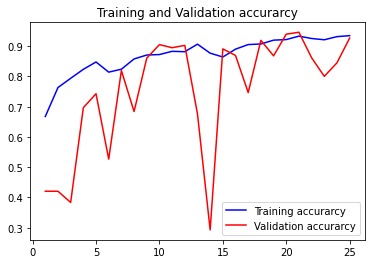

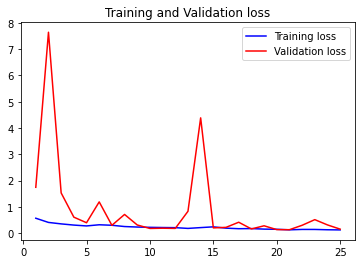

In [238]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
    

## working on the test data

In [239]:
test=pd.read_csv('Test.csv')

In [316]:
import cv2

In [321]:
l=[]
xm=[]
ym=[]
xmx=[]
ymx=[]
new='output/'
def solve(image,image_id):
    img = cv2.imread(image)
    bw = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(bw, 150, 255, cv2.THRESH_BINARY)
    #ret, thresh = cv2.threshold(bw,127,255,0) 
    #contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    xm.append(x)
    ym.append(y)
    xmx.append(x+w)
    ymx.append(y+h)
    roi = img[y:y+h, x:x+w]
    image1 = cv2.resize(roi, DEFAULT_IMAGE_SIZE)
    filename='output/'+image_id+'.jpg'
    cv2.imwrite(filename, image1)
    return img_to_array(image1)

In [322]:
path2='C:\\Users\\Shubham\\Desktop\\New folder\\ZINDI\\maker disease\\Test_Images\\Test_Images\\'


In [323]:
test

Image_ID
0    ID_IUJJG62B
1    ID_ZPNDRD4T
2    ID_AHFYB64P
3    ID_L8JZLNTF
4    ID_IFMUXGPL
..           ...
926  ID_77MDJGMZ
927  ID_PG3E6NQT
928  ID_038S0ONN
929  ID_D5YBIDDT
930  ID_2XGXT7SJ

[931 rows x 1 columns]

In [324]:
test_list=[]
for i in test['Image_ID']:
    l.append(i)
    image_dir=path2+i+'.jpg'
    arr=solve(image_dir, i)
    test_list.append(arr)
    

In [274]:
len(xm)

931

In [275]:
len(ym)

931

In [276]:
len(xmx)

931

In [277]:
len(ymx)

931

In [156]:
data

Image_ID            class   xmin   ymin  width  height
0     ID_007FAIEI  fruit_woodiness   87.0   87.5  228.0   311.0
1     ID_00G8K1V3  fruit_brownspot   97.5   17.5  245.0   354.5
2     ID_00WROUT9  fruit_brownspot  156.5  209.5  248.0   302.5
3     ID_00ZJEEK3    fruit_healthy  125.0  193.0  254.5   217.0
4     ID_018UIENR  fruit_brownspot   79.5  232.5  233.5   182.0
...           ...              ...    ...    ...    ...     ...
3901  ID_ZZAB1FH1    fruit_healthy   96.0  175.5  289.5   222.0
3902  ID_ZZAB1FH1    fruit_healthy  330.0  241.0  182.0   180.5
3903  ID_ZZJZ2CV6    fruit_healthy  358.0  234.0  134.5   107.0
3904  ID_ZZJZ2CV6    fruit_healthy   98.5  135.0  275.5   213.5
3905  ID_ZZO9KIH9  fruit_woodiness  123.5  218.5  197.5   153.5

[3906 rows x 6 columns]

In [278]:
sub=pd.DataFrame()
nl=len(xm)
    

In [279]:
sub['Image_ID']=l
#sub['xmin']=xm
#sub['ymin']=ym
#sub['xmax']=xmx
#sub['ymax']=ymx

In [280]:
sub

Image_ID
0    ID_IUJJG62B
1    ID_ZPNDRD4T
2    ID_AHFYB64P
3    ID_L8JZLNTF
4    ID_IFMUXGPL
..           ...
926  ID_77MDJGMZ
927  ID_PG3E6NQT
928  ID_038S0ONN
929  ID_D5YBIDDT
930  ID_2XGXT7SJ

[931 rows x 1 columns]

In [160]:
sub1=pd.read_csv('Sample_submission (3).csv')

In [161]:
sub

Image_ID   xmin   ymin  xmax  ymax
0    ID_IUJJG62B   19.5  314.5   503   198
1    ID_ZPNDRD4T    0.5    0.5   315   328
2    ID_AHFYB64P  189.5  248.5   379   314
3    ID_L8JZLNTF    0.5  198.5   445   307
4    ID_IFMUXGPL   46.5    0.5   512   379
..           ...    ...    ...   ...   ...
926  ID_77MDJGMZ    0.5   87.5   266    98
927  ID_PG3E6NQT  227.5  181.5   302   346
928  ID_038S0ONN    0.5   29.5   120   237
929  ID_D5YBIDDT    0.5    0.5   127   134
930  ID_2XGXT7SJ  101.5    0.5   512   512

[931 rows x 5 columns]

In [134]:
test

Image_ID
0    ID_IUJJG62B
1    ID_ZPNDRD4T
2    ID_AHFYB64P
3    ID_L8JZLNTF
4    ID_IFMUXGPL
..           ...
926  ID_77MDJGMZ
927  ID_PG3E6NQT
928  ID_038S0ONN
929  ID_D5YBIDDT
930  ID_2XGXT7SJ

[931 rows x 1 columns]

In [107]:
test_list[0].shape

(128, 128, 3)

In [249]:
np_test_list = np.array(test_list, dtype=np.float16) / 225.0

In [250]:
output=model.predict_classes(np_test_list)

c:\users\shubham\anaconda3\envs\edgenet\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [251]:
output

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,

In [252]:
print("[INFO] Saving label transform...")
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

[INFO] Saving label transform...


In [253]:
pp=[]
for i in output:
    lb=image_labels.classes_[i]
    pp.append(lb)

In [254]:
#sub['class']=pp

In [163]:
sub

Image_ID   xmin   ymin  xmax  ymax            class
0    ID_IUJJG62B   19.5  314.5   503   198  fruit_brownspot
1    ID_ZPNDRD4T    0.5    0.5   315   328  fruit_brownspot
2    ID_AHFYB64P  189.5  248.5   379   314  fruit_woodiness
3    ID_L8JZLNTF    0.5  198.5   445   307  fruit_brownspot
4    ID_IFMUXGPL   46.5    0.5   512   379  fruit_brownspot
..           ...    ...    ...   ...   ...              ...
926  ID_77MDJGMZ    0.5   87.5   266    98  fruit_woodiness
927  ID_PG3E6NQT  227.5  181.5   302   346  fruit_brownspot
928  ID_038S0ONN    0.5   29.5   120   237  fruit_brownspot
929  ID_D5YBIDDT    0.5    0.5   127   134  fruit_woodiness
930  ID_2XGXT7SJ  101.5    0.5   512   512  fruit_brownspot

[931 rows x 6 columns]

In [255]:
confidence=model.predict(np_test_list)

In [256]:
ott=[]
for i in confidence:
    d=max(i)
    snp=round(d,1)
    ott.append(snp)

In [257]:
ott

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.8,
 0.7,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.9,
 1.0,
 1.0,
 0.8,
 1.0,
 0.7,
 1.0,
 1.0,
 0.7,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6,
 0.7,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.9,
 0.5,
 1.0,
 0.9,
 1.0,
 0.7,
 1.0,
 1.0,
 0.6,
 0.9,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.9,
 1.0,
 0.6,
 0.9,
 0.8,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.7,
 1.0,
 0.7,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 0.9,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [281]:
sub['class']=pp
sub['confidence']=ott

In [285]:
sub['ymin']=ym
sub['xmin']=xm
sub['ymax']=ymx
sub['xmax']=xmx

In [286]:
sub.to_csv('subm1.csv', index=False)

In [287]:
sub

Image_ID            class  confidence  ymin  xmin  ymax  xmax
0    ID_IUJJG62B  fruit_woodiness         1.0   314    19   503   198
1    ID_ZPNDRD4T  fruit_brownspot         1.0     0     0   315   328
2    ID_AHFYB64P  fruit_woodiness         1.0   248   189   379   314
3    ID_L8JZLNTF  fruit_woodiness         1.0   198     0   445   307
4    ID_IFMUXGPL  fruit_woodiness         1.0     0    46   512   379
..           ...              ...         ...   ...   ...   ...   ...
926  ID_77MDJGMZ  fruit_brownspot         0.5    87     0   266    98
927  ID_PG3E6NQT    fruit_healthy         1.0   181   227   302   346
928  ID_038S0ONN  fruit_brownspot         1.0    29     0   120   237
929  ID_D5YBIDDT    fruit_healthy         0.9     0     0   127   134
930  ID_2XGXT7SJ  fruit_woodiness         1.0     0   101   512   512

[931 rows x 7 columns]

In [171]:
sub[sub['Image_ID']=='ID_0082Y2NI']

Image_ID   xmin  ymin  xmax  ymax            class  confidence
499  ID_0082Y2NI  153.5   0.5   512   512  fruit_woodiness    0.466668

In [184]:
mm=['ID_0082Y2NI','ID_038S0ONN', 'ID_03T232AG', 'ID_04ECR2KB', 'ID_05V1RQ12', 'ID_089T8YUN', 'ID_09FSGMD6', 'ID_0IIZW98W', 'ID_0JLNSEJP', 'ID_0LPMR58V', 'ID_0NIAXXSP', 'ID_0RT72J5B', 'ID_0RYLY9N7', 'ID_0VF76RFT', 'ID_0VVJW3VX', 'ID_0WHIP8CQ', 'ID_0Y72OOE7', 'ID_1219VLG1', 'ID_12APOOMP', 'ID_13DUVI0Y', 'ID_13R4CG6T', 'ID_14EC1H1R', 'ID_14IWH5W2', 'ID_17DT3SQU', 'ID_18KI3CRN', 'Missing IDs ID_0VVJW3VX on the submission file', 'Missing IDs ID_0VVJW3VX on the submission file', 'ID_1A7XUUVX', 'ID_1AFFBY0F', 'ID_1AN032JF', 'ID_1BWE5AQS', 'ID_1DWCQ5YW', 'ID_1FNTXLC4', 'ID_1IZB444M', 'ID_1LTAT8HW', 'ID_1O1SNW7P', 'ID_1P1PJGO6', 'ID_1P7DNJQ9', 'ID_1U3JOU8Y', 'ID_1USVOECT', 'ID_1WGODDTZ', 'ID_1ZSFYH9K', 'ID_23ZD173O', 'ID_24Q595R4', 'ID_256YTQEY', 'ID_27805T1F', 'ID_28WDKVCX', 'ID_29A40CQ8', 'ID_2C7ZZTBJ', 'ID_2DNYI1IU', 'ID_2DWMW9YR', 'ID_2ELBQTA6', 'ID_2LGABL5K', 'ID_2M7S2WS9', 'ID_2S8RECZB', 'ID_2T2VTXVZ', 'ID_2UTEQ1E5', 'ID_2XGXT7SJ', 'ID_2Y2XOU9H', 'ID_36KNG32O', 'ID_36X6H2WB', 'ID_36ZWFZNA', 'ID_3AEB099V', 'ID_3KOKW83D', 'ID_3M2L3PNT', 'ID_3NV80UQ4', 'ID_3RB1QT97', 'ID_3UOZLWR9', 'ID_3VJJV1D6', 'ID_3X1EN750', 'ID_3XQTJWSF', 'ID_3YHHQX40', 'ID_41OJ4N3N', 'ID_42MJBKZQ', 'ID_43UKMINN', 'ID_44U4MFFI', 'ID_47Y37351', 'ID_4BBS60VT', 'ID_4D3Y64EW', 'ID_4F925AJG', 'ID_4GTKQOOF', 'ID_4ILBH0JY', 'ID_4IUEY3DB', 'ID_4JJEAXKM', 'ID_4KC5ORDL', 'ID_4N8MAUDC', 'ID_4OL1MN86', 'ID_4OQWXWGJ', 'ID_4OTH501O', 'ID_4OXFGOGA', 'ID_4POYIPYW', 'ID_4Q1RIOH1', 'ID_4R4QCYW6', 'ID_4R92U3KK', 'ID_4TQEH7Q7', 'ID_521XJ2ND', 'ID_5AL2GIW8', 'ID_5B5VM0BZ', 'ID_5C5EUYQD', 'ID_5CKEYI30', 'ID_5D69YCZJ', 'ID_5FSR5TFW', 'ID_5GSH67Q0', 'ID_5IWRWURV', 'ID_5M93K80B', 'ID_5N88T5OR', 'ID_5NP2XYCM', 'ID_5RHZX4D6', 'ID_5U36ODQ3', 'ID_5YLQDC3X', 'ID_66UEXYMF', 'ID_67EOFCCE', 'ID_67FGLOOI', 'ID_67WAX5B2', 'ID_6AO4GQUJ', 'ID_6AV7ZZVH', 'ID_6EPUJED6', 'ID_6F2EIKQU', 'ID_6HFDQJUG', 'ID_6J064JUA', 'ID_6JEKCMWB', 'ID_6KY6IPDN', 'ID_6MLJZOHD', 'ID_6N0XXPYK', 'ID_6NEDEQL4', 'ID_6U3IVUUT', 'ID_6WKLOCBO', 'ID_6WLLDS0U', 'ID_70WEXW50', 'ID_73GICCGV', 'ID_73YZ343D', 'ID_74OUKH6E', 'ID_774V2NMX', 'ID_77MDJGMZ', 'ID_782YO6L1', 'ID_7BJ3F5LJ', 'ID_7FQVENBQ', 'ID_7K7O8Z7P', 'ID_7KGER4KW', 'ID_7U7A9QUC', 'ID_7Z21AMOQ', 'ID_81WZI0KV', 'ID_83G4LV3Z', 'ID_83ZMGMQ1', 'ID_86U1FBGP', 'ID_86WK6QMP', 'ID_89XPADSR', 'ID_8A8HOD1A', 'ID_8CE8XX9E', 'ID_8G8FIOE9', 'ID_8NXHAD4L', 'ID_8PHRVUZZ', 'ID_8QQR3GLH', 'ID_8T1SZ90L', 'ID_8U1P8PAC', 'ID_8UCHSJ0Y', 'ID_8Y7SHU31', 'ID_8YLBF62T', 'ID_8YW4IL1Y', 'ID_8Z5WR8GP', 'ID_905JQT7P', 'ID_94NIFD46', 'ID_958BSXFO', 'ID_968QCAXC', 'ID_96ZAUQ01', 'ID_98XED18L', 'ID_9HQAGR4Q', 'ID_9IPHXAIF', 'ID_9PRHEOL3', 'ID_9RZ88SFU', 'ID_9SO8N96O', 'ID_9U9RI64Z', 'ID_9UR27K3W', 'ID_9UWPPZBI', 'ID_9VMQ169M', 'ID_9XHS8M17', 'ID_A0F5JJHC', 'ID_A247GOXL', 'ID_A34NJSSC', 'ID_A3KAU7GW', 'ID_AAS55WJI', 'ID_AAUOFRES', 'ID_AHI3H2KG', 'ID_AHSYH5YT', 'ID_ALYK7Q2C', 'ID_AM71KYVM', 'ID_AQILUJHZ', 'ID_AR13HARC', 'ID_AT11BJVO', 'ID_AU92CPHB', 'ID_AYUSB7EB', 'ID_B0Q07Z8G', 'ID_B1EXLFO4', 'ID_B1P5U18J', 'ID_B3EVHF1A', 'ID_B8EI3PB5', 'ID_B9GTAWB7', 'ID_BCLC17JI', 'ID_BD07SRQ2', 'ID_BHY238PC', 'ID_BJ0U4H1I', 'ID_BK5WP0KQ', 'ID_BPN6TRDA', 'ID_BRCXK5HY', 'ID_BRFCKCPH', 'ID_BSNFDTD3', 'ID_BTUHH83G', 'ID_BUV860JZ', 'ID_BVFPC07D', 'ID_BY671NUJ', 'ID_C6Z44A1C', 'ID_C92O1XOB', 'ID_C9Z059GD', 'ID_CB3BFS91', 'ID_CBSNZ7MU', 'ID_CC43WOXB', 'ID_CEOBY34W', 'ID_CG2EZIW5', 'ID_CGND1FCK', 'ID_CHP9VMGI', 'ID_CM3NMGRL', 'ID_CNKVK9YJ', 'ID_COAPR3YB', 'ID_COQ6F904', 'ID_CPC4MQ9M', 'ID_D48HOC00', 'ID_D5DQ3N77', 'ID_D5YBIDDT', 'ID_D7STMIYY', 'ID_D7T3YRKS', 'ID_DBBWZ0OX', 'ID_DDTO034P', 'ID_DFGU4DZA', 'ID_DIT9B8LF', 'ID_DOKQ4UCP', 'ID_DRZ0ZVHW', 'ID_DU4A65SX', 'ID_DY5TOVP5', 'ID_DZGAI6J0', 'ID_E13S73H7', 'ID_E3WFKQ1Y', 'ID_E4IFUNJG', 'ID_E6YP61B7', 'ID_ECZED2FL', 'ID_ED2VFMPY', 'ID_ED52VK9P', 'ID_EILBFHQ5', 'ID_EJUPA9CY', 'ID_EK356A7Q', 'ID_EKM8QNA9', 'ID_ENVT7ZIJ', 'ID_EP9PX8AP', 'ID_EQMP70TK', 'ID_EQTT3DX2', 'ID_ER9Y0V0T', 'ID_ERUO797P', 'ID_EU4K6HRZ', 'ID_EVIOZ1F4', 'ID_EYG5WMHY', 'ID_F1NUR9KD', 'ID_F29H4C3O', 'ID_F54BXSJG', 'ID_F7EIRBT3', 'ID_F8YN24XL', 'ID_FA3JX1MC', 'ID_FDDPGYWM', 'ID_FGLOBC08', 'ID_FH31C5JD', 'ID_FN9VMEJ0', 'ID_FNVKSB6B', 'ID_FOT6TDMO', 'ID_FRDZ97NV', 'ID_FS33JT6Z', 'ID_FSO8M6WL', 'ID_FT1QT4DZ', 'ID_FTL3N62Q', 'ID_FV6EBG7U', 'ID_FVJD4K6I', 'ID_FVRUJN1T', 'ID_FYOKNJV2', 'ID_G28R4R5O', 'ID_G4OL29KL', 'ID_G9Q1AJDX', 'ID_G9T5HB2U', 'ID_GBJZJTQE', 'ID_GC1XS2EG', 'ID_GECI4VZV', 'ID_GFQ64NUK', 'ID_GGQGCGQB', 'ID_GOBW1S5W', 'ID_GPVGC4A8', 'ID_GRN6FHP0', 'ID_GXCLBQP8', 'ID_GZQVGAYT', 'ID_GZS9CVQC', 'ID_H82UYRMB', 'ID_H9R25OWO', 'ID_HALZRS1Q', 'ID_HETUZV59', 'ID_HLQGJO83', 'ID_HO87XTYN', 'ID_HUCDYOI9', 'ID_HVU0P1M3', 'ID_HW7WYDR8', 'ID_HYFSJZTS', 'ID_I28JEWQD', 'ID_I4A7BTBE', 'ID_I5C9N8V2', 'ID_IBHCAG6F', 'ID_IETZUBG7', 'ID_IHFON985', 'ID_IHGKXB46', 'ID_ILMD1PFT', 'ID_INI8BV3F', 'ID_ITJP06DT', 'ID_IWJT38NZ', 'ID_IZL3B164', 'ID_IZVQVB79', 'ID_J0ZLGKNL', 'ID_J1YANQKB', 'ID_J7X557R5', 'ID_J8C44E4S', 'ID_J8Q1K4CE', 'ID_J9BL87J0', 'ID_JATXDIER', 'ID_JCAFAX30', 'ID_JCG8GM4H', 'ID_JE1742JT', 'ID_JN6P4ZOK', 'ID_JOOLMI2B', 'ID_JSKFWYQ8', 'ID_JT23YC6X', 'ID_JVUATEIS', 'ID_JY9M11I5', 'ID_0082Y2NI', 'ID_JYYYDN67', 'ID_K0HL5LBR', 'ID_K3MAQVOP', 'ID_K5CTX2I6', 'ID_K6P2BYIW', 'ID_K92A62UP', 'ID_KBV7Q51K', 'ID_KCK8FK6G', 'ID_KETG86JO', 'ID_KFWLVLLH', 'ID_KFXM60RU', 'ID_KGLILK1U', 'ID_KH7N66D2', 'ID_KI88ZA5U', 'ID_KITUXBWQ', 'ID_KJXF9Q53', 'ID_KJZJVZTF', 'ID_KPRWUVM4', 'ID_L0T310JI', 'ID_L1AZTRYP', 'ID_L4IMI56A', 'ID_L4TJ998P', 'ID_LHJARPE7', 'ID_LMKJE5XS', 'ID_LOOAUF8S', 'ID_LS6QBXSP', 'ID_LUQYG317', 'ID_LUY36V3A', 'ID_LXB103OW', 'ID_LZVTV3O0', 'ID_M03U9MA8', 'ID_M1LN8K7I', 'ID_M39EONS8', 'ID_M3V2AUVC', 'ID_M3YO8ETB', 'ID_M5J0G4SE', 'ID_M68TGTFU', 'ID_M8BX4ROR', 'ID_M9M1FEL7', 'ID_M9W9342G', 'ID_MB3JQUG9', 'ID_MBZSNZSP', 'ID_MK5P4MLP', 'ID_MO6QQOBM', 'ID_MO7AH0SF', 'ID_MO7C668E', 'ID_MOKNV9M7', 'ID_MQWQ78UK', 'ID_MRL31BQH', 'ID_MRYNE355', 'ID_MSLL8E1A', 'ID_MVJ3O9ZU', 'ID_MWGP4FFB', 'ID_MWNX4E0V', 'ID_MWV65I3Z', 'ID_MYTX2LAA', 'ID_MZI5JA74', 'ID_N0AWHTVV', 'ID_N2XF31I6', 'ID_N3FW37HH', 'ID_N4CUR4WU', 'ID_N4P433GS', 'ID_N5WG136E', 'ID_N8FMQUR6', 'ID_ND4UCAVM', 'ID_NF6K06F2', 'ID_NJ6YKKOG', 'ID_NJQS120W', 'ID_NKYBA05G', 'ID_NM0NKS3E', 'ID_NNBHPTH0', 'ID_NQI6J2HN', 'ID_O38T5RPV', 'ID_O48K8X2L', 'ID_O7QJFD51', 'ID_O7STSQRP', 'ID_O8PB9MY0', 'ID_O9GPKGSF', 'ID_OAD1WBG0', 'ID_ODJ56550', 'ID_ODJ8VAV0', 'ID_OEJ7SKQ9', 'ID_OLES0AAK', 'ID_OT7IVHKK', 'ID_OV65AK18', 'ID_OXOCXET8', 'ID_OY4BC7ZK', 'ID_OYZBEDY6', 'ID_P03AAXHH', 'ID_P0LF8KE8', 'ID_P301U33G', 'ID_P3O4EGBB', 'ID_P4EPA861', 'ID_P4JDQ551', 'ID_P4U78SQ7', 'ID_P73HDU3Y', 'ID_P78DB67S', 'ID_P8OOIKBV', 'ID_PAXZTWII', 'ID_PDXPJS3S', 'ID_PG3E6NQT', 'ID_PI0NY2LD', 'ID_PIQM1XT1', 'ID_PMSDX1PN', 'ID_PR738OTO', 'ID_PT3IMK8O', 'ID_PYP2LA1Z', 'ID_PZT52CB4', 'ID_Q0KBZOT3', 'ID_Q5LZQZ6P', 'ID_QCTB17VM', 'ID_QEO8EA5Z', 'ID_QFWS8VT0', 'ID_QG2EICL9', 'ID_QGWKCMJE', 'ID_QJQ9O5OF', 'ID_QJWLRB4V', 'ID_QTZ1HFXJ', 'ID_QUS1XC39', 'ID_QV3G777K', 'ID_QVS57JDJ', 'ID_QZO7R86R', 'ID_R328VW78', 'ID_R452S8BY', 'ID_R7H0WRPT', 'ID_R9D0ABDV', 'ID_RAKDJRGA', 'ID_RD4JDJG1', 'ID_RGH9UYXQ', 'ID_RHS4PD51', 'ID_RJGOTE05', 'ID_RLDU82GU', 'ID_RM4IA27T', 'ID_RMO2KIYW', 'ID_RNS6BGUE', 'ID_RPC22N22', 'ID_RUEBY08K', 'ID_RWDI2AYS', 'ID_RZBK82BL', 'ID_S04JK8PB', 'ID_S1X9O1TB', 'ID_S6ROOR7U', 'ID_S90C44WF', 'ID_SAI6VVGL', 'ID_SCDYUZVL', 'ID_SDD6851W', 'ID_SE7LT95N', 'ID_SFISBDJN', 'ID_SGXSO873', 'ID_SIC02IAY', 'ID_SJNSQQXI', 'ID_SKICCEE2', 'ID_SLC0738M', 'ID_SM2WVPZZ', 'ID_SNM6060U', 'ID_SQT62PKL', 'ID_SQY1RCGE', 'ID_SU8FDHQX', 'ID_SV6N5OR7', 'ID_SX5CRTMX', 'ID_SYAZ6H2M', 'ID_SZ0IZNEK', 'ID_T16CDRB5', 'ID_T1O01L63', 'ID_T1O1BOSF', 'ID_T2S8NV0O', 'ID_T3KBO2KR', 'ID_T5KC9ZN2', 'ID_T7IPJFIZ', 'ID_T8G34E9V', 'ID_TAIRIVBH', 'ID_TBAXLU53', 'ID_TD1MXSIQ', 'ID_TDNATB5X', 'ID_TJ9373GN', 'ID_TJAESNXO', 'ID_TL4K5ATK', 'ID_TPRZWRB8', 'ID_TQMKJRRT', 'ID_TT3V2MZG', 'ID_TVLQKCRI', 'ID_TZX5PCGD', 'ID_U2SMF3TD', 'ID_U6YW22OK', 'ID_U8BDDELR', 'ID_UEG77OW6', 'ID_UENNAV2T', 'ID_UG523UNG', 'ID_UKM8AHO1', 'ID_UNRN4O9T', 'ID_UO3L4DRR', 'ID_UPB3ZL31', 'ID_URKQ1NC7', 'ID_UU1WQZT7', 'ID_UWKN4S0B', 'ID_UWV8VFSZ', 'ID_UZBEB6KB', 'ID_V0PMGAEL', 'ID_V3KR2S4V', 'ID_V695JBLJ', 'ID_V7710NYL', 'ID_V9NEU0UP', 'ID_VEM803LR', 'ID_VJC31969', 'ID_VLMAMIWU', 'ID_VLNGSYZF', 'ID_VLOOQRJ8', 'ID_VU7MMWC4', 'ID_VUXOQ4XI', 'ID_VWAZJPGU', 'ID_VZVYG28E', 'ID_W0VS8GW0', 'ID_W3GDSS9L', 'ID_W3UWB38H', 'ID_W4HWR812', 'ID_W51TAT19', 'ID_W8VPYUAX', 'ID_WAJESEQF', 'ID_WBGKSSHL', 'ID_WCGYW3PR', 'ID_WD0UAN51', 'ID_WDDHH7R1', 'ID_WF7515WR', 'ID_WIFF1S3P', 'ID_WJIAZJCD', 'ID_WKMG4KCB', 'ID_WL92FK4D', 'ID_WOVHSE47', 'ID_WS7V2AEO', 'ID_WT7V5JTR', 'ID_WUZ3G9I7', 'ID_WZ381OKO', 'ID_X59HFC6B', 'ID_X8DWN03J', 'ID_X8XI5PPF', 'ID_XEQDU0L1', 'ID_XEWEF7W3', 'ID_XFBYRB5S', 'ID_XI1SKDGB', 'ID_XLP4MSQW', 'ID_XPSEDVOH', 'ID_XRYNJLES', 'ID_XTYQSAQ6', 'ID_XU54SJE0', 'ID_XWHGY1LA', 'ID_Y0B7RHYU', 'ID_Y4C7VORW', 'ID_Y4LEKLH2', 'ID_Y6MJIHUD', 'ID_Y6SFRY9V', 'ID_Y7Q169YU', 'ID_Y8A044B1', 'ID_Y8CGQC9U', 'ID_Y8I3R7BF', 'ID_Y8UWMI8J', 'ID_YD927FT6', 'ID_YFCYTW2U', 'ID_YGHCDHQN', 'ID_YGVQIHNZ', 'ID_YHJZLGZK', 'ID_YJ2M44RL', 'ID_YJCCUOBS', 'ID_YNRNQPQ0', 'ID_YR1G911F', 'ID_YVKZLZSX', 'ID_Z2R5H32B', 'ID_Z3Z7KZ25', 'ID_Z4BX4E19', 'ID_Z845LMVP', 'ID_ZAREO6BG', 'ID_ZBXLNP2J', 'ID_ZCPL4F4L', 'ID_ZEVJVZ0O', 'ID_ZISR0V21', 'ID_ZKXSNE0F', 'ID_ZME1TQ74', 'ID_ZNDNT7DU', 'ID_ZNTNSIYS', 'ID_ZQQZPFF3', 'ID_ZQU89DQY', 'ID_ZRBNEHUB', 'ID_ZSD7ZFDH', 'ID_ZTJYPA9C', 'ID_ZTYJSHWW', 'ID_ZTYLLT5K', 'ID_ZZ4JDA0O', 'ID_ZZI6IV38', 'ID_ZZUQRVHG']

In [198]:
len(mm)

623

In [200]:
mm1=[]
for i in mm:
    if i=='D_AAUOFRES':
        break
    else:
        mm1.append(i)

In [201]:
mm1.append('D_AAUOFRES')

In [202]:
len(mm1)

624

In [203]:
new_df = sub[~sub.Image_ID.isin(mm1)]

In [204]:
new_df.to_csv('kk.csv', index=False)

In [267]:
new_df

Image_ID   xmin   ymin  xmax  ymax            class  confidence
0    ID_IUJJG62B   19.5  314.5   503   198  fruit_brownspot    0.803433
1    ID_ZPNDRD4T    0.5    0.5   315   328  fruit_brownspot    0.736568
2    ID_AHFYB64P  189.5  248.5   379   314  fruit_woodiness    0.999699
3    ID_L8JZLNTF    0.5  198.5   445   307  fruit_brownspot    1.000000
4    ID_IFMUXGPL   46.5    0.5   512   379  fruit_brownspot    0.851779
..           ...    ...    ...   ...   ...              ...         ...
306  ID_81H2JTTH  248.5   49.5   174   346    fruit_healthy    0.827237
307  ID_18NJG68M    0.5    0.5   512   512  fruit_brownspot    0.997952
308  ID_7YWBFXO3    0.5    0.5   512   512  fruit_brownspot    0.999576
309  ID_MOU8HTKB  216.5  200.5   367   394    fruit_healthy    0.999420
310  ID_DWGTUEUI   97.5  267.5   374   339  fruit_brownspot    0.738600

[311 rows x 7 columns]

In [207]:
data[data['Image_ID']=='D_AAUOFRES']

Empty DataFrame
Columns: [Image_ID, class, xmin, ymin, width, height]
Index: []

In [268]:
sub

Image_ID            class  confidence  ymin  xmin  ymax  xmax
0    ID_IUJJG62B  fruit_woodiness         1.0   130    12   503   198
1    ID_ZPNDRD4T  fruit_brownspot         1.0   130    12   315   328
2    ID_AHFYB64P  fruit_woodiness         1.0   130    12   379   314
3    ID_L8JZLNTF  fruit_woodiness         1.0   130    12   445   307
4    ID_IFMUXGPL  fruit_woodiness         1.0   130    12   512   379
..           ...              ...         ...   ...   ...   ...   ...
926  ID_77MDJGMZ  fruit_brownspot         0.5   130    12   266    98
927  ID_PG3E6NQT    fruit_healthy         1.0   130    12   302   346
928  ID_038S0ONN  fruit_brownspot         1.0   130    12   120   237
929  ID_D5YBIDDT    fruit_healthy         0.9   130    12   127   134
930  ID_2XGXT7SJ  fruit_woodiness         1.0   130    12   512   512

[931 rows x 7 columns]